# Machine learning models - flats

In [1]:
import pandas as pd
import xgboost as xg
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error as MSE, make_scorer, mean_absolute_error as MAE, r2_score, mean_absolute_percentage_error as MAPE
from sklearn.linear_model import LinearRegression
from math import sqrt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
import seaborn as sns
from matplotlib.pyplot import figure
from keras import callbacks

In [2]:
data = pd.read_csv('./preprocessed_dataset_flats.csv', index_col = 0)
data.head()

,price,price_per_square_meter,area,number_of_rooms,finishing_standard,floor,rent,heating,market,building_type,...,has_garden,has_terrace,has_parking,is_furnished,has_lift,has_security_protection,is_duplex,has_basement,number_of_floors,age
0,950000.0,14175.0,0.170840,3,2,6,0.067777,4,1,2,...,0,0,1,1,1,1,0,0,6,0.060465
1,264900.0,9811.0,0.050406,1,2,5,0.051110,4,1,2,...,0,0,0,0,1,1,0,0,8,0.255814
2,464000.0,8000.0,0.143695,3,2,2,0.038888,1,1,0,...,0,0,1,0,1,0,0,0,3,0.023256
3,199900.0,5666.0,0.075324,2,2,4,0.046666,4,1,2,...,0,0,0,0,0,0,0,1,4,0.032558
4,299000.0,6229.0,0.113602,3,2,5,0.074443,4,1,2,...,0,0,0,0,1,0,0,1,10,0.032558


In [3]:
data = data.drop('price_per_square_meter', axis = 1)

### Split data into train and test datasets

In [4]:
X, y = data.drop('price', axis = 1),data['price']
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 4)

### Linear regression

In [5]:
lin_reg = LinearRegression()

lin_reg.fit(train_X, train_y)

LinearRegression()

In [6]:
lin_reg_pred = lin_reg.predict(test_X)

#### Metrics for the linear regression model

In [7]:
print(MAPE(test_y, lin_reg_pred))
print(MSE(test_y, lin_reg_pred))
print(MAE(test_y, lin_reg_pred))
print(r2_score(test_y, lin_reg_pred))

0.3417053689768195
99126506364.93047
170085.08138139264
0.5534048607569809


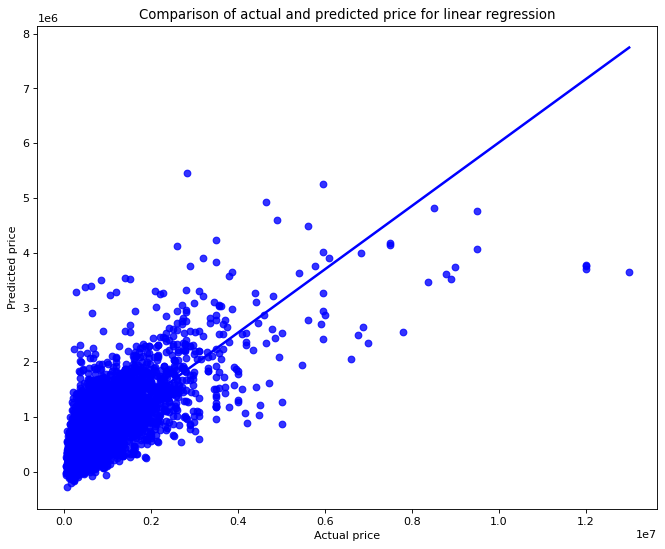

In [8]:
figure(figsize=(10, 8), dpi=80)
ax = sns.regplot(x=test_y, y=lin_reg_pred, ci=None, color ='blue')
ax.set(xlabel='Actual price', ylabel='Predicted price', title='Comparison of actual and predicted price for linear regression')
plt.show()

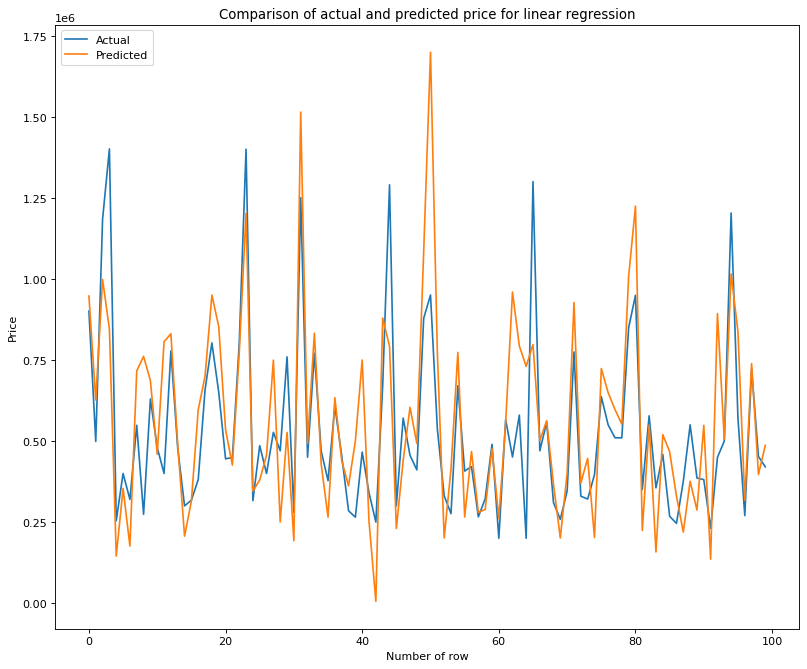

In [9]:
figure(figsize=(12, 10), dpi=80)
plt.plot(list(range(len(test_y[:100].values))), test_y[:100])
plt.plot(list(range(len(test_y[:100].values))), lin_reg_pred[:100])
plt.title('Comparison of actual and predicted price for linear regression')
plt.ylabel('Price')
plt.xlabel('Number of row')
plt.legend(['Actual', 'Predicted'], loc='upper left')
plt.show()

### XGBoost

In [10]:
xgb_r = xg.XGBRegressor(objective = 'reg:squarederror')

optimization_dict = {'max_depth': [2, 4, 6],
                     'n_estimators': [100, 500, 1000],
                    'seed': [4, 8, 16]}

mse = make_scorer(MSE,greater_is_better=False)

xgb_grid_search_model = GridSearchCV(xgb_r, optimization_dict, scoring=mse, verbose=10)

xgb_grid_search_model.fit(train_X, train_y)

print(xgb_grid_search_model.best_score_)
print(xgb_grid_search_model.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5; 1/27] START max_depth=2, n_estimators=100, seed=4......................
[CV 1/5; 1/27] END max_depth=2, n_estimators=100, seed=4;, score=-64361288244.157 total time=   2.0s
[CV 2/5; 1/27] START max_depth=2, n_estimators=100, seed=4......................
[CV 2/5; 1/27] END max_depth=2, n_estimators=100, seed=4;, score=-58649003181.444 total time=   2.1s
[CV 3/5; 1/27] START max_depth=2, n_estimators=100, seed=4......................
[CV 3/5; 1/27] END max_depth=2, n_estimators=100, seed=4;, score=-55289529815.819 total time=   1.9s
[CV 4/5; 1/27] START max_depth=2, n_estimators=100, seed=4......................
[CV 4/5; 1/27] END max_depth=2, n_estimators=100, seed=4;, score=-48329610129.367 total time=   2.1s
[CV 5/5; 1/27] START max_depth=2, n_estimators=100, seed=4......................
[CV 5/5; 1/27] END max_depth=2, n_estimators=100, seed=4;, score=-58217204427.950 total time=   1.8s
[CV 1/5; 2/27] START max_dep

[CV 1/5; 10/27] END max_depth=4, n_estimators=100, seed=4;, score=-47258816789.396 total time=   3.6s
[CV 2/5; 10/27] START max_depth=4, n_estimators=100, seed=4.....................
[CV 2/5; 10/27] END max_depth=4, n_estimators=100, seed=4;, score=-43032493042.028 total time=   4.4s
[CV 3/5; 10/27] START max_depth=4, n_estimators=100, seed=4.....................
[CV 3/5; 10/27] END max_depth=4, n_estimators=100, seed=4;, score=-41387850732.190 total time=   4.4s
[CV 4/5; 10/27] START max_depth=4, n_estimators=100, seed=4.....................
[CV 4/5; 10/27] END max_depth=4, n_estimators=100, seed=4;, score=-34820734512.979 total time=   6.1s
[CV 5/5; 10/27] START max_depth=4, n_estimators=100, seed=4.....................
[CV 5/5; 10/27] END max_depth=4, n_estimators=100, seed=4;, score=-43851183519.575 total time=   4.1s
[CV 1/5; 11/27] START max_depth=4, n_estimators=100, seed=8.....................
[CV 1/5; 11/27] END max_depth=4, n_estimators=100, seed=8;, score=-47258816789.396 to

[CV 1/5; 19/27] END max_depth=6, n_estimators=100, seed=4;, score=-42818415380.503 total time=   3.7s
[CV 2/5; 19/27] START max_depth=6, n_estimators=100, seed=4.....................
[CV 2/5; 19/27] END max_depth=6, n_estimators=100, seed=4;, score=-37428052061.167 total time=   3.7s
[CV 3/5; 19/27] START max_depth=6, n_estimators=100, seed=4.....................
[CV 3/5; 19/27] END max_depth=6, n_estimators=100, seed=4;, score=-33202837250.971 total time=   3.6s
[CV 4/5; 19/27] START max_depth=6, n_estimators=100, seed=4.....................
[CV 4/5; 19/27] END max_depth=6, n_estimators=100, seed=4;, score=-29456717268.392 total time=   3.8s
[CV 5/5; 19/27] START max_depth=6, n_estimators=100, seed=4.....................
[CV 5/5; 19/27] END max_depth=6, n_estimators=100, seed=4;, score=-34933498262.076 total time=   3.6s
[CV 1/5; 20/27] START max_depth=6, n_estimators=100, seed=8.....................
[CV 1/5; 20/27] END max_depth=6, n_estimators=100, seed=8;, score=-42818415380.503 to

In [11]:
xgb_pred = xgb_grid_search_model.predict(test_X)

In [12]:
model_xgb = xgb_grid_search_model.best_estimator_
model_xgb.fit(train_X, train_y)
model_xgb.save_model("xgb_flats_model.save")

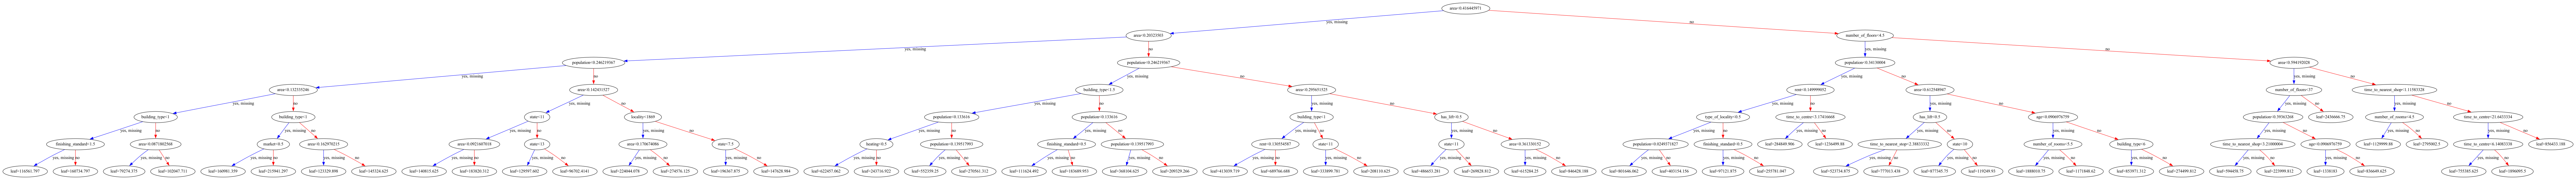

In [13]:
fig, ax = plt.subplots(figsize=(200, 200))
xg.plot_tree(model_xgb, num_trees=0, ax=ax, fontsize=20)

plt.savefig('xgb_tree_flats.png')

#### Metrics for the XGBoost model

In [14]:
print(MAPE(test_y, xgb_pred))
print(MSE(test_y, xgb_pred))
print(MAE(test_y, xgb_pred))
print(r2_score(test_y, xgb_pred))

0.12736460130020127
29814068694.55131
71749.37811103134
0.8656785288989599


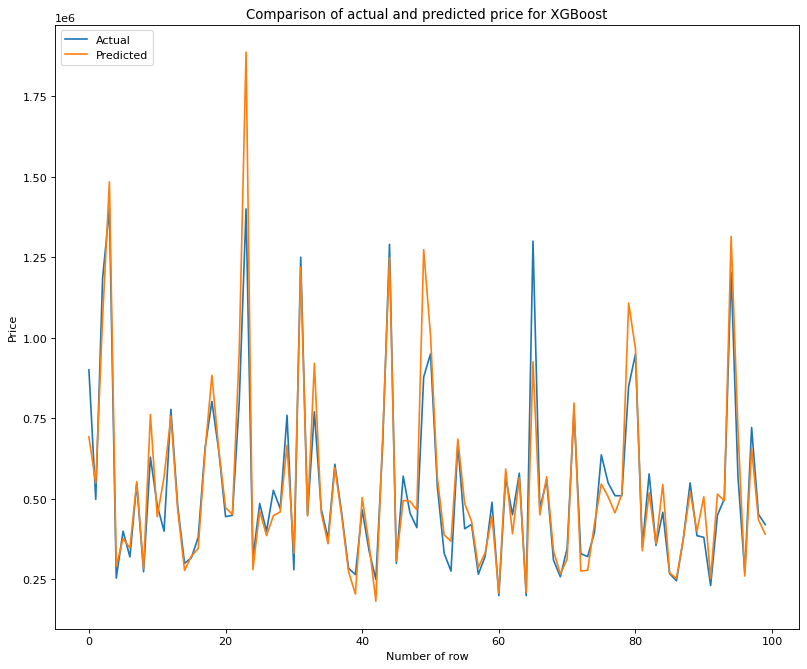

In [15]:
figure(figsize=(12, 10), dpi=80)
plt.plot(list(range(len(test_y[:100].values))), test_y[:100])
plt.plot(list(range(len(test_y[:100].values))), xgb_pred[:100])
plt.title('Comparison of actual and predicted price for XGBoost')
plt.ylabel('Price')
plt.xlabel('Number of row')
plt.legend(['Actual', 'Predicted'], loc='upper left')
plt.show()

### Neural networks

In [16]:
def create_model(learning_rate):

    nn_model = keras.Sequential(
        [
            layers.Dense(256, input_dim = len(data.columns) - 1, activation = 'relu'),
            layers.Dropout(0.2),
            layers.Dense(64, activation='relu'),
            layers.Dropout(0.2),
            layers.Dense(64, activation='relu'),
            layers.Dropout(0.2),
            layers.Dense(1, activation = 'linear')
        ]
    )
    adam = tf.optimizers.Adam(learning_rate = learning_rate)
    nn_model.compile(loss = 'mse', optimizer = adam, metrics = ['mse', 'mae'])

    return nn_model

model = KerasRegressor(build_fn=create_model)

/var/folders/zv/1r2yhkrn22jbxp293mklny_00000gn/T/ipykernel_9216/1909692994.py:19: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasRegressor(build_fn=create_model)


In [17]:
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 10, 
                                        restore_best_weights = True)

In [18]:
batch_size = [32, 64, 256]
epochs = [64, 128, 256]
learning_rate = [0.001, 0.01]
validation_split=[0.2]
callbacks=[earlystopping]

param_grid = dict(batch_size=batch_size, epochs=epochs, learning_rate = learning_rate, validation_split = validation_split, callbacks = callbacks)
nn_grid_search_model = GridSearchCV(estimator=model, param_grid=param_grid, verbose=10)
nn_grid_search_result = nn_grid_search_model.fit(train_X, train_y)

print(nn_grid_search_model.best_params_)
print(nn_grid_search_model.best_score_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5; 1/18] START batch_size=32, callbacks=<keras.callbacks.EarlyStopping object at 0x7fe1f755ea60>, epochs=64, learning_rate=0.001, validation_split=0.2


2022-11-15 15:12:45.711514: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/64
1201/1201 [==============================] - 2s 1ms/step - loss: 294492307456.0000 - mse: 294492307456.0000 - mae: 312421.9062 - val_loss: 226760933376.0000 - val_mse: 226760933376.0000 - val_mae: 242329.8125
Epoch 2/64
1201/1201 [==============================] - 1s 1ms/step - loss: 239522414592.0000 - mse: 239522414592.0000 - mae: 238387.8906 - val_loss: 224702676992.0000 - val_mse: 224702676992.0000 - val_mae: 211337.4062
Epoch 3/64
1201/1201 [==============================] - 1s 1ms/step - loss: 231223984128.0000 - mse: 231223984128.0000 - mae: 231762.2656 - val_loss: 221766533120.0000 - val_mse: 221766533120.0000 - val_mae: 233121.0156
Epoch 4/64
1201/1201 [==============================] - 2s 1ms/step - loss: 220672999424.0000 - mse: 220672999424.0000 - mae: 226300.8594 - val_loss: 218243596288.0000 - val_mse: 218243596288.0000 - val_mae: 213258.4688
Epoch 5/64
1201/1201 [==============================] - 1s 1ms/step - loss: 222852005888.0000 - mse: 222852005888.0000 -

1201/1201 [==============================] - 1s 1ms/step - loss: 142404730880.0000 - mse: 142404730880.0000 - mae: 184491.4375 - val_loss: 154538852352.0000 - val_mse: 154538852352.0000 - val_mae: 232369.3906
Epoch 39/64
1201/1201 [==============================] - 1s 1ms/step - loss: 138734206976.0000 - mse: 138734206976.0000 - mae: 183835.6250 - val_loss: 125525942272.0000 - val_mse: 125525942272.0000 - val_mae: 157791.0625
Epoch 40/64
1201/1201 [==============================] - 1s 1ms/step - loss: 138715463680.0000 - mse: 138715463680.0000 - mae: 182928.5781 - val_loss: 126826373120.0000 - val_mse: 126826373120.0000 - val_mae: 157813.5000
Epoch 41/64
1201/1201 [==============================] - 1s 1ms/step - loss: 139048468480.0000 - mse: 139048468480.0000 - mae: 183144.5312 - val_loss: 122741989376.0000 - val_mse: 122741989376.0000 - val_mae: 174496.7188
Epoch 42/64
1201/1201 [==============================] - 1s 1ms/step - loss: 137012699136.0000 - mse: 137012699136.0000 - mae: 1

Epoch 9/64
1201/1201 [==============================] - 1s 1ms/step - loss: 182506274816.0000 - mse: 182506274816.0000 - mae: 208415.8438 - val_loss: 366128070656.0000 - val_mse: 366128070656.0000 - val_mae: 198578.3281
Epoch 10/64
1201/1201 [==============================] - 1s 1ms/step - loss: 179338346496.0000 - mse: 179338346496.0000 - mae: 206637.5000 - val_loss: 381091086336.0000 - val_mse: 381091086336.0000 - val_mae: 183067.7344
Epoch 11/64
376/376 [==============================] - 0s 602us/step - loss: 245755068416.0000 - mse: 245755068416.0000 - mae: 243958.8125
[CV 2/5; 1/18] END batch_size=32, callbacks=<keras.callbacks.EarlyStopping object at 0x7fe1f755ea60>, epochs=64, learning_rate=0.001, validation_split=0.2;, score=-245755068416.000 total time=  15.4s
[CV 3/5; 1/18] START batch_size=32, callbacks=<keras.callbacks.EarlyStopping object at 0x7fe1f755ea60>, epochs=64, learning_rate=0.001, validation_split=0.2
Epoch 1/64
1201/1201 [==============================] - 2s 1ms/

Epoch 33/64
1201/1201 [==============================] - 1s 1ms/step - loss: 149313716224.0000 - mse: 149313716224.0000 - mae: 188528.3281 - val_loss: 137118703616.0000 - val_mse: 137118703616.0000 - val_mae: 165938.2188
Epoch 34/64
1201/1201 [==============================] - 2s 1ms/step - loss: 145693458432.0000 - mse: 145693458432.0000 - mae: 188522.6719 - val_loss: 134854811648.0000 - val_mse: 134854811648.0000 - val_mae: 165006.7969
Epoch 35/64
1201/1201 [==============================] - 2s 1ms/step - loss: 145436295168.0000 - mse: 145436295168.0000 - mae: 186961.3438 - val_loss: 142989115392.0000 - val_mse: 142989115392.0000 - val_mae: 208779.2188
Epoch 36/64
1201/1201 [==============================] - 2s 1ms/step - loss: 143053078528.0000 - mse: 143053078528.0000 - mae: 186311.7031 - val_loss: 133986033664.0000 - val_mse: 133986033664.0000 - val_mae: 190479.9688
Epoch 37/64
1201/1201 [==============================] - 1s 1ms/step - loss: 142119845888.0000 - mse: 142119845888.0

Epoch 4/64
1201/1201 [==============================] - 1s 1ms/step - loss: 244025950208.0000 - mse: 244025950208.0000 - mae: 231738.1250 - val_loss: 230021136384.0000 - val_mse: 230021136384.0000 - val_mae: 212152.1094
Epoch 5/64
1201/1201 [==============================] - 1s 1ms/step - loss: 244518780928.0000 - mse: 244518780928.0000 - mae: 226910.3594 - val_loss: 226812116992.0000 - val_mse: 226812116992.0000 - val_mae: 209297.7188
Epoch 6/64
1201/1201 [==============================] - 1s 1ms/step - loss: 245368717312.0000 - mse: 245368717312.0000 - mae: 222853.8750 - val_loss: 224977977344.0000 - val_mse: 224977977344.0000 - val_mae: 222423.1562
Epoch 7/64
1201/1201 [==============================] - 2s 1ms/step - loss: 232714010624.0000 - mse: 232714010624.0000 - mae: 219425.7344 - val_loss: 224325959680.0000 - val_mse: 224325959680.0000 - val_mae: 218954.1562
Epoch 8/64
1201/1201 [==============================] - 1s 1ms/step - loss: 231171129344.0000 - mse: 231171129344.0000 -

1201/1201 [==============================] - 2s 1ms/step - loss: 149814034432.0000 - mse: 149814034432.0000 - mae: 188396.0469 - val_loss: 126542995456.0000 - val_mse: 126542995456.0000 - val_mae: 179192.7500
Epoch 42/64
1201/1201 [==============================] - 2s 2ms/step - loss: 149631074304.0000 - mse: 149631074304.0000 - mae: 186857.7188 - val_loss: 122186620928.0000 - val_mse: 122186620928.0000 - val_mae: 158465.8750
Epoch 43/64
1201/1201 [==============================] - 2s 1ms/step - loss: 147648708608.0000 - mse: 147648708608.0000 - mae: 185516.0781 - val_loss: 126900772864.0000 - val_mse: 126900772864.0000 - val_mae: 155996.0156
Epoch 44/64
1201/1201 [==============================] - 2s 1ms/step - loss: 144448061440.0000 - mse: 144448061440.0000 - mae: 184874.5781 - val_loss: 134556622848.0000 - val_mse: 134556622848.0000 - val_mae: 195170.6562
Epoch 45/64
1201/1201 [==============================] - 1s 1ms/step - loss: 147056738304.0000 - mse: 147056738304.0000 - mae: 1

Epoch 12/64
1201/1201 [==============================] - 1s 1ms/step - loss: 212004782080.0000 - mse: 212004782080.0000 - mae: 208655.7188 - val_loss: 139154227200.0000 - val_mse: 139154227200.0000 - val_mae: 178459.2031
Epoch 13/64
1201/1201 [==============================] - 2s 1ms/step - loss: 205859897344.0000 - mse: 205859897344.0000 - mae: 207049.9062 - val_loss: 137284763648.0000 - val_mse: 137284763648.0000 - val_mae: 179391.4062
Epoch 14/64
1201/1201 [==============================] - 2s 1ms/step - loss: 213186052096.0000 - mse: 213186052096.0000 - mae: 207474.9531 - val_loss: 135621206016.0000 - val_mse: 135621206016.0000 - val_mae: 197868.7188
Epoch 15/64
1201/1201 [==============================] - 1s 1ms/step - loss: 207780904960.0000 - mse: 207780904960.0000 - mae: 207353.8906 - val_loss: 135510999040.0000 - val_mse: 135510999040.0000 - val_mae: 200468.9531
Epoch 16/64
1201/1201 [==============================] - 2s 1ms/step - loss: 199412662272.0000 - mse: 199412662272.0

1201/1201 [==============================] - 1s 1ms/step - loss: 135861174272.0000 - mse: 135861174272.0000 - mae: 180602.6719 - val_loss: 96432955392.0000 - val_mse: 96432955392.0000 - val_mae: 153364.7344
Epoch 50/64
1201/1201 [==============================] - 1s 1ms/step - loss: 135642865664.0000 - mse: 135642865664.0000 - mae: 180983.9062 - val_loss: 97222270976.0000 - val_mse: 97222270976.0000 - val_mae: 160169.9531
Epoch 51/64
1201/1201 [==============================] - 2s 1ms/step - loss: 133288534016.0000 - mse: 133288534016.0000 - mae: 179650.8906 - val_loss: 96784662528.0000 - val_mse: 96784662528.0000 - val_mae: 152584.1250
Epoch 52/64
1201/1201 [==============================] - 1s 1ms/step - loss: 132953636864.0000 - mse: 132953636864.0000 - mae: 178798.0625 - val_loss: 95614795776.0000 - val_mse: 95614795776.0000 - val_mae: 160048.1875
Epoch 53/64
1201/1201 [==============================] - 2s 1ms/step - loss: 134163357696.0000 - mse: 134163357696.0000 - mae: 179872.73

376/376 [==============================] - 0s 684us/step - loss: 156239118336.0000 - mse: 156239118336.0000 - mae: 175391.6719
[CV 1/5; 2/18] END batch_size=32, callbacks=<keras.callbacks.EarlyStopping object at 0x7fe1f755ea60>, epochs=64, learning_rate=0.01, validation_split=0.2;, score=-156239118336.000 total time=  28.5s
[CV 2/5; 2/18] START batch_size=32, callbacks=<keras.callbacks.EarlyStopping object at 0x7fe1f755ea60>, epochs=64, learning_rate=0.01, validation_split=0.2
Epoch 1/64
1201/1201 [==============================] - 2s 1ms/step - loss: 247068016640.0000 - mse: 247068016640.0000 - mae: 254720.5469 - val_loss: 336288284672.0000 - val_mse: 336288284672.0000 - val_mae: 212552.2500
Epoch 2/64
1201/1201 [==============================] - 1s 1ms/step - loss: 207778381824.0000 - mse: 207778381824.0000 - mae: 225062.7812 - val_loss: 222182670336.0000 - val_mse: 222182670336.0000 - val_mae: 182600.0000
Epoch 3/64
1201/1201 [==============================] - 1s 1ms/step - loss: 19

Epoch 5/64
1201/1201 [==============================] - 1s 1ms/step - loss: 180110557184.0000 - mse: 180110557184.0000 - mae: 214222.9062 - val_loss: 157562109952.0000 - val_mse: 157562109952.0000 - val_mae: 223267.6094
Epoch 6/64
1201/1201 [==============================] - 1s 1ms/step - loss: 176239149056.0000 - mse: 176239149056.0000 - mae: 211804.2500 - val_loss: 144024698880.0000 - val_mse: 144024698880.0000 - val_mae: 197720.5781
Epoch 7/64
1201/1201 [==============================] - 1s 1ms/step - loss: 172557107200.0000 - mse: 172557107200.0000 - mae: 210203.9219 - val_loss: 139127275520.0000 - val_mse: 139127275520.0000 - val_mae: 195343.9219
Epoch 8/64
1201/1201 [==============================] - 1s 1ms/step - loss: 167875035136.0000 - mse: 167875035136.0000 - mae: 207969.0781 - val_loss: 137951723520.0000 - val_mse: 137951723520.0000 - val_mae: 164144.6719
Epoch 9/64
1201/1201 [==============================] - 1s 1ms/step - loss: 164364845056.0000 - mse: 164364845056.0000 -

Epoch 9/64
1201/1201 [==============================] - 1s 1ms/step - loss: 183662886912.0000 - mse: 183662886912.0000 - mae: 211044.6406 - val_loss: 151170990080.0000 - val_mse: 151170990080.0000 - val_mae: 221734.4844
Epoch 10/64
1201/1201 [==============================] - 1s 1ms/step - loss: 186316800000.0000 - mse: 186316800000.0000 - mae: 214275.0156 - val_loss: 165429133312.0000 - val_mse: 165429133312.0000 - val_mae: 188453.6094
Epoch 11/64
1201/1201 [==============================] - 1s 1ms/step - loss: 182890643456.0000 - mse: 182890643456.0000 - mae: 210180.1875 - val_loss: 127679913984.0000 - val_mse: 127679913984.0000 - val_mae: 163381.1250
Epoch 12/64
1201/1201 [==============================] - 1s 1ms/step - loss: 177428201472.0000 - mse: 177428201472.0000 - mae: 209008.8281 - val_loss: 132298440704.0000 - val_mse: 132298440704.0000 - val_mae: 165095.4688
Epoch 13/64
1201/1201 [==============================] - 1s 1ms/step - loss: 171986173952.0000 - mse: 171986173952.00

Epoch 13/64
1201/1201 [==============================] - 1s 1ms/step - loss: 182260514816.0000 - mse: 182260514816.0000 - mae: 210937.3594 - val_loss: 112287662080.0000 - val_mse: 112287662080.0000 - val_mae: 177555.4219
Epoch 14/64
1201/1201 [==============================] - 1s 1ms/step - loss: 178869583872.0000 - mse: 178869583872.0000 - mae: 208730.4844 - val_loss: 113847934976.0000 - val_mse: 113847934976.0000 - val_mae: 175604.4688
Epoch 15/64
1201/1201 [==============================] - 2s 1ms/step - loss: 171039522816.0000 - mse: 171039522816.0000 - mae: 209600.7656 - val_loss: 145660968960.0000 - val_mse: 145660968960.0000 - val_mae: 200480.8906
Epoch 16/64
1201/1201 [==============================] - 2s 1ms/step - loss: 176506650624.0000 - mse: 176506650624.0000 - mae: 211620.4062 - val_loss: 121709887488.0000 - val_mse: 121709887488.0000 - val_mae: 170798.4375
Epoch 17/64
1201/1201 [==============================] - 2s 1ms/step - loss: 172079185920.0000 - mse: 172079185920.0

Epoch 17/128
1201/1201 [==============================] - 1s 1ms/step - loss: 180024311808.0000 - mse: 180024311808.0000 - mae: 201832.8906 - val_loss: 191494619136.0000 - val_mse: 191494619136.0000 - val_mae: 184115.6406
Epoch 18/128
1201/1201 [==============================] - 1s 1ms/step - loss: 183952670720.0000 - mse: 183952670720.0000 - mae: 200151.8438 - val_loss: 188407201792.0000 - val_mse: 188407201792.0000 - val_mae: 184296.0938
Epoch 19/128
1201/1201 [==============================] - 1s 1ms/step - loss: 182874767360.0000 - mse: 182874767360.0000 - mae: 200171.6406 - val_loss: 188149465088.0000 - val_mse: 188149465088.0000 - val_mae: 211837.0938
Epoch 20/128
1201/1201 [==============================] - 1s 1ms/step - loss: 185166413824.0000 - mse: 185166413824.0000 - mae: 200615.4688 - val_loss: 178698813440.0000 - val_mse: 178698813440.0000 - val_mae: 182306.0938
Epoch 21/128
1201/1201 [==============================] - 2s 1ms/step - loss: 177054154752.0000 - mse: 177054154

Epoch 54/128
1201/1201 [==============================] - 1s 1ms/step - loss: 128682647552.0000 - mse: 128682647552.0000 - mae: 176259.3438 - val_loss: 114861481984.0000 - val_mse: 114861481984.0000 - val_mae: 151195.0156
Epoch 55/128
1201/1201 [==============================] - 1s 1ms/step - loss: 130093146112.0000 - mse: 130093146112.0000 - mae: 176062.6250 - val_loss: 111884795904.0000 - val_mse: 111884795904.0000 - val_mae: 159291.0781
Epoch 56/128
1201/1201 [==============================] - 1s 1ms/step - loss: 123006795776.0000 - mse: 123006795776.0000 - mae: 174120.5469 - val_loss: 117253742592.0000 - val_mse: 117253742592.0000 - val_mae: 163722.6562
Epoch 57/128
1201/1201 [==============================] - 1s 1ms/step - loss: 123783184384.0000 - mse: 123783184384.0000 - mae: 175101.8750 - val_loss: 115647062016.0000 - val_mse: 115647062016.0000 - val_mae: 150286.6406
Epoch 58/128
1201/1201 [==============================] - 1s 1ms/step - loss: 124962709504.0000 - mse: 124962709

1201/1201 [==============================] - 1s 1ms/step - loss: 111452266496.0000 - mse: 111452266496.0000 - mae: 165995.5312 - val_loss: 85628026880.0000 - val_mse: 85628026880.0000 - val_mae: 136943.3281
Epoch 92/128
1201/1201 [==============================] - 1s 1ms/step - loss: 103678459904.0000 - mse: 103678459904.0000 - mae: 162717.3438 - val_loss: 87775756288.0000 - val_mse: 87775756288.0000 - val_mae: 147381.9375
Epoch 93/128
1201/1201 [==============================] - 1s 1ms/step - loss: 107202871296.0000 - mse: 107202871296.0000 - mae: 161885.3594 - val_loss: 86665723904.0000 - val_mse: 86665723904.0000 - val_mae: 142576.0781
Epoch 94/128
1201/1201 [==============================] - 1s 1ms/step - loss: 101739618304.0000 - mse: 101739618304.0000 - mae: 164360.3438 - val_loss: 83352264704.0000 - val_mse: 83352264704.0000 - val_mae: 139135.5312
Epoch 95/128
1201/1201 [==============================] - 1s 1ms/step - loss: 99442335744.0000 - mse: 99442335744.0000 - mae: 161873.

Epoch 16/128
1201/1201 [==============================] - 2s 1ms/step - loss: 183920820224.0000 - mse: 183920820224.0000 - mae: 200201.6250 - val_loss: 184781422592.0000 - val_mse: 184781422592.0000 - val_mae: 191660.7969
Epoch 17/128
1201/1201 [==============================] - 2s 1ms/step - loss: 183698915328.0000 - mse: 183698915328.0000 - mae: 199984.7656 - val_loss: 179608961024.0000 - val_mse: 179608961024.0000 - val_mae: 181770.4062
Epoch 18/128
1201/1201 [==============================] - 2s 1ms/step - loss: 177220829184.0000 - mse: 177220829184.0000 - mae: 199677.8750 - val_loss: 175321792512.0000 - val_mse: 175321792512.0000 - val_mae: 189428.4531
Epoch 19/128
1201/1201 [==============================] - 2s 1ms/step - loss: 174426406912.0000 - mse: 174426406912.0000 - mae: 198942.5312 - val_loss: 171655659520.0000 - val_mse: 171655659520.0000 - val_mae: 189292.0938
Epoch 20/128
1201/1201 [==============================] - 2s 1ms/step - loss: 169425010688.0000 - mse: 169425010

Epoch 53/128
1201/1201 [==============================] - 1s 1ms/step - loss: 118233227264.0000 - mse: 118233227264.0000 - mae: 172451.6875 - val_loss: 104611872768.0000 - val_mse: 104611872768.0000 - val_mae: 151327.8906
Epoch 54/128
1201/1201 [==============================] - 2s 2ms/step - loss: 125601546240.0000 - mse: 125601546240.0000 - mae: 173916.3281 - val_loss: 102854975488.0000 - val_mse: 102854975488.0000 - val_mae: 151810.5000
Epoch 55/128
1201/1201 [==============================] - 2s 1ms/step - loss: 115802636288.0000 - mse: 115802636288.0000 - mae: 171056.0312 - val_loss: 103901822976.0000 - val_mse: 103901822976.0000 - val_mae: 163569.9844
Epoch 56/128
1201/1201 [==============================] - 2s 2ms/step - loss: 112312647680.0000 - mse: 112312647680.0000 - mae: 170312.7656 - val_loss: 107460730880.0000 - val_mse: 107460730880.0000 - val_mae: 150941.8906
Epoch 57/128
1201/1201 [==============================] - 2s 1ms/step - loss: 112539205632.0000 - mse: 112539205

1201/1201 [==============================] - 2s 2ms/step - loss: 95572246528.0000 - mse: 95572246528.0000 - mae: 160416.5938 - val_loss: 76289130496.0000 - val_mse: 76289130496.0000 - val_mae: 130592.0938
Epoch 91/128
1201/1201 [==============================] - 2s 2ms/step - loss: 94064492544.0000 - mse: 94064492544.0000 - mae: 158173.6406 - val_loss: 98606891008.0000 - val_mse: 98606891008.0000 - val_mae: 140003.0938
Epoch 92/128
1201/1201 [==============================] - 2s 2ms/step - loss: 89769590784.0000 - mse: 89769590784.0000 - mae: 157340.2188 - val_loss: 77323739136.0000 - val_mse: 77323739136.0000 - val_mae: 139547.7812
Epoch 93/128
1201/1201 [==============================] - 2s 2ms/step - loss: 90991255552.0000 - mse: 90991255552.0000 - mae: 157653.1562 - val_loss: 90807255040.0000 - val_mse: 90807255040.0000 - val_mae: 133941.0000
Epoch 94/128
1201/1201 [==============================] - 2s 2ms/step - loss: 91741986816.0000 - mse: 91741986816.0000 - mae: 157566.4844 - v

1201/1201 [==============================] - 2s 1ms/step - loss: 238509031424.0000 - mse: 238509031424.0000 - mae: 224275.5938 - val_loss: 210913312768.0000 - val_mse: 210913312768.0000 - val_mae: 206145.8125
Epoch 6/128
1201/1201 [==============================] - 2s 1ms/step - loss: 229387321344.0000 - mse: 229387321344.0000 - mae: 218880.2969 - val_loss: 208691412992.0000 - val_mse: 208691412992.0000 - val_mae: 207710.8125
Epoch 7/128
1201/1201 [==============================] - 2s 1ms/step - loss: 229172379648.0000 - mse: 229172379648.0000 - mae: 215624.8594 - val_loss: 204988104704.0000 - val_mse: 204988104704.0000 - val_mae: 204639.8438
Epoch 8/128
1201/1201 [==============================] - 2s 1ms/step - loss: 223734497280.0000 - mse: 223734497280.0000 - mae: 213404.9219 - val_loss: 203349950464.0000 - val_mse: 203349950464.0000 - val_mae: 205348.0625
Epoch 9/128
1201/1201 [==============================] - 2s 2ms/step - loss: 214398369792.0000 - mse: 214398369792.0000 - mae: 2

Epoch 42/128
1201/1201 [==============================] - 2s 2ms/step - loss: 138288578560.0000 - mse: 138288578560.0000 - mae: 182415.9844 - val_loss: 113700167680.0000 - val_mse: 113700167680.0000 - val_mae: 159661.3125
Epoch 43/128
1201/1201 [==============================] - 3s 2ms/step - loss: 139443634176.0000 - mse: 139443634176.0000 - mae: 183349.5938 - val_loss: 126871912448.0000 - val_mse: 126871912448.0000 - val_mae: 181244.8125
Epoch 44/128
1201/1201 [==============================] - 2s 2ms/step - loss: 137223528448.0000 - mse: 137223528448.0000 - mae: 182876.3438 - val_loss: 112617390080.0000 - val_mse: 112617390080.0000 - val_mae: 166076.0938
Epoch 45/128
1201/1201 [==============================] - 2s 2ms/step - loss: 137018703872.0000 - mse: 137018703872.0000 - mae: 183232.1875 - val_loss: 118558433280.0000 - val_mse: 118558433280.0000 - val_mae: 170988.5312
Epoch 46/128
1201/1201 [==============================] - 2s 2ms/step - loss: 135042596864.0000 - mse: 135042596

1201/1201 [==============================] - 2s 1ms/step - loss: 106304151552.0000 - mse: 106304151552.0000 - mae: 169031.1719 - val_loss: 98677071872.0000 - val_mse: 98677071872.0000 - val_mae: 189238.5469
Epoch 80/128
1201/1201 [==============================] - 2s 1ms/step - loss: 108767027200.0000 - mse: 108767027200.0000 - mae: 169036.6406 - val_loss: 80008077312.0000 - val_mse: 80008077312.0000 - val_mae: 133016.5312
Epoch 81/128
1201/1201 [==============================] - 2s 1ms/step - loss: 105581969408.0000 - mse: 105581969408.0000 - mae: 166333.1406 - val_loss: 80734060544.0000 - val_mse: 80734060544.0000 - val_mae: 131774.3438
Epoch 82/128
1201/1201 [==============================] - 2s 2ms/step - loss: 102056951808.0000 - mse: 102056951808.0000 - mae: 166650.6875 - val_loss: 78161846272.0000 - val_mse: 78161846272.0000 - val_mae: 136137.2188
Epoch 83/128
1201/1201 [==============================] - 2s 2ms/step - loss: 105308831744.0000 - mse: 105308831744.0000 - mae: 16918

1201/1201 [==============================] - 2s 1ms/step - loss: 235278024704.0000 - mse: 235278024704.0000 - mae: 226384.7969 - val_loss: 161449639936.0000 - val_mse: 161449639936.0000 - val_mae: 201550.9844
Epoch 6/128
1201/1201 [==============================] - 2s 2ms/step - loss: 228659560448.0000 - mse: 228659560448.0000 - mae: 220906.1094 - val_loss: 157283942400.0000 - val_mse: 157283942400.0000 - val_mae: 216220.2031
Epoch 7/128
1201/1201 [==============================] - 2s 1ms/step - loss: 231901921280.0000 - mse: 231901921280.0000 - mae: 218424.0781 - val_loss: 151831674880.0000 - val_mse: 151831674880.0000 - val_mae: 191795.1250
Epoch 8/128
1201/1201 [==============================] - 2s 1ms/step - loss: 219693989888.0000 - mse: 219693989888.0000 - mae: 214017.2656 - val_loss: 147237748736.0000 - val_mse: 147237748736.0000 - val_mae: 193749.0000
Epoch 9/128
1201/1201 [==============================] - 2s 1ms/step - loss: 217549193216.0000 - mse: 217549193216.0000 - mae: 2

Epoch 42/128
1201/1201 [==============================] - 2s 2ms/step - loss: 138780852224.0000 - mse: 138780852224.0000 - mae: 182905.6562 - val_loss: 100301496320.0000 - val_mse: 100301496320.0000 - val_mae: 157768.4219
Epoch 43/128
1201/1201 [==============================] - 2s 2ms/step - loss: 135557644288.0000 - mse: 135557644288.0000 - mae: 183392.8594 - val_loss: 109310664704.0000 - val_mse: 109310664704.0000 - val_mae: 164178.1719
Epoch 44/128
1201/1201 [==============================] - 2s 2ms/step - loss: 138389504000.0000 - mse: 138389504000.0000 - mae: 181997.2812 - val_loss: 99946749952.0000 - val_mse: 99946749952.0000 - val_mae: 149332.6094
Epoch 45/128
1201/1201 [==============================] - 2s 2ms/step - loss: 136771395584.0000 - mse: 136771395584.0000 - mae: 180955.4688 - val_loss: 97738981376.0000 - val_mse: 97738981376.0000 - val_mae: 149262.4844
Epoch 46/128
1201/1201 [==============================] - 2s 2ms/step - loss: 132138385408.0000 - mse: 132138385408.

1201/1201 [==============================] - 2s 1ms/step - loss: 108039094272.0000 - mse: 108039094272.0000 - mae: 167996.6250 - val_loss: 126791811072.0000 - val_mse: 126791811072.0000 - val_mae: 187996.7812
Epoch 80/128
1201/1201 [==============================] - 2s 2ms/step - loss: 105255723008.0000 - mse: 105255723008.0000 - mae: 168922.8750 - val_loss: 73049276416.0000 - val_mse: 73049276416.0000 - val_mae: 135457.8750
Epoch 81/128
1201/1201 [==============================] - 2s 1ms/step - loss: 107199299584.0000 - mse: 107199299584.0000 - mae: 170136.4062 - val_loss: 78504632320.0000 - val_mse: 78504632320.0000 - val_mae: 133216.2031
Epoch 82/128
1201/1201 [==============================] - 2s 1ms/step - loss: 105502113792.0000 - mse: 105502113792.0000 - mae: 167199.2500 - val_loss: 71550820352.0000 - val_mse: 71550820352.0000 - val_mae: 132188.2344
Epoch 83/128
1201/1201 [==============================] - 2s 1ms/step - loss: 104492171264.0000 - mse: 104492171264.0000 - mae: 167

Epoch 19/128
1201/1201 [==============================] - 2s 1ms/step - loss: 159299174400.0000 - mse: 159299174400.0000 - mae: 199868.3906 - val_loss: 139690409984.0000 - val_mse: 139690409984.0000 - val_mae: 162714.5000
Epoch 20/128
1201/1201 [==============================] - 4s 3ms/step - loss: 155258830848.0000 - mse: 155258830848.0000 - mae: 195245.4531 - val_loss: 144635854848.0000 - val_mse: 144635854848.0000 - val_mae: 188718.6875
Epoch 21/128
1201/1201 [==============================] - 2s 2ms/step - loss: 162540666880.0000 - mse: 162540666880.0000 - mae: 200647.6875 - val_loss: 135030276096.0000 - val_mse: 135030276096.0000 - val_mae: 161645.7344
Epoch 22/128
1201/1201 [==============================] - 2s 2ms/step - loss: 162661351424.0000 - mse: 162661351424.0000 - mae: 199347.0000 - val_loss: 181304623104.0000 - val_mse: 181304623104.0000 - val_mae: 223895.5312
Epoch 23/128
1201/1201 [==============================] - 2s 2ms/step - loss: 153806946304.0000 - mse: 153806946

Epoch 10/128
1201/1201 [==============================] - 2s 2ms/step - loss: 175554215936.0000 - mse: 175554215936.0000 - mae: 209755.7969 - val_loss: 183708336128.0000 - val_mse: 183708336128.0000 - val_mae: 171650.9688
Epoch 11/128
1201/1201 [==============================] - 2s 2ms/step - loss: 169847816192.0000 - mse: 169847816192.0000 - mae: 210328.8750 - val_loss: 148222541824.0000 - val_mse: 148222541824.0000 - val_mae: 160909.2500
Epoch 12/128
1201/1201 [==============================] - 2s 2ms/step - loss: 168651948032.0000 - mse: 168651948032.0000 - mae: 206644.0000 - val_loss: 136125718528.0000 - val_mse: 136125718528.0000 - val_mae: 173651.9688
Epoch 13/128
1201/1201 [==============================] - 2s 2ms/step - loss: 162585329664.0000 - mse: 162585329664.0000 - mae: 204029.0156 - val_loss: 145290100736.0000 - val_mse: 145290100736.0000 - val_mae: 172986.9375
Epoch 14/128
1201/1201 [==============================] - 2s 1ms/step - loss: 168721563648.0000 - mse: 168721563

Epoch 16/128
1201/1201 [==============================] - 2s 2ms/step - loss: 156174499840.0000 - mse: 156174499840.0000 - mae: 198901.3594 - val_loss: 149291991040.0000 - val_mse: 149291991040.0000 - val_mae: 171171.3281
Epoch 17/128
1201/1201 [==============================] - 2s 2ms/step - loss: 157903470592.0000 - mse: 157903470592.0000 - mae: 200566.7188 - val_loss: 130760253440.0000 - val_mse: 130760253440.0000 - val_mae: 156665.9688
Epoch 18/128
1201/1201 [==============================] - 2s 2ms/step - loss: 147929186304.0000 - mse: 147929186304.0000 - mae: 197761.7031 - val_loss: 133451628544.0000 - val_mse: 133451628544.0000 - val_mae: 187395.2188
Epoch 19/128
1201/1201 [==============================] - 2s 2ms/step - loss: 154212302848.0000 - mse: 154212302848.0000 - mae: 201279.0156 - val_loss: 131365527552.0000 - val_mse: 131365527552.0000 - val_mae: 160156.4688
Epoch 20/128
1201/1201 [==============================] - 2s 2ms/step - loss: 155198193664.0000 - mse: 155198193

Epoch 10/128
1201/1201 [==============================] - 2s 2ms/step - loss: 185226395648.0000 - mse: 185226395648.0000 - mae: 211888.9688 - val_loss: 182463807488.0000 - val_mse: 182463807488.0000 - val_mae: 290054.9062
Epoch 11/128
1201/1201 [==============================] - 2s 2ms/step - loss: 186497138688.0000 - mse: 186497138688.0000 - mae: 213110.4375 - val_loss: 159009177600.0000 - val_mse: 159009177600.0000 - val_mae: 184520.3594
Epoch 12/128
1201/1201 [==============================] - 2s 2ms/step - loss: 190248239104.0000 - mse: 190248239104.0000 - mae: 212064.6094 - val_loss: 147700580352.0000 - val_mse: 147700580352.0000 - val_mae: 164546.2656
Epoch 13/128
1201/1201 [==============================] - 2s 2ms/step - loss: 187636924416.0000 - mse: 187636924416.0000 - mae: 211034.1250 - val_loss: 133397086208.0000 - val_mse: 133397086208.0000 - val_mae: 168225.7031
Epoch 14/128
1201/1201 [==============================] - 2s 2ms/step - loss: 180196196352.0000 - mse: 180196196

Epoch 14/128
1201/1201 [==============================] - 2s 2ms/step - loss: 178210930688.0000 - mse: 178210930688.0000 - mae: 210386.4219 - val_loss: 147150798848.0000 - val_mse: 147150798848.0000 - val_mae: 195196.2812
Epoch 15/128
1201/1201 [==============================] - 2s 2ms/step - loss: 169859317760.0000 - mse: 169859317760.0000 - mae: 205567.7812 - val_loss: 140288737280.0000 - val_mse: 140288737280.0000 - val_mae: 187043.6562
Epoch 16/128
1201/1201 [==============================] - 2s 1ms/step - loss: 162211528704.0000 - mse: 162211528704.0000 - mae: 203406.0156 - val_loss: 118997483520.0000 - val_mse: 118997483520.0000 - val_mae: 167396.2031
Epoch 17/128
1201/1201 [==============================] - 2s 2ms/step - loss: 170967826432.0000 - mse: 170967826432.0000 - mae: 203937.5156 - val_loss: 105082298368.0000 - val_mse: 105082298368.0000 - val_mae: 163386.7812
Epoch 18/128
1201/1201 [==============================] - 2s 2ms/step - loss: 167346307072.0000 - mse: 167346307

Epoch 22/256
1201/1201 [==============================] - 4s 3ms/step - loss: 160347815936.0000 - mse: 160347815936.0000 - mae: 194835.7969 - val_loss: 143282831360.0000 - val_mse: 143282831360.0000 - val_mae: 174866.3594
Epoch 23/256
1201/1201 [==============================] - 3s 3ms/step - loss: 158381899776.0000 - mse: 158381899776.0000 - mae: 192666.5000 - val_loss: 141948469248.0000 - val_mse: 141948469248.0000 - val_mae: 168734.9375
Epoch 24/256
1201/1201 [==============================] - 3s 2ms/step - loss: 154316849152.0000 - mse: 154316849152.0000 - mae: 191835.3594 - val_loss: 139588730880.0000 - val_mse: 139588730880.0000 - val_mae: 193938.1719
Epoch 25/256
1201/1201 [==============================] - 3s 2ms/step - loss: 151963271168.0000 - mse: 151963271168.0000 - mae: 190448.5312 - val_loss: 135571841024.0000 - val_mse: 135571841024.0000 - val_mae: 184962.3906
Epoch 26/256
1201/1201 [==============================] - 3s 2ms/step - loss: 150214082560.0000 - mse: 150214082

Epoch 59/256
1201/1201 [==============================] - 2s 2ms/step - loss: 106155827200.0000 - mse: 106155827200.0000 - mae: 166001.9688 - val_loss: 109903962112.0000 - val_mse: 109903962112.0000 - val_mae: 163737.0000
Epoch 60/256
1201/1201 [==============================] - 2s 2ms/step - loss: 106098532352.0000 - mse: 106098532352.0000 - mae: 167891.4844 - val_loss: 91868864512.0000 - val_mse: 91868864512.0000 - val_mae: 139840.9062
Epoch 61/256
1201/1201 [==============================] - 2s 2ms/step - loss: 106111213568.0000 - mse: 106111213568.0000 - mae: 167073.6719 - val_loss: 92727689216.0000 - val_mse: 92727689216.0000 - val_mae: 138388.5938
Epoch 62/256
1201/1201 [==============================] - 2s 2ms/step - loss: 104673599488.0000 - mse: 104673599488.0000 - mae: 164728.3750 - val_loss: 89219047424.0000 - val_mse: 89219047424.0000 - val_mae: 135069.3438
Epoch 63/256
1201/1201 [==============================] - 2s 2ms/step - loss: 104665407488.0000 - mse: 104665407488.00

1201/1201 [==============================] - 2s 2ms/step - loss: 96827875328.0000 - mse: 96827875328.0000 - mae: 163127.5156 - val_loss: 87856652288.0000 - val_mse: 87856652288.0000 - val_mae: 135759.3750
Epoch 97/256
1201/1201 [==============================] - 2s 2ms/step - loss: 95795421184.0000 - mse: 95795421184.0000 - mae: 161730.7500 - val_loss: 87168901120.0000 - val_mse: 87168901120.0000 - val_mae: 161930.7969
Epoch 98/256
1201/1201 [==============================] - 2s 1ms/step - loss: 127577063424.0000 - mse: 127577063424.0000 - mae: 166730.2656 - val_loss: 86352060416.0000 - val_mse: 86352060416.0000 - val_mae: 136357.0781
Epoch 99/256
376/376 [==============================] - 0s 745us/step - loss: 88105795584.0000 - mse: 88105795584.0000 - mae: 138224.9531
[CV 1/5; 5/18] END batch_size=32, callbacks=<keras.callbacks.EarlyStopping object at 0x7fe1f755ea60>, epochs=256, learning_rate=0.001, validation_split=0.2;, score=-88105795584.000 total time= 3.5min
[CV 2/5; 5/18] STAR

Epoch 19/256
1201/1201 [==============================] - 2s 2ms/step - loss: 180093419520.0000 - mse: 180093419520.0000 - mae: 200039.4531 - val_loss: 185948274688.0000 - val_mse: 185948274688.0000 - val_mae: 208705.6562
Epoch 20/256
1201/1201 [==============================] - 2s 2ms/step - loss: 175373959168.0000 - mse: 175373959168.0000 - mae: 200753.4062 - val_loss: 179863453696.0000 - val_mse: 179863453696.0000 - val_mae: 176396.5938
Epoch 21/256
1201/1201 [==============================] - 2s 2ms/step - loss: 171429953536.0000 - mse: 171429953536.0000 - mae: 199847.4531 - val_loss: 176654303232.0000 - val_mse: 176654303232.0000 - val_mae: 176692.2031
Epoch 22/256
1201/1201 [==============================] - 2s 2ms/step - loss: 171952537600.0000 - mse: 171952537600.0000 - mae: 200158.1094 - val_loss: 171412733952.0000 - val_mse: 171412733952.0000 - val_mae: 188020.7031
Epoch 23/256
1201/1201 [==============================] - 2s 2ms/step - loss: 174626750464.0000 - mse: 174626750

Epoch 56/256
1201/1201 [==============================] - 2s 2ms/step - loss: 120007221248.0000 - mse: 120007221248.0000 - mae: 174403.1875 - val_loss: 108535070720.0000 - val_mse: 108535070720.0000 - val_mae: 158847.4219
Epoch 57/256
1201/1201 [==============================] - 2s 2ms/step - loss: 120207171584.0000 - mse: 120207171584.0000 - mae: 175123.3906 - val_loss: 109686202368.0000 - val_mse: 109686202368.0000 - val_mae: 167462.2969
Epoch 58/256
1201/1201 [==============================] - 2s 2ms/step - loss: 119470358528.0000 - mse: 119470358528.0000 - mae: 174313.8594 - val_loss: 106399875072.0000 - val_mse: 106399875072.0000 - val_mae: 150147.7656
Epoch 59/256
1201/1201 [==============================] - 2s 2ms/step - loss: 116455161856.0000 - mse: 116455161856.0000 - mae: 171878.9688 - val_loss: 102828310528.0000 - val_mse: 102828310528.0000 - val_mae: 150630.6250
Epoch 60/256
1201/1201 [==============================] - 2s 2ms/step - loss: 117957853184.0000 - mse: 117957853

1201/1201 [==============================] - 2s 2ms/step - loss: 95407587328.0000 - mse: 95407587328.0000 - mae: 161454.5781 - val_loss: 78461935616.0000 - val_mse: 78461935616.0000 - val_mae: 135498.9844
Epoch 94/256
1201/1201 [==============================] - 2s 2ms/step - loss: 93368893440.0000 - mse: 93368893440.0000 - mae: 159914.9375 - val_loss: 88702623744.0000 - val_mse: 88702623744.0000 - val_mae: 141765.0469
Epoch 95/256
1201/1201 [==============================] - 2s 2ms/step - loss: 96969867264.0000 - mse: 96969867264.0000 - mae: 163059.3906 - val_loss: 81320886272.0000 - val_mse: 81320886272.0000 - val_mae: 147030.5781
Epoch 96/256
1201/1201 [==============================] - 2s 2ms/step - loss: 95367536640.0000 - mse: 95367536640.0000 - mae: 161978.4531 - val_loss: 102643204096.0000 - val_mse: 102643204096.0000 - val_mae: 154734.9688
Epoch 97/256
1201/1201 [==============================] - 2s 2ms/step - loss: 95482691584.0000 - mse: 95482691584.0000 - mae: 163156.2188 -

1201/1201 [==============================] - 2s 2ms/step - loss: 89897852928.0000 - mse: 89897852928.0000 - mae: 157264.5938 - val_loss: 72358117376.0000 - val_mse: 72358117376.0000 - val_mae: 129621.7969
Epoch 131/256
1201/1201 [==============================] - 2s 2ms/step - loss: 89685286912.0000 - mse: 89685286912.0000 - mae: 157502.0625 - val_loss: 74533634048.0000 - val_mse: 74533634048.0000 - val_mae: 134773.2969
Epoch 132/256
1201/1201 [==============================] - 2s 2ms/step - loss: 91194245120.0000 - mse: 91194245120.0000 - mae: 157857.9375 - val_loss: 75542708224.0000 - val_mse: 75542708224.0000 - val_mae: 130429.1875
Epoch 133/256
1201/1201 [==============================] - 3s 2ms/step - loss: 90503102464.0000 - mse: 90503102464.0000 - mae: 159010.2969 - val_loss: 86242058240.0000 - val_mse: 86242058240.0000 - val_mae: 162030.4844
Epoch 134/256
1201/1201 [==============================] - 4s 3ms/step - loss: 90721878016.0000 - mse: 90721878016.0000 - mae: 159111.4219

1201/1201 [==============================] - 3s 3ms/step - loss: 198529384448.0000 - mse: 198529384448.0000 - mae: 207431.1562 - val_loss: 176619569152.0000 - val_mse: 176619569152.0000 - val_mae: 183655.0312
Epoch 19/256
1201/1201 [==============================] - 3s 3ms/step - loss: 195454353408.0000 - mse: 195454353408.0000 - mae: 204695.3750 - val_loss: 175400239104.0000 - val_mse: 175400239104.0000 - val_mae: 177587.2031
Epoch 20/256
1201/1201 [==============================] - 4s 3ms/step - loss: 190724046848.0000 - mse: 190724046848.0000 - mae: 204463.7812 - val_loss: 169898721280.0000 - val_mse: 169898721280.0000 - val_mae: 181779.3750
Epoch 21/256
1201/1201 [==============================] - 2s 2ms/step - loss: 190423400448.0000 - mse: 190423400448.0000 - mae: 202539.8594 - val_loss: 168268693504.0000 - val_mse: 168268693504.0000 - val_mae: 176117.9062
Epoch 22/256
1201/1201 [==============================] - 3s 2ms/step - loss: 191421300736.0000 - mse: 191421300736.0000 - ma

Epoch 55/256
1201/1201 [==============================] - 2s 2ms/step - loss: 130278670336.0000 - mse: 130278670336.0000 - mae: 177892.7344 - val_loss: 109193961472.0000 - val_mse: 109193961472.0000 - val_mae: 147359.2344
Epoch 56/256
1201/1201 [==============================] - 2s 2ms/step - loss: 137490497536.0000 - mse: 137490497536.0000 - mae: 179193.3281 - val_loss: 103768776704.0000 - val_mse: 103768776704.0000 - val_mae: 146582.8125
Epoch 57/256
1201/1201 [==============================] - 2s 2ms/step - loss: 130520793088.0000 - mse: 130520793088.0000 - mae: 177020.2031 - val_loss: 103738654720.0000 - val_mse: 103738654720.0000 - val_mae: 151988.8750
Epoch 58/256
1201/1201 [==============================] - 3s 2ms/step - loss: 128826417152.0000 - mse: 128826417152.0000 - mae: 176523.6094 - val_loss: 103968538624.0000 - val_mse: 103968538624.0000 - val_mae: 144985.4062
Epoch 59/256
1201/1201 [==============================] - 2s 2ms/step - loss: 127016828928.0000 - mse: 127016828

1201/1201 [==============================] - 2s 1ms/step - loss: 105464922112.0000 - mse: 105464922112.0000 - mae: 166193.8594 - val_loss: 196023255040.0000 - val_mse: 196023255040.0000 - val_mae: 259911.8750
Epoch 93/256
1201/1201 [==============================] - 2s 2ms/step - loss: 122362118144.0000 - mse: 122362118144.0000 - mae: 170402.8281 - val_loss: 166107086848.0000 - val_mse: 166107086848.0000 - val_mae: 197015.5000
Epoch 94/256
1201/1201 [==============================] - 2s 2ms/step - loss: 113841807360.0000 - mse: 113841807360.0000 - mae: 168285.1875 - val_loss: 83857448960.0000 - val_mse: 83857448960.0000 - val_mae: 146255.5938
Epoch 95/256
1201/1201 [==============================] - 2s 1ms/step - loss: 104157372416.0000 - mse: 104157372416.0000 - mae: 166420.1250 - val_loss: 77697376256.0000 - val_mse: 77697376256.0000 - val_mae: 132118.3750
Epoch 96/256
1201/1201 [==============================] - 2s 2ms/step - loss: 101816918016.0000 - mse: 101816918016.0000 - mae: 1

1201/1201 [==============================] - 3s 3ms/step - loss: 223812124672.0000 - mse: 223812124672.0000 - mae: 210153.3281 - val_loss: 141857325056.0000 - val_mse: 141857325056.0000 - val_mae: 185863.4375
Epoch 13/256
1201/1201 [==============================] - 3s 3ms/step - loss: 227044966400.0000 - mse: 227044966400.0000 - mae: 207501.8906 - val_loss: 141460307968.0000 - val_mse: 141460307968.0000 - val_mae: 178253.2500
Epoch 14/256
1201/1201 [==============================] - 3s 2ms/step - loss: 212444135424.0000 - mse: 212444135424.0000 - mae: 206160.6562 - val_loss: 138852188160.0000 - val_mse: 138852188160.0000 - val_mae: 184872.4688
Epoch 15/256
1201/1201 [==============================] - 3s 2ms/step - loss: 214053257216.0000 - mse: 214053257216.0000 - mae: 206036.6250 - val_loss: 137625534464.0000 - val_mse: 137625534464.0000 - val_mae: 182217.4375
Epoch 16/256
1201/1201 [==============================] - 3s 2ms/step - loss: 218222608384.0000 - mse: 218222608384.0000 - ma

Epoch 49/256
1201/1201 [==============================] - 2s 2ms/step - loss: 139771625472.0000 - mse: 139771625472.0000 - mae: 181877.2500 - val_loss: 101041242112.0000 - val_mse: 101041242112.0000 - val_mae: 167036.6094
Epoch 50/256
1201/1201 [==============================] - 2s 2ms/step - loss: 136395399168.0000 - mse: 136395399168.0000 - mae: 181935.9375 - val_loss: 99054526464.0000 - val_mse: 99054526464.0000 - val_mae: 161988.1562
Epoch 51/256
1201/1201 [==============================] - 2s 2ms/step - loss: 137540321280.0000 - mse: 137540321280.0000 - mae: 180674.1406 - val_loss: 97865007104.0000 - val_mse: 97865007104.0000 - val_mae: 155726.1562
Epoch 52/256
1201/1201 [==============================] - 2s 2ms/step - loss: 134748299264.0000 - mse: 134748299264.0000 - mae: 181754.3438 - val_loss: 99439394816.0000 - val_mse: 99439394816.0000 - val_mae: 150267.7344
Epoch 53/256
1201/1201 [==============================] - 3s 2ms/step - loss: 134083395584.0000 - mse: 134083395584.00

1201/1201 [==============================] - 2s 1ms/step - loss: 105785360384.0000 - mse: 105785360384.0000 - mae: 166805.4375 - val_loss: 72641527808.0000 - val_mse: 72641527808.0000 - val_mae: 134868.8750
Epoch 87/256
1201/1201 [==============================] - 2s 2ms/step - loss: 103174422528.0000 - mse: 103174422528.0000 - mae: 165276.6875 - val_loss: 71067197440.0000 - val_mse: 71067197440.0000 - val_mae: 135311.9531
Epoch 88/256
1201/1201 [==============================] - 2s 2ms/step - loss: 105835880448.0000 - mse: 105835880448.0000 - mae: 165880.1250 - val_loss: 108272541696.0000 - val_mse: 108272541696.0000 - val_mae: 200390.9375
Epoch 89/256
1201/1201 [==============================] - 2s 2ms/step - loss: 101122498560.0000 - mse: 101122498560.0000 - mae: 163678.5625 - val_loss: 78001192960.0000 - val_mse: 78001192960.0000 - val_mae: 140918.9531
Epoch 90/256
1201/1201 [==============================] - 2s 2ms/step - loss: 128963182592.0000 - mse: 128963182592.0000 - mae: 167

1201/1201 [==============================] - 2s 2ms/step - loss: 172154503168.0000 - mse: 172154503168.0000 - mae: 209678.9062 - val_loss: 143835414528.0000 - val_mse: 143835414528.0000 - val_mae: 165098.4062
Epoch 10/256
1201/1201 [==============================] - 2s 1ms/step - loss: 173218463744.0000 - mse: 173218463744.0000 - mae: 208278.3750 - val_loss: 145119559680.0000 - val_mse: 145119559680.0000 - val_mae: 167104.8750
Epoch 11/256
1201/1201 [==============================] - 2s 1ms/step - loss: 167312539648.0000 - mse: 167312539648.0000 - mae: 205785.1094 - val_loss: 138436575232.0000 - val_mse: 138436575232.0000 - val_mae: 209339.5938
Epoch 12/256
1201/1201 [==============================] - 2s 2ms/step - loss: 164425269248.0000 - mse: 164425269248.0000 - mae: 203785.3438 - val_loss: 138882662400.0000 - val_mse: 138882662400.0000 - val_mae: 181786.2812
Epoch 13/256
1201/1201 [==============================] - 2s 2ms/step - loss: 170740105216.0000 - mse: 170740105216.0000 - ma

Epoch 13/256
1201/1201 [==============================] - 2s 2ms/step - loss: 169314942976.0000 - mse: 169314942976.0000 - mae: 207055.4062 - val_loss: 176131407872.0000 - val_mse: 176131407872.0000 - val_mae: 181276.2031
Epoch 14/256
1201/1201 [==============================] - 2s 2ms/step - loss: 171809865728.0000 - mse: 171809865728.0000 - mae: 208608.4375 - val_loss: 155441872896.0000 - val_mse: 155441872896.0000 - val_mae: 168329.2188
Epoch 15/256
1201/1201 [==============================] - 2s 2ms/step - loss: 173454786560.0000 - mse: 173454786560.0000 - mae: 207819.5938 - val_loss: 203061805056.0000 - val_mse: 203061805056.0000 - val_mae: 200164.0156
Epoch 16/256
1201/1201 [==============================] - 2s 2ms/step - loss: 169035317248.0000 - mse: 169035317248.0000 - mae: 210017.9062 - val_loss: 147329662976.0000 - val_mse: 147329662976.0000 - val_mae: 175505.9375
Epoch 17/256
1201/1201 [==============================] - 2s 2ms/step - loss: 171634229248.0000 - mse: 171634229

Epoch 15/256
1201/1201 [==============================] - 2s 2ms/step - loss: 157650485248.0000 - mse: 157650485248.0000 - mae: 203119.9375 - val_loss: 124227796992.0000 - val_mse: 124227796992.0000 - val_mae: 175327.1875
Epoch 16/256
1201/1201 [==============================] - 2s 2ms/step - loss: 153959809024.0000 - mse: 153959809024.0000 - mae: 201602.4062 - val_loss: 135147118592.0000 - val_mse: 135147118592.0000 - val_mae: 174705.9844
Epoch 17/256
1201/1201 [==============================] - 2s 2ms/step - loss: 157973004288.0000 - mse: 157973004288.0000 - mae: 200806.3594 - val_loss: 145657970688.0000 - val_mse: 145657970688.0000 - val_mae: 160021.5312
Epoch 18/256
1201/1201 [==============================] - 2s 2ms/step - loss: 154034814976.0000 - mse: 154034814976.0000 - mae: 200702.1406 - val_loss: 128200769536.0000 - val_mse: 128200769536.0000 - val_mae: 199702.5469
Epoch 19/256
1201/1201 [==============================] - 3s 2ms/step - loss: 159948079104.0000 - mse: 159948079

Epoch 27/256
1201/1201 [==============================] - 2s 2ms/step - loss: 165590859776.0000 - mse: 165590859776.0000 - mae: 202992.3125 - val_loss: 131701620736.0000 - val_mse: 131701620736.0000 - val_mae: 167988.3906
Epoch 28/256
1201/1201 [==============================] - 2s 2ms/step - loss: 173764083712.0000 - mse: 173764083712.0000 - mae: 202928.1094 - val_loss: 116765458432.0000 - val_mse: 116765458432.0000 - val_mae: 156296.5938
Epoch 29/256
1201/1201 [==============================] - 2s 2ms/step - loss: 168442724352.0000 - mse: 168442724352.0000 - mae: 204660.0469 - val_loss: 110855372800.0000 - val_mse: 110855372800.0000 - val_mae: 164331.8125
Epoch 30/256
1201/1201 [==============================] - 2s 2ms/step - loss: 157100441600.0000 - mse: 157100441600.0000 - mae: 197371.6562 - val_loss: 123839594496.0000 - val_mse: 123839594496.0000 - val_mae: 156902.9531
Epoch 31/256
1201/1201 [==============================] - 2s 2ms/step - loss: 162838462464.0000 - mse: 162838462

Epoch 23/256
1201/1201 [==============================] - 2s 2ms/step - loss: 166432538624.0000 - mse: 166432538624.0000 - mae: 203683.5625 - val_loss: 131108020224.0000 - val_mse: 131108020224.0000 - val_mae: 163702.7188
Epoch 24/256
1201/1201 [==============================] - 2s 1ms/step - loss: 163559571456.0000 - mse: 163559571456.0000 - mae: 200643.9062 - val_loss: 128435085312.0000 - val_mse: 128435085312.0000 - val_mae: 209625.0312
Epoch 25/256
1201/1201 [==============================] - 2s 2ms/step - loss: 158788632576.0000 - mse: 158788632576.0000 - mae: 196273.7656 - val_loss: 130727141376.0000 - val_mse: 130727141376.0000 - val_mae: 168060.8125
Epoch 26/256
1201/1201 [==============================] - 2s 1ms/step - loss: 160612990976.0000 - mse: 160612990976.0000 - mae: 198892.8750 - val_loss: 122321739776.0000 - val_mse: 122321739776.0000 - val_mae: 162494.3906
Epoch 27/256
1201/1201 [==============================] - 2s 2ms/step - loss: 160228540416.0000 - mse: 160228540

Epoch 4/64
601/601 [==============================] - 1s 2ms/step - loss: 226772172800.0000 - mse: 226772172800.0000 - mae: 230948.8438 - val_loss: 214602973184.0000 - val_mse: 214602973184.0000 - val_mae: 217791.6406
Epoch 5/64
601/601 [==============================] - 1s 2ms/step - loss: 223539478528.0000 - mse: 223539478528.0000 - mae: 226972.8906 - val_loss: 212409368576.0000 - val_mse: 212409368576.0000 - val_mae: 206017.7344
Epoch 6/64
601/601 [==============================] - 1s 2ms/step - loss: 217666584576.0000 - mse: 217666584576.0000 - mae: 222356.0625 - val_loss: 211666649088.0000 - val_mse: 211666649088.0000 - val_mae: 228220.2031
Epoch 7/64
601/601 [==============================] - 1s 2ms/step - loss: 215530749952.0000 - mse: 215530749952.0000 - mae: 219703.8750 - val_loss: 205708656640.0000 - val_mse: 205708656640.0000 - val_mae: 201019.0625
Epoch 8/64
601/601 [==============================] - 1s 2ms/step - loss: 212730019840.0000 - mse: 212730019840.0000 - mae: 2161

601/601 [==============================] - 1s 2ms/step - loss: 142502641664.0000 - mse: 142502641664.0000 - mae: 184410.7656 - val_loss: 126389985280.0000 - val_mse: 126389985280.0000 - val_mae: 163053.0781
Epoch 42/64
601/601 [==============================] - 1s 2ms/step - loss: 140107481088.0000 - mse: 140107481088.0000 - mae: 183161.9688 - val_loss: 128898506752.0000 - val_mse: 128898506752.0000 - val_mae: 164748.1406
Epoch 43/64
601/601 [==============================] - 1s 2ms/step - loss: 141312049152.0000 - mse: 141312049152.0000 - mae: 185534.9062 - val_loss: 152244715520.0000 - val_mse: 152244715520.0000 - val_mae: 197423.2344
Epoch 44/64
601/601 [==============================] - 1s 2ms/step - loss: 138370482176.0000 - mse: 138370482176.0000 - mae: 183298.2188 - val_loss: 127576498176.0000 - val_mse: 127576498176.0000 - val_mae: 164092.3594
Epoch 45/64
601/601 [==============================] - 1s 2ms/step - loss: 135900536832.0000 - mse: 135900536832.0000 - mae: 182201.6562

188/188 [==============================] - 0s 1ms/step - loss: 250394574848.0000 - mse: 250394574848.0000 - mae: 241384.6094
[CV 2/5; 7/18] END batch_size=64, callbacks=<keras.callbacks.EarlyStopping object at 0x7fe1f755ea60>, epochs=64, learning_rate=0.001, validation_split=0.2;, score=-250394574848.000 total time=  14.7s
[CV 3/5; 7/18] START batch_size=64, callbacks=<keras.callbacks.EarlyStopping object at 0x7fe1f755ea60>, epochs=64, learning_rate=0.001, validation_split=0.2
Epoch 1/64
601/601 [==============================] - 2s 2ms/step - loss: 322118287360.0000 - mse: 322118287360.0000 - mae: 346269.7188 - val_loss: 251330527232.0000 - val_mse: 251330527232.0000 - val_mae: 281828.3750
Epoch 2/64
601/601 [==============================] - 1s 2ms/step - loss: 245456306176.0000 - mse: 245456306176.0000 - mae: 260304.6562 - val_loss: 217814548480.0000 - val_mse: 217814548480.0000 - val_mae: 239272.6094
Epoch 3/64
601/601 [==============================] - 1s 2ms/step - loss: 22818378

601/601 [==============================] - 1s 2ms/step - loss: 150730801152.0000 - mse: 150730801152.0000 - mae: 190142.6719 - val_loss: 138988552192.0000 - val_mse: 138988552192.0000 - val_mae: 165890.0469
Epoch 36/64
601/601 [==============================] - 1s 2ms/step - loss: 148374306816.0000 - mse: 148374306816.0000 - mae: 190432.0312 - val_loss: 137276768256.0000 - val_mse: 137276768256.0000 - val_mae: 163354.8750
Epoch 37/64
601/601 [==============================] - 1s 2ms/step - loss: 148238319616.0000 - mse: 148238319616.0000 - mae: 190830.0469 - val_loss: 136004993024.0000 - val_mse: 136004993024.0000 - val_mae: 170065.9844
Epoch 38/64
601/601 [==============================] - 1s 2ms/step - loss: 145606950912.0000 - mse: 145606950912.0000 - mae: 188116.7344 - val_loss: 132974870528.0000 - val_mse: 132974870528.0000 - val_mae: 164317.1562
Epoch 39/64
601/601 [==============================] - 1s 2ms/step - loss: 144553459712.0000 - mse: 144553459712.0000 - mae: 187484.9531

601/601 [==============================] - 1s 2ms/step - loss: 242604605440.0000 - mse: 242604605440.0000 - mae: 229082.4844 - val_loss: 208111812608.0000 - val_mse: 208111812608.0000 - val_mae: 211396.4688
Epoch 7/64
601/601 [==============================] - 1s 2ms/step - loss: 237665943552.0000 - mse: 237665943552.0000 - mae: 225606.0469 - val_loss: 205678673920.0000 - val_mse: 205678673920.0000 - val_mae: 205904.1406
Epoch 8/64
601/601 [==============================] - 1s 2ms/step - loss: 231207927808.0000 - mse: 231207927808.0000 - mae: 222387.6562 - val_loss: 203403018240.0000 - val_mse: 203403018240.0000 - val_mae: 212177.4531
Epoch 9/64
601/601 [==============================] - 1s 2ms/step - loss: 225890926592.0000 - mse: 225890926592.0000 - mae: 219547.0156 - val_loss: 203034279936.0000 - val_mse: 203034279936.0000 - val_mae: 218637.5938
Epoch 10/64
601/601 [==============================] - 1s 2ms/step - loss: 225175928832.0000 - mse: 225175928832.0000 - mae: 216142.6719 - 

601/601 [==============================] - 1s 2ms/step - loss: 152796610560.0000 - mse: 152796610560.0000 - mae: 187042.0625 - val_loss: 125968400384.0000 - val_mse: 125968400384.0000 - val_mae: 164998.3906
Epoch 44/64
601/601 [==============================] - 1s 2ms/step - loss: 151209508864.0000 - mse: 151209508864.0000 - mae: 188333.9844 - val_loss: 126219624448.0000 - val_mse: 126219624448.0000 - val_mae: 176260.2656
Epoch 45/64
601/601 [==============================] - 1s 2ms/step - loss: 147825836032.0000 - mse: 147825836032.0000 - mae: 186609.0938 - val_loss: 125575954432.0000 - val_mse: 125575954432.0000 - val_mae: 169406.5000
Epoch 46/64
601/601 [==============================] - 1s 2ms/step - loss: 150931341312.0000 - mse: 150931341312.0000 - mae: 188236.6719 - val_loss: 129599324160.0000 - val_mse: 129599324160.0000 - val_mae: 157813.5000
Epoch 47/64
601/601 [==============================] - 1s 2ms/step - loss: 148819935232.0000 - mse: 148819935232.0000 - mae: 187179.8438

601/601 [==============================] - 1s 2ms/step - loss: 215085285376.0000 - mse: 215085285376.0000 - mae: 209142.6406 - val_loss: 144426844160.0000 - val_mse: 144426844160.0000 - val_mae: 202641.5625
Epoch 15/64
601/601 [==============================] - 1s 2ms/step - loss: 210980110336.0000 - mse: 210980110336.0000 - mae: 207896.8906 - val_loss: 141208027136.0000 - val_mse: 141208027136.0000 - val_mae: 197430.6094
Epoch 16/64
601/601 [==============================] - 1s 2ms/step - loss: 209477926912.0000 - mse: 209477926912.0000 - mae: 208643.2500 - val_loss: 149877407744.0000 - val_mse: 149877407744.0000 - val_mae: 180404.3906
Epoch 17/64
601/601 [==============================] - 1s 2ms/step - loss: 208847732736.0000 - mse: 208847732736.0000 - mae: 206470.9375 - val_loss: 138322493440.0000 - val_mse: 138322493440.0000 - val_mae: 182046.2031
Epoch 18/64
601/601 [==============================] - 1s 2ms/step - loss: 208332259328.0000 - mse: 208332259328.0000 - mae: 207204.2188

601/601 [==============================] - 1s 2ms/step - loss: 142394966016.0000 - mse: 142394966016.0000 - mae: 184365.9531 - val_loss: 102753492992.0000 - val_mse: 102753492992.0000 - val_mae: 160415.7188
Epoch 52/64
601/601 [==============================] - 1s 2ms/step - loss: 143637102592.0000 - mse: 143637102592.0000 - mae: 184411.6875 - val_loss: 116446601216.0000 - val_mse: 116446601216.0000 - val_mae: 206739.8906
Epoch 53/64
601/601 [==============================] - 1s 2ms/step - loss: 139488870400.0000 - mse: 139488870400.0000 - mae: 181724.6250 - val_loss: 101669445632.0000 - val_mse: 101669445632.0000 - val_mae: 160383.0781
Epoch 54/64
601/601 [==============================] - 1s 2ms/step - loss: 142213562368.0000 - mse: 142213562368.0000 - mae: 182219.7188 - val_loss: 100385906688.0000 - val_mse: 100385906688.0000 - val_mae: 158220.9688
Epoch 55/64
601/601 [==============================] - 1s 2ms/step - loss: 137333538816.0000 - mse: 137333538816.0000 - mae: 181711.6250

601/601 [==============================] - 1s 2ms/step - loss: 150616752128.0000 - mse: 150616752128.0000 - mae: 197134.2031 - val_loss: 165604081664.0000 - val_mse: 165604081664.0000 - val_mae: 188572.6562
Epoch 23/64
601/601 [==============================] - 1s 2ms/step - loss: 151303438336.0000 - mse: 151303438336.0000 - mae: 194576.1875 - val_loss: 151539122176.0000 - val_mse: 151539122176.0000 - val_mae: 200420.1094
Epoch 24/64
601/601 [==============================] - 1s 2ms/step - loss: 151028596736.0000 - mse: 151028596736.0000 - mae: 194013.9219 - val_loss: 168911781888.0000 - val_mse: 168911781888.0000 - val_mae: 174243.0469
Epoch 25/64
601/601 [==============================] - 1s 2ms/step - loss: 142218821632.0000 - mse: 142218821632.0000 - mae: 189885.0469 - val_loss: 164905156608.0000 - val_mse: 164905156608.0000 - val_mae: 206937.6094
Epoch 26/64
601/601 [==============================] - 1s 2ms/step - loss: 150811656192.0000 - mse: 150811656192.0000 - mae: 196472.0312

601/601 [==============================] - 1s 2ms/step - loss: 162762031104.0000 - mse: 162762031104.0000 - mae: 202574.7812 - val_loss: 134455943168.0000 - val_mse: 134455943168.0000 - val_mae: 182591.4219
Epoch 11/64
601/601 [==============================] - 1s 2ms/step - loss: 161201750016.0000 - mse: 161201750016.0000 - mae: 199900.3438 - val_loss: 134947340288.0000 - val_mse: 134947340288.0000 - val_mae: 159959.7500
Epoch 12/64
601/601 [==============================] - 1s 2ms/step - loss: 155753676800.0000 - mse: 155753676800.0000 - mae: 199332.6094 - val_loss: 130380218368.0000 - val_mse: 130380218368.0000 - val_mae: 171847.2500
Epoch 13/64
601/601 [==============================] - 1s 2ms/step - loss: 157410246656.0000 - mse: 157410246656.0000 - mae: 200454.6875 - val_loss: 130618826752.0000 - val_mse: 130618826752.0000 - val_mae: 159061.1406
Epoch 14/64
601/601 [==============================] - 1s 2ms/step - loss: 155377565696.0000 - mse: 155377565696.0000 - mae: 197646.5000

601/601 [==============================] - 1s 2ms/step - loss: 140253036544.0000 - mse: 140253036544.0000 - mae: 187797.3438 - val_loss: 120179793920.0000 - val_mse: 120179793920.0000 - val_mae: 173291.7188
Epoch 48/64
601/601 [==============================] - 1s 2ms/step - loss: 127981273088.0000 - mse: 127981273088.0000 - mae: 183164.6719 - val_loss: 115835936768.0000 - val_mse: 115835936768.0000 - val_mae: 162115.3125
Epoch 49/64
601/601 [==============================] - 1s 2ms/step - loss: 130974572544.0000 - mse: 130974572544.0000 - mae: 183463.4531 - val_loss: 128940900352.0000 - val_mse: 128940900352.0000 - val_mae: 161629.4062
Epoch 50/64
601/601 [==============================] - 1s 2ms/step - loss: 119898005504.0000 - mse: 119898005504.0000 - mae: 178155.5312 - val_loss: 102573858816.0000 - val_mse: 102573858816.0000 - val_mae: 159255.0781
Epoch 51/64
601/601 [==============================] - 1s 2ms/step - loss: 131098730496.0000 - mse: 131098730496.0000 - mae: 184764.6562

601/601 [==============================] - 1s 2ms/step - loss: 158287675392.0000 - mse: 158287675392.0000 - mae: 200345.2969 - val_loss: 120386289664.0000 - val_mse: 120386289664.0000 - val_mae: 183873.9688
Epoch 23/64
601/601 [==============================] - 1s 2ms/step - loss: 156907438080.0000 - mse: 156907438080.0000 - mae: 200914.0781 - val_loss: 131053330432.0000 - val_mse: 131053330432.0000 - val_mae: 164450.3438
Epoch 24/64
601/601 [==============================] - 1s 2ms/step - loss: 154435158016.0000 - mse: 154435158016.0000 - mae: 197058.5312 - val_loss: 124230000640.0000 - val_mse: 124230000640.0000 - val_mae: 153691.2500
Epoch 25/64
601/601 [==============================] - 1s 2ms/step - loss: 160940670976.0000 - mse: 160940670976.0000 - mae: 200839.7656 - val_loss: 120265637888.0000 - val_mse: 120265637888.0000 - val_mae: 149314.7812
Epoch 26/64
601/601 [==============================] - 1s 2ms/step - loss: 153424658432.0000 - mse: 153424658432.0000 - mae: 197736.3906

601/601 [==============================] - 1s 2ms/step - loss: 181066350592.0000 - mse: 181066350592.0000 - mae: 208789.4531 - val_loss: 132298817536.0000 - val_mse: 132298817536.0000 - val_mae: 191885.3906
Epoch 12/64
601/601 [==============================] - 1s 2ms/step - loss: 179113705472.0000 - mse: 179113705472.0000 - mae: 208028.1406 - val_loss: 108806709248.0000 - val_mse: 108806709248.0000 - val_mae: 162138.8281
Epoch 13/64
601/601 [==============================] - 1s 2ms/step - loss: 170090266624.0000 - mse: 170090266624.0000 - mae: 204406.2031 - val_loss: 123259969536.0000 - val_mse: 123259969536.0000 - val_mae: 158534.8281
Epoch 14/64
601/601 [==============================] - 1s 2ms/step - loss: 170638262272.0000 - mse: 170638262272.0000 - mae: 202900.5469 - val_loss: 145210900480.0000 - val_mse: 145210900480.0000 - val_mae: 185343.6094
Epoch 15/64
601/601 [==============================] - 1s 2ms/step - loss: 167949975552.0000 - mse: 167949975552.0000 - mae: 203674.6406

601/601 [==============================] - 1s 2ms/step - loss: 189398695936.0000 - mse: 189398695936.0000 - mae: 201965.6250 - val_loss: 183648026624.0000 - val_mse: 183648026624.0000 - val_mae: 187078.3750
Epoch 17/128
601/601 [==============================] - 1s 2ms/step - loss: 184964481024.0000 - mse: 184964481024.0000 - mae: 201697.7500 - val_loss: 181968109568.0000 - val_mse: 181968109568.0000 - val_mae: 198640.8438
Epoch 18/128
601/601 [==============================] - 1s 2ms/step - loss: 185563693056.0000 - mse: 185563693056.0000 - mae: 201290.3750 - val_loss: 178176409600.0000 - val_mse: 178176409600.0000 - val_mae: 183659.2812
Epoch 19/128
601/601 [==============================] - 1s 2ms/step - loss: 185388056576.0000 - mse: 185388056576.0000 - mae: 199812.1094 - val_loss: 175367618560.0000 - val_mse: 175367618560.0000 - val_mae: 200187.4062
Epoch 20/128
601/601 [==============================] - 1s 2ms/step - loss: 181548826624.0000 - mse: 181548826624.0000 - mae: 201334.

601/601 [==============================] - 1s 2ms/step - loss: 133115600896.0000 - mse: 133115600896.0000 - mae: 178328.3281 - val_loss: 119559290880.0000 - val_mse: 119559290880.0000 - val_mae: 156240.0312
Epoch 54/128
601/601 [==============================] - 1s 2ms/step - loss: 135662960640.0000 - mse: 135662960640.0000 - mae: 179337.1719 - val_loss: 120506384384.0000 - val_mse: 120506384384.0000 - val_mae: 154170.6094
Epoch 55/128
601/601 [==============================] - 1s 2ms/step - loss: 128967688192.0000 - mse: 128967688192.0000 - mae: 176383.3750 - val_loss: 118895525888.0000 - val_mse: 118895525888.0000 - val_mae: 159199.3125
Epoch 56/128
601/601 [==============================] - 1s 2ms/step - loss: 128501530624.0000 - mse: 128501530624.0000 - mae: 175177.8438 - val_loss: 116927619072.0000 - val_mse: 116927619072.0000 - val_mae: 168597.2656
Epoch 57/128
601/601 [==============================] - 1s 2ms/step - loss: 129006796800.0000 - mse: 129006796800.0000 - mae: 174878.

601/601 [==============================] - 1s 2ms/step - loss: 99751436288.0000 - mse: 99751436288.0000 - mae: 163427.8750 - val_loss: 88654446592.0000 - val_mse: 88654446592.0000 - val_mae: 141887.7656
Epoch 91/128
601/601 [==============================] - 1s 2ms/step - loss: 100650991616.0000 - mse: 100650991616.0000 - mae: 164481.7969 - val_loss: 88265736192.0000 - val_mse: 88265736192.0000 - val_mae: 137990.2188
Epoch 92/128
601/601 [==============================] - 1s 2ms/step - loss: 100445724672.0000 - mse: 100445724672.0000 - mae: 164766.6250 - val_loss: 93916413952.0000 - val_mse: 93916413952.0000 - val_mae: 139357.9062
Epoch 93/128
601/601 [==============================] - 1s 2ms/step - loss: 98468216832.0000 - mse: 98468216832.0000 - mae: 162930.3750 - val_loss: 86231031808.0000 - val_mse: 86231031808.0000 - val_mae: 133234.9219
Epoch 94/128
601/601 [==============================] - 1s 2ms/step - loss: 100827381760.0000 - mse: 100827381760.0000 - mae: 163289.7500 - val_l

Epoch 1/128
601/601 [==============================] - 2s 2ms/step - loss: 330663297024.0000 - mse: 330663297024.0000 - mae: 341262.1562 - val_loss: 250123059200.0000 - val_mse: 250123059200.0000 - val_mae: 288908.4375
Epoch 2/128
601/601 [==============================] - 1s 2ms/step - loss: 248853217280.0000 - mse: 248853217280.0000 - mae: 252343.6406 - val_loss: 237138526208.0000 - val_mse: 237138526208.0000 - val_mae: 230649.4688
Epoch 3/128
601/601 [==============================] - 1s 2ms/step - loss: 232835497984.0000 - mse: 232835497984.0000 - mae: 237256.3281 - val_loss: 244953939968.0000 - val_mse: 244953939968.0000 - val_mae: 229008.0938
Epoch 4/128
601/601 [==============================] - 1s 2ms/step - loss: 225498103808.0000 - mse: 225498103808.0000 - mae: 231657.3281 - val_loss: 258013691904.0000 - val_mse: 258013691904.0000 - val_mae: 217878.3281
Epoch 5/128
601/601 [==============================] - 1s 2ms/step - loss: 218671218688.0000 - mse: 218671218688.0000 - mae:

601/601 [==============================] - 1s 2ms/step - loss: 170416635904.0000 - mse: 170416635904.0000 - mae: 198078.1562 - val_loss: 161852407808.0000 - val_mse: 161852407808.0000 - val_mae: 193214.9062
Epoch 25/128
601/601 [==============================] - 1s 2ms/step - loss: 167140540416.0000 - mse: 167140540416.0000 - mae: 198162.6875 - val_loss: 160447315968.0000 - val_mse: 160447315968.0000 - val_mae: 190982.8438
Epoch 26/128
601/601 [==============================] - 1s 2ms/step - loss: 168118779904.0000 - mse: 168118779904.0000 - mae: 197731.1406 - val_loss: 163934420992.0000 - val_mse: 163934420992.0000 - val_mae: 176749.0000
Epoch 27/128
601/601 [==============================] - 1s 2ms/step - loss: 166664306688.0000 - mse: 166664306688.0000 - mae: 198727.2031 - val_loss: 156888858624.0000 - val_mse: 156888858624.0000 - val_mae: 177110.6406
Epoch 28/128
601/601 [==============================] - 1s 2ms/step - loss: 165326422016.0000 - mse: 165326422016.0000 - mae: 196590.

601/601 [==============================] - 1s 2ms/step - loss: 124845236224.0000 - mse: 124845236224.0000 - mae: 174540.7969 - val_loss: 124805226496.0000 - val_mse: 124805226496.0000 - val_mae: 153623.0156
Epoch 62/128
601/601 [==============================] - 1s 2ms/step - loss: 122481008640.0000 - mse: 122481008640.0000 - mae: 173276.7500 - val_loss: 115377618944.0000 - val_mse: 115377618944.0000 - val_mae: 151186.2969
Epoch 63/128
601/601 [==============================] - 1s 2ms/step - loss: 121272516608.0000 - mse: 121272516608.0000 - mae: 172413.1250 - val_loss: 108683608064.0000 - val_mse: 108683608064.0000 - val_mae: 154035.9062
Epoch 64/128
601/601 [==============================] - 1s 2ms/step - loss: 123416477696.0000 - mse: 123416477696.0000 - mae: 173137.4375 - val_loss: 110488092672.0000 - val_mse: 110488092672.0000 - val_mae: 150855.6250
Epoch 65/128
601/601 [==============================] - 1s 2ms/step - loss: 120128847872.0000 - mse: 120128847872.0000 - mae: 172389.

601/601 [==============================] - 1s 2ms/step - loss: 96063332352.0000 - mse: 96063332352.0000 - mae: 162978.8125 - val_loss: 86023438336.0000 - val_mse: 86023438336.0000 - val_mae: 135135.2969
Epoch 99/128
601/601 [==============================] - 1s 2ms/step - loss: 104654561280.0000 - mse: 104654561280.0000 - mae: 160237.8125 - val_loss: 85116395520.0000 - val_mse: 85116395520.0000 - val_mae: 144627.2031
Epoch 100/128
601/601 [==============================] - 1s 2ms/step - loss: 98352046080.0000 - mse: 98352046080.0000 - mae: 161933.6719 - val_loss: 87453065216.0000 - val_mse: 87453065216.0000 - val_mae: 135715.0781
Epoch 101/128
601/601 [==============================] - 1s 2ms/step - loss: 97864269824.0000 - mse: 97864269824.0000 - mae: 160070.2344 - val_loss: 83469279232.0000 - val_mse: 83469279232.0000 - val_mae: 143868.7812
Epoch 102/128
601/601 [==============================] - 1s 2ms/step - loss: 93570424832.0000 - mse: 93570424832.0000 - mae: 160516.5156 - val_lo

601/601 [==============================] - 1s 2ms/step - loss: 244786741248.0000 - mse: 244786741248.0000 - mae: 230597.9219 - val_loss: 223721209856.0000 - val_mse: 223721209856.0000 - val_mae: 237186.9219
Epoch 6/128
601/601 [==============================] - 1s 2ms/step - loss: 238726037504.0000 - mse: 238726037504.0000 - mae: 226988.2812 - val_loss: 220990308352.0000 - val_mse: 220990308352.0000 - val_mae: 229274.9844
Epoch 7/128
601/601 [==============================] - 1s 2ms/step - loss: 237191495680.0000 - mse: 237191495680.0000 - mae: 224520.9375 - val_loss: 218011648000.0000 - val_mse: 218011648000.0000 - val_mae: 196230.4844
Epoch 8/128
601/601 [==============================] - 1s 2ms/step - loss: 238725005312.0000 - mse: 238725005312.0000 - mae: 221684.9844 - val_loss: 212317749248.0000 - val_mse: 212317749248.0000 - val_mae: 196111.4375
Epoch 9/128
601/601 [==============================] - 1s 2ms/step - loss: 229188370432.0000 - mse: 229188370432.0000 - mae: 216800.7188

601/601 [==============================] - 1s 2ms/step - loss: 158403805184.0000 - mse: 158403805184.0000 - mae: 190514.4531 - val_loss: 131515834368.0000 - val_mse: 131515834368.0000 - val_mae: 175484.8125
Epoch 43/128
601/601 [==============================] - 1s 2ms/step - loss: 158654087168.0000 - mse: 158654087168.0000 - mae: 189315.3594 - val_loss: 131553583104.0000 - val_mse: 131553583104.0000 - val_mae: 162333.9844
Epoch 44/128
601/601 [==============================] - 1s 2ms/step - loss: 155667611648.0000 - mse: 155667611648.0000 - mae: 190024.9844 - val_loss: 129587658752.0000 - val_mse: 129587658752.0000 - val_mae: 161189.8750
Epoch 45/128
601/601 [==============================] - 1s 2ms/step - loss: 154264027136.0000 - mse: 154264027136.0000 - mae: 188674.4688 - val_loss: 130347958272.0000 - val_mse: 130347958272.0000 - val_mae: 162321.4531
Epoch 46/128
601/601 [==============================] - 1s 2ms/step - loss: 153760972800.0000 - mse: 153760972800.0000 - mae: 187916.

601/601 [==============================] - 1s 2ms/step - loss: 120191827968.0000 - mse: 120191827968.0000 - mae: 171028.8281 - val_loss: 102898204672.0000 - val_mse: 102898204672.0000 - val_mae: 146004.1406
Epoch 80/128
601/601 [==============================] - 1s 2ms/step - loss: 116462764032.0000 - mse: 116462764032.0000 - mae: 170445.5938 - val_loss: 96607444992.0000 - val_mse: 96607444992.0000 - val_mae: 143514.3594
Epoch 81/128
601/601 [==============================] - 2s 3ms/step - loss: 121887571968.0000 - mse: 121887571968.0000 - mae: 170426.1094 - val_loss: 96213958656.0000 - val_mse: 96213958656.0000 - val_mae: 145383.7031
Epoch 82/128
601/601 [==============================] - 1s 2ms/step - loss: 121126354944.0000 - mse: 121126354944.0000 - mae: 170953.3281 - val_loss: 100392968192.0000 - val_mse: 100392968192.0000 - val_mae: 147051.9844
Epoch 83/128
601/601 [==============================] - 1s 2ms/step - loss: 116287799296.0000 - mse: 116287799296.0000 - mae: 171420.8750

601/601 [==============================] - 1s 2ms/step - loss: 99843055616.0000 - mse: 99843055616.0000 - mae: 162131.2344 - val_loss: 78243356672.0000 - val_mse: 78243356672.0000 - val_mae: 134016.5156
Epoch 117/128
601/601 [==============================] - 1s 2ms/step - loss: 98236555264.0000 - mse: 98236555264.0000 - mae: 163060.5156 - val_loss: 84400848896.0000 - val_mse: 84400848896.0000 - val_mae: 134160.9531
Epoch 118/128
601/601 [==============================] - 1s 2ms/step - loss: 100404027392.0000 - mse: 100404027392.0000 - mae: 164238.8750 - val_loss: 85349228544.0000 - val_mse: 85349228544.0000 - val_mae: 161045.3125
Epoch 119/128
601/601 [==============================] - 1s 2ms/step - loss: 112987430912.0000 - mse: 112987430912.0000 - mae: 163254.1719 - val_loss: 77964730368.0000 - val_mse: 77964730368.0000 - val_mae: 130063.9141
Epoch 120/128
601/601 [==============================] - 1s 2ms/step - loss: 96903004160.0000 - mse: 96903004160.0000 - mae: 160286.3438 - val

601/601 [==============================] - 1s 2ms/step - loss: 193161183232.0000 - mse: 193161183232.0000 - mae: 206214.3750 - val_loss: 132074659840.0000 - val_mse: 132074659840.0000 - val_mae: 195934.0938
Epoch 24/128
601/601 [==============================] - 1s 2ms/step - loss: 190484250624.0000 - mse: 190484250624.0000 - mae: 205150.7188 - val_loss: 135847067648.0000 - val_mse: 135847067648.0000 - val_mae: 216009.3594
Epoch 25/128
601/601 [==============================] - 1s 2ms/step - loss: 186565181440.0000 - mse: 186565181440.0000 - mae: 204627.9531 - val_loss: 129628020736.0000 - val_mse: 129628020736.0000 - val_mae: 179704.1719
Epoch 26/128
601/601 [==============================] - 1s 2ms/step - loss: 185208340480.0000 - mse: 185208340480.0000 - mae: 204062.2969 - val_loss: 127163269120.0000 - val_mse: 127163269120.0000 - val_mae: 181498.2969
Epoch 27/128
601/601 [==============================] - 1s 2ms/step - loss: 184273223680.0000 - mse: 184273223680.0000 - mae: 205277.

601/601 [==============================] - 1s 2ms/step - loss: 136289624064.0000 - mse: 136289624064.0000 - mae: 180815.6562 - val_loss: 100235640832.0000 - val_mse: 100235640832.0000 - val_mae: 150057.0156
Epoch 61/128
601/601 [==============================] - 1s 2ms/step - loss: 135129849856.0000 - mse: 135129849856.0000 - mae: 180956.0312 - val_loss: 96536281088.0000 - val_mse: 96536281088.0000 - val_mae: 156435.9219
Epoch 62/128
601/601 [==============================] - 1s 2ms/step - loss: 132550967296.0000 - mse: 132550967296.0000 - mae: 179862.5938 - val_loss: 96551362560.0000 - val_mse: 96551362560.0000 - val_mae: 155899.6250
Epoch 63/128
601/601 [==============================] - 1s 2ms/step - loss: 130809004032.0000 - mse: 130809004032.0000 - mae: 177611.2969 - val_loss: 96594616320.0000 - val_mse: 96594616320.0000 - val_mae: 160315.1719
Epoch 64/128
601/601 [==============================] - 1s 2ms/step - loss: 132011638784.0000 - mse: 132011638784.0000 - mae: 180251.1719 -

601/601 [==============================] - 1s 2ms/step - loss: 102122708992.0000 - mse: 102122708992.0000 - mae: 164947.5156 - val_loss: 76625887232.0000 - val_mse: 76625887232.0000 - val_mae: 136924.5469
Epoch 98/128
601/601 [==============================] - 1s 2ms/step - loss: 109253705728.0000 - mse: 109253705728.0000 - mae: 170127.7812 - val_loss: 77138460672.0000 - val_mse: 77138460672.0000 - val_mae: 135344.7969
Epoch 99/128
601/601 [==============================] - 1s 2ms/step - loss: 105314942976.0000 - mse: 105314942976.0000 - mae: 166603.5781 - val_loss: 87896031232.0000 - val_mse: 87896031232.0000 - val_mae: 142478.5469
Epoch 100/128
601/601 [==============================] - 1s 2ms/step - loss: 104577843200.0000 - mse: 104577843200.0000 - mae: 165977.8906 - val_loss: 78755880960.0000 - val_mse: 78755880960.0000 - val_mae: 151160.9531
Epoch 101/128
601/601 [==============================] - 1s 2ms/step - loss: 105644589056.0000 - mse: 105644589056.0000 - mae: 165540.6406 -

601/601 [==============================] - 1s 2ms/step - loss: 163972972544.0000 - mse: 163972972544.0000 - mae: 202613.0938 - val_loss: 131711852544.0000 - val_mse: 131711852544.0000 - val_mae: 175634.2344
Epoch 10/128
601/601 [==============================] - 1s 2ms/step - loss: 165750063104.0000 - mse: 165750063104.0000 - mae: 205807.6250 - val_loss: 140542558208.0000 - val_mse: 140542558208.0000 - val_mae: 201288.2500
Epoch 11/128
601/601 [==============================] - 1s 2ms/step - loss: 173917831168.0000 - mse: 173917831168.0000 - mae: 208017.3125 - val_loss: 162947088384.0000 - val_mse: 162947088384.0000 - val_mae: 185825.7500
Epoch 12/128
601/601 [==============================] - 1s 2ms/step - loss: 157492363264.0000 - mse: 157492363264.0000 - mae: 200260.3438 - val_loss: 126864728064.0000 - val_mse: 126864728064.0000 - val_mae: 176298.6719
Epoch 13/128
601/601 [==============================] - 1s 2ms/step - loss: 155696398336.0000 - mse: 155696398336.0000 - mae: 200636.

601/601 [==============================] - 1s 2ms/step - loss: 130928263168.0000 - mse: 130928263168.0000 - mae: 183900.4219 - val_loss: 118136324096.0000 - val_mse: 118136324096.0000 - val_mae: 153231.7500
Epoch 47/128
601/601 [==============================] - 1s 2ms/step - loss: 127586639872.0000 - mse: 127586639872.0000 - mae: 182970.5781 - val_loss: 110283415552.0000 - val_mse: 110283415552.0000 - val_mae: 172169.7500
Epoch 48/128
601/601 [==============================] - 1s 2ms/step - loss: 136308129792.0000 - mse: 136308129792.0000 - mae: 189498.6562 - val_loss: 123962490880.0000 - val_mse: 123962490880.0000 - val_mae: 153668.1719
Epoch 49/128
601/601 [==============================] - 1s 2ms/step - loss: 136816418816.0000 - mse: 136816418816.0000 - mae: 190040.2031 - val_loss: 106957922304.0000 - val_mse: 106957922304.0000 - val_mae: 168458.9375
Epoch 50/128
601/601 [==============================] - 1s 2ms/step - loss: 125535125504.0000 - mse: 125535125504.0000 - mae: 182170.

601/601 [==============================] - 1s 2ms/step - loss: 161699774464.0000 - mse: 161699774464.0000 - mae: 202518.7500 - val_loss: 142767226880.0000 - val_mse: 142767226880.0000 - val_mae: 162079.8906
Epoch 29/128
601/601 [==============================] - 1s 2ms/step - loss: 151747657728.0000 - mse: 151747657728.0000 - mae: 197794.8125 - val_loss: 123120959488.0000 - val_mse: 123120959488.0000 - val_mae: 181397.8438
Epoch 30/128
601/601 [==============================] - 1s 2ms/step - loss: 164290199552.0000 - mse: 164290199552.0000 - mae: 202690.8906 - val_loss: 148560789504.0000 - val_mse: 148560789504.0000 - val_mae: 188304.7969
Epoch 31/128
601/601 [==============================] - 1s 1ms/step - loss: 150700146688.0000 - mse: 150700146688.0000 - mae: 195447.2188 - val_loss: 121773522944.0000 - val_mse: 121773522944.0000 - val_mae: 156494.5000
Epoch 32/128
601/601 [==============================] - 1s 2ms/step - loss: 171199070208.0000 - mse: 171199070208.0000 - mae: 203893.

601/601 [==============================] - 1s 2ms/step - loss: 151109173248.0000 - mse: 151109173248.0000 - mae: 196059.4062 - val_loss: 109841252352.0000 - val_mse: 109841252352.0000 - val_mae: 151324.2188
Epoch 31/128
601/601 [==============================] - 1s 2ms/step - loss: 137385885696.0000 - mse: 137385885696.0000 - mae: 187996.9688 - val_loss: 119595483136.0000 - val_mse: 119595483136.0000 - val_mae: 160854.0000
Epoch 32/128
601/601 [==============================] - 1s 2ms/step - loss: 142453506048.0000 - mse: 142453506048.0000 - mae: 191746.4688 - val_loss: 135796473856.0000 - val_mse: 135796473856.0000 - val_mae: 176300.4219
Epoch 33/128
601/601 [==============================] - 1s 2ms/step - loss: 147674841088.0000 - mse: 147674841088.0000 - mae: 192180.8906 - val_loss: 112770826240.0000 - val_mse: 112770826240.0000 - val_mae: 149122.0312
Epoch 34/128
601/601 [==============================] - 1s 2ms/step - loss: 143627190272.0000 - mse: 143627190272.0000 - mae: 192555.

601/601 [==============================] - 1s 2ms/step - loss: 146578997248.0000 - mse: 146578997248.0000 - mae: 194604.5938 - val_loss: 107577344000.0000 - val_mse: 107577344000.0000 - val_mae: 161157.3750
Epoch 31/128
601/601 [==============================] - 1s 2ms/step - loss: 141115949056.0000 - mse: 141115949056.0000 - mae: 189072.7812 - val_loss: 106228572160.0000 - val_mse: 106228572160.0000 - val_mae: 162234.2812
Epoch 32/128
601/601 [==============================] - 1s 2ms/step - loss: 148646264832.0000 - mse: 148646264832.0000 - mae: 193810.7344 - val_loss: 154724073472.0000 - val_mse: 154724073472.0000 - val_mae: 186537.9844
Epoch 33/128
601/601 [==============================] - 1s 2ms/step - loss: 144187326464.0000 - mse: 144187326464.0000 - mae: 190655.0000 - val_loss: 122026975232.0000 - val_mse: 122026975232.0000 - val_mae: 152404.9531
Epoch 34/128
601/601 [==============================] - 1s 2ms/step - loss: 153543065600.0000 - mse: 153543065600.0000 - mae: 197203.

601/601 [==============================] - 1s 1ms/step - loss: 220039725056.0000 - mse: 220039725056.0000 - mae: 223256.9844 - val_loss: 144660627456.0000 - val_mse: 144660627456.0000 - val_mae: 225932.7344
Epoch 5/128
601/601 [==============================] - 1s 2ms/step - loss: 218950746112.0000 - mse: 218950746112.0000 - mae: 222840.9062 - val_loss: 131082166272.0000 - val_mse: 131082166272.0000 - val_mae: 182470.4688
Epoch 6/128
601/601 [==============================] - 1s 2ms/step - loss: 198488227840.0000 - mse: 198488227840.0000 - mae: 217526.3125 - val_loss: 127471812608.0000 - val_mse: 127471812608.0000 - val_mae: 175678.8750
Epoch 7/128
601/601 [==============================] - 1s 2ms/step - loss: 191498780672.0000 - mse: 191498780672.0000 - mae: 215379.8438 - val_loss: 142096646144.0000 - val_mse: 142096646144.0000 - val_mae: 240365.0781
Epoch 8/128
601/601 [==============================] - 1s 2ms/step - loss: 183616339968.0000 - mse: 183616339968.0000 - mae: 211259.0312

601/601 [==============================] - 1s 1ms/step - loss: 201689759744.0000 - mse: 201689759744.0000 - mae: 209596.7969 - val_loss: 191104598016.0000 - val_mse: 191104598016.0000 - val_mae: 192415.1094
Epoch 12/256
601/601 [==============================] - 1s 2ms/step - loss: 195753508864.0000 - mse: 195753508864.0000 - mae: 206034.6719 - val_loss: 192376913920.0000 - val_mse: 192376913920.0000 - val_mae: 183096.8594
Epoch 13/256
601/601 [==============================] - 1s 2ms/step - loss: 194322857984.0000 - mse: 194322857984.0000 - mae: 206252.2812 - val_loss: 186720747520.0000 - val_mse: 186720747520.0000 - val_mae: 204274.5312
Epoch 14/256
601/601 [==============================] - 1s 2ms/step - loss: 193476132864.0000 - mse: 193476132864.0000 - mae: 203111.6250 - val_loss: 181785313280.0000 - val_mse: 181785313280.0000 - val_mae: 184438.0781
Epoch 15/256
601/601 [==============================] - 1s 2ms/step - loss: 189480353792.0000 - mse: 189480353792.0000 - mae: 202354.

601/601 [==============================] - 1s 2ms/step - loss: 136104927232.0000 - mse: 136104927232.0000 - mae: 181492.7969 - val_loss: 122301145088.0000 - val_mse: 122301145088.0000 - val_mae: 169324.5938
Epoch 49/256
601/601 [==============================] - 1s 2ms/step - loss: 136279252992.0000 - mse: 136279252992.0000 - mae: 180805.6719 - val_loss: 123201486848.0000 - val_mse: 123201486848.0000 - val_mae: 171446.0000
Epoch 50/256
601/601 [==============================] - 1s 2ms/step - loss: 133252939776.0000 - mse: 133252939776.0000 - mae: 180083.2031 - val_loss: 123112013824.0000 - val_mse: 123112013824.0000 - val_mae: 165742.4531
Epoch 51/256
601/601 [==============================] - 1s 2ms/step - loss: 137417662464.0000 - mse: 137417662464.0000 - mae: 179875.9375 - val_loss: 125468557312.0000 - val_mse: 125468557312.0000 - val_mae: 173463.7188
Epoch 52/256
601/601 [==============================] - 1s 2ms/step - loss: 134875561984.0000 - mse: 134875561984.0000 - mae: 179902.

601/601 [==============================] - 1s 2ms/step - loss: 106758569984.0000 - mse: 106758569984.0000 - mae: 167357.8750 - val_loss: 98024071168.0000 - val_mse: 98024071168.0000 - val_mae: 139492.0938
Epoch 86/256
601/601 [==============================] - 1s 2ms/step - loss: 105648472064.0000 - mse: 105648472064.0000 - mae: 166098.8906 - val_loss: 91392319488.0000 - val_mse: 91392319488.0000 - val_mae: 141314.0156
Epoch 87/256
601/601 [==============================] - 1s 2ms/step - loss: 106455269376.0000 - mse: 106455269376.0000 - mae: 167154.9219 - val_loss: 98288910336.0000 - val_mse: 98288910336.0000 - val_mae: 140259.2812
Epoch 88/256
601/601 [==============================] - 1s 2ms/step - loss: 103740112896.0000 - mse: 103740112896.0000 - mae: 164166.9375 - val_loss: 91084939264.0000 - val_mse: 91084939264.0000 - val_mae: 148195.5625
Epoch 89/256
601/601 [==============================] - 1s 2ms/step - loss: 102125551616.0000 - mse: 102125551616.0000 - mae: 165214.4219 - v

Epoch 123/256
601/601 [==============================] - 1s 2ms/step - loss: 90038050816.0000 - mse: 90038050816.0000 - mae: 157754.6094 - val_loss: 83012173824.0000 - val_mse: 83012173824.0000 - val_mae: 146578.0312
Epoch 124/256
601/601 [==============================] - 1s 2ms/step - loss: 90790428672.0000 - mse: 90790428672.0000 - mae: 157147.0156 - val_loss: 88216862720.0000 - val_mse: 88216862720.0000 - val_mae: 151197.0000
Epoch 125/256
601/601 [==============================] - 1s 2ms/step - loss: 88347664384.0000 - mse: 88347664384.0000 - mae: 156680.8594 - val_loss: 83007791104.0000 - val_mse: 83007791104.0000 - val_mae: 138879.2812
Epoch 126/256
601/601 [==============================] - 1s 2ms/step - loss: 92291956736.0000 - mse: 92291956736.0000 - mae: 156802.1250 - val_loss: 74632888320.0000 - val_mse: 74632888320.0000 - val_mae: 130953.7734
Epoch 127/256
601/601 [==============================] - 1s 2ms/step - loss: 92008996864.0000 - mse: 92008996864.0000 - mae: 159717.

601/601 [==============================] - 1s 2ms/step - loss: 192385581056.0000 - mse: 192385581056.0000 - mae: 211285.1719 - val_loss: 349284106240.0000 - val_mse: 349284106240.0000 - val_mae: 207511.0938
Epoch 10/256
601/601 [==============================] - 1s 2ms/step - loss: 187163033600.0000 - mse: 187163033600.0000 - mae: 208898.5000 - val_loss: 355042000896.0000 - val_mse: 355042000896.0000 - val_mae: 189579.7031
Epoch 11/256
601/601 [==============================] - 1s 2ms/step - loss: 183390240768.0000 - mse: 183390240768.0000 - mae: 208487.2031 - val_loss: 357286936576.0000 - val_mse: 357286936576.0000 - val_mae: 198681.7031
Epoch 12/256
188/188 [==============================] - 0s 826us/step - loss: 251016691712.0000 - mse: 251016691712.0000 - mae: 233409.9844
[CV 2/5; 11/18] END batch_size=64, callbacks=<keras.callbacks.EarlyStopping object at 0x7fe1f755ea60>, epochs=256, learning_rate=0.001, validation_split=0.2;, score=-251016691712.000 total time=  13.0s
[CV 3/5; 11

601/601 [==============================] - 1s 2ms/step - loss: 150394273792.0000 - mse: 150394273792.0000 - mae: 189741.3594 - val_loss: 141251936256.0000 - val_mse: 141251936256.0000 - val_mae: 198118.1875
Epoch 33/256
601/601 [==============================] - 1s 2ms/step - loss: 150001254400.0000 - mse: 150001254400.0000 - mae: 189752.0781 - val_loss: 134745300992.0000 - val_mse: 134745300992.0000 - val_mae: 177243.1719
Epoch 34/256
601/601 [==============================] - 1s 2ms/step - loss: 147846840320.0000 - mse: 147846840320.0000 - mae: 188479.1875 - val_loss: 132991524864.0000 - val_mse: 132991524864.0000 - val_mae: 175808.8281
Epoch 35/256
601/601 [==============================] - 1s 2ms/step - loss: 144199827456.0000 - mse: 144199827456.0000 - mae: 187351.2188 - val_loss: 135542996992.0000 - val_mse: 135542996992.0000 - val_mae: 164512.8438
Epoch 36/256
601/601 [==============================] - 1s 2ms/step - loss: 144594124800.0000 - mse: 144594124800.0000 - mae: 185843.

601/601 [==============================] - 1s 2ms/step - loss: 111050031104.0000 - mse: 111050031104.0000 - mae: 168773.7344 - val_loss: 102965297152.0000 - val_mse: 102965297152.0000 - val_mae: 153397.3125
Epoch 70/256
601/601 [==============================] - 1s 2ms/step - loss: 114649645056.0000 - mse: 114649645056.0000 - mae: 170043.4375 - val_loss: 104966946816.0000 - val_mse: 104966946816.0000 - val_mae: 140908.4062
Epoch 71/256
601/601 [==============================] - 1s 2ms/step - loss: 111125643264.0000 - mse: 111125643264.0000 - mae: 170042.7031 - val_loss: 113244037120.0000 - val_mse: 113244037120.0000 - val_mae: 190205.3906
Epoch 72/256
601/601 [==============================] - 1s 2ms/step - loss: 110950932480.0000 - mse: 110950932480.0000 - mae: 169632.2656 - val_loss: 97079926784.0000 - val_mse: 97079926784.0000 - val_mae: 146488.6875
Epoch 73/256
601/601 [==============================] - 1s 2ms/step - loss: 109002637312.0000 - mse: 109002637312.0000 - mae: 167413.03

Epoch 107/256
601/601 [==============================] - 1s 2ms/step - loss: 90274947072.0000 - mse: 90274947072.0000 - mae: 160192.5625 - val_loss: 115296378880.0000 - val_mse: 115296378880.0000 - val_mae: 183202.9688
Epoch 108/256
601/601 [==============================] - 1s 2ms/step - loss: 92761440256.0000 - mse: 92761440256.0000 - mae: 161133.0312 - val_loss: 77893541888.0000 - val_mse: 77893541888.0000 - val_mae: 131631.6406
Epoch 109/256
601/601 [==============================] - 1s 2ms/step - loss: 93440073728.0000 - mse: 93440073728.0000 - mae: 160533.6094 - val_loss: 78429118464.0000 - val_mse: 78429118464.0000 - val_mae: 143591.7344
Epoch 110/256
601/601 [==============================] - 1s 2ms/step - loss: 90602389504.0000 - mse: 90602389504.0000 - mae: 158193.9375 - val_loss: 75704008704.0000 - val_mse: 75704008704.0000 - val_mae: 133345.6562
Epoch 111/256
601/601 [==============================] - 1s 2ms/step - loss: 94778040320.0000 - mse: 94778040320.0000 - mae: 16351

601/601 [==============================] - 1s 2ms/step - loss: 191934103552.0000 - mse: 191934103552.0000 - mae: 204940.9531 - val_loss: 164172087296.0000 - val_mse: 164172087296.0000 - val_mae: 194249.2500
Epoch 22/256
601/601 [==============================] - 1s 2ms/step - loss: 189212131328.0000 - mse: 189212131328.0000 - mae: 204623.2969 - val_loss: 160227655680.0000 - val_mse: 160227655680.0000 - val_mae: 187871.8438
Epoch 23/256
601/601 [==============================] - 1s 2ms/step - loss: 189978050560.0000 - mse: 189978050560.0000 - mae: 204342.8438 - val_loss: 157872848896.0000 - val_mse: 157872848896.0000 - val_mae: 186462.7812
Epoch 24/256
601/601 [==============================] - 1s 2ms/step - loss: 185271042048.0000 - mse: 185271042048.0000 - mae: 202495.9219 - val_loss: 159489720320.0000 - val_mse: 159489720320.0000 - val_mae: 177289.8906
Epoch 25/256
601/601 [==============================] - 1s 2ms/step - loss: 183610163200.0000 - mse: 183610163200.0000 - mae: 202444.

601/601 [==============================] - 1s 2ms/step - loss: 134975725568.0000 - mse: 134975725568.0000 - mae: 182103.9219 - val_loss: 126641111040.0000 - val_mse: 126641111040.0000 - val_mae: 194619.8125
Epoch 59/256
601/601 [==============================] - 1s 2ms/step - loss: 133851267072.0000 - mse: 133851267072.0000 - mae: 179276.1094 - val_loss: 110581866496.0000 - val_mse: 110581866496.0000 - val_mae: 157660.8281
Epoch 60/256
601/601 [==============================] - 1s 2ms/step - loss: 134229311488.0000 - mse: 134229311488.0000 - mae: 180799.4688 - val_loss: 110989287424.0000 - val_mse: 110989287424.0000 - val_mae: 154892.5625
Epoch 61/256
601/601 [==============================] - 1s 2ms/step - loss: 131349643264.0000 - mse: 131349643264.0000 - mae: 179101.7031 - val_loss: 114219245568.0000 - val_mse: 114219245568.0000 - val_mae: 150322.6406
Epoch 62/256
601/601 [==============================] - 1s 2ms/step - loss: 132261699584.0000 - mse: 132261699584.0000 - mae: 180265.

601/601 [==============================] - 1s 2ms/step - loss: 104734892032.0000 - mse: 104734892032.0000 - mae: 165469.7031 - val_loss: 83931619328.0000 - val_mse: 83931619328.0000 - val_mae: 135468.3750
Epoch 96/256
601/601 [==============================] - 1s 2ms/step - loss: 104048173056.0000 - mse: 104048173056.0000 - mae: 165349.8750 - val_loss: 85754912768.0000 - val_mse: 85754912768.0000 - val_mae: 136098.3281
Epoch 97/256
601/601 [==============================] - 1s 2ms/step - loss: 103217111040.0000 - mse: 103217111040.0000 - mae: 163589.2656 - val_loss: 83807092736.0000 - val_mse: 83807092736.0000 - val_mae: 139100.1875
Epoch 98/256
601/601 [==============================] - 1s 2ms/step - loss: 104120483840.0000 - mse: 104120483840.0000 - mae: 166126.7812 - val_loss: 84781727744.0000 - val_mse: 84781727744.0000 - val_mae: 139567.1250
Epoch 99/256
601/601 [==============================] - 1s 2ms/step - loss: 101685764096.0000 - mse: 101685764096.0000 - mae: 165402.9531 - v

Epoch 133/256
601/601 [==============================] - 1s 2ms/step - loss: 95527198720.0000 - mse: 95527198720.0000 - mae: 162777.3594 - val_loss: 74726785024.0000 - val_mse: 74726785024.0000 - val_mae: 137484.6875
Epoch 134/256
601/601 [==============================] - 1s 2ms/step - loss: 96215867392.0000 - mse: 96215867392.0000 - mae: 160124.7656 - val_loss: 74986242048.0000 - val_mse: 74986242048.0000 - val_mae: 127881.1875
Epoch 135/256
601/601 [==============================] - 1s 2ms/step - loss: 92359467008.0000 - mse: 92359467008.0000 - mae: 158021.3750 - val_loss: 76803203072.0000 - val_mse: 76803203072.0000 - val_mae: 127709.4766
Epoch 136/256
601/601 [==============================] - 1s 2ms/step - loss: 97036050432.0000 - mse: 97036050432.0000 - mae: 161929.3281 - val_loss: 80689045504.0000 - val_mse: 80689045504.0000 - val_mae: 135401.0000
Epoch 137/256
601/601 [==============================] - 1s 2ms/step - loss: 91651866624.0000 - mse: 91651866624.0000 - mae: 157904.

601/601 [==============================] - 1s 2ms/step - loss: 172617039872.0000 - mse: 172617039872.0000 - mae: 200263.7500 - val_loss: 120971894784.0000 - val_mse: 120971894784.0000 - val_mae: 173276.1875
Epoch 29/256
601/601 [==============================] - 1s 2ms/step - loss: 172201394176.0000 - mse: 172201394176.0000 - mae: 199582.2500 - val_loss: 121948971008.0000 - val_mse: 121948971008.0000 - val_mae: 174990.0938
Epoch 30/256
601/601 [==============================] - 1s 2ms/step - loss: 168979693568.0000 - mse: 168979693568.0000 - mae: 198820.8281 - val_loss: 118844661760.0000 - val_mse: 118844661760.0000 - val_mae: 176245.3438
Epoch 31/256
601/601 [==============================] - 1s 2ms/step - loss: 167053197312.0000 - mse: 167053197312.0000 - mae: 198388.4531 - val_loss: 118847963136.0000 - val_mse: 118847963136.0000 - val_mae: 167999.9219
Epoch 32/256
601/601 [==============================] - 1s 2ms/step - loss: 164541841408.0000 - mse: 164541841408.0000 - mae: 197562.

601/601 [==============================] - 1s 2ms/step - loss: 125459955712.0000 - mse: 125459955712.0000 - mae: 175588.0000 - val_loss: 97073635328.0000 - val_mse: 97073635328.0000 - val_mae: 176220.5625
Epoch 66/256
601/601 [==============================] - 1s 2ms/step - loss: 120026521600.0000 - mse: 120026521600.0000 - mae: 174489.4375 - val_loss: 95779061760.0000 - val_mse: 95779061760.0000 - val_mae: 156205.7656
Epoch 67/256
601/601 [==============================] - 1s 2ms/step - loss: 118632677376.0000 - mse: 118632677376.0000 - mae: 172765.5156 - val_loss: 86028861440.0000 - val_mse: 86028861440.0000 - val_mae: 147755.1250
Epoch 68/256
601/601 [==============================] - 1s 2ms/step - loss: 120165105664.0000 - mse: 120165105664.0000 - mae: 174214.5312 - val_loss: 86517800960.0000 - val_mse: 86517800960.0000 - val_mae: 154878.4062
Epoch 69/256
601/601 [==============================] - 1s 2ms/step - loss: 118570393600.0000 - mse: 118570393600.0000 - mae: 172951.0625 - v

Epoch 103/256
601/601 [==============================] - 1s 2ms/step - loss: 99282452480.0000 - mse: 99282452480.0000 - mae: 161419.9688 - val_loss: 78072463360.0000 - val_mse: 78072463360.0000 - val_mae: 132849.7500
Epoch 104/256
601/601 [==============================] - 1s 2ms/step - loss: 100224622592.0000 - mse: 100224622592.0000 - mae: 161203.9531 - val_loss: 73423994880.0000 - val_mse: 73423994880.0000 - val_mae: 147221.5156
Epoch 105/256
601/601 [==============================] - 1s 2ms/step - loss: 97766506496.0000 - mse: 97766506496.0000 - mae: 161685.3281 - val_loss: 68917010432.0000 - val_mse: 68917010432.0000 - val_mae: 134367.3750
Epoch 106/256
601/601 [==============================] - 1s 2ms/step - loss: 98429411328.0000 - mse: 98429411328.0000 - mae: 161384.1875 - val_loss: 78264975360.0000 - val_mse: 78264975360.0000 - val_mae: 141180.5156
Epoch 107/256
601/601 [==============================] - 1s 2ms/step - loss: 98510077952.0000 - mse: 98510077952.0000 - mae: 16344

601/601 [==============================] - 1s 2ms/step - loss: 171650744320.0000 - mse: 171650744320.0000 - mae: 206100.7344 - val_loss: 136404008960.0000 - val_mse: 136404008960.0000 - val_mae: 169667.4531
Epoch 10/256
601/601 [==============================] - 1s 2ms/step - loss: 165267406848.0000 - mse: 165267406848.0000 - mae: 202404.1719 - val_loss: 134342361088.0000 - val_mse: 134342361088.0000 - val_mae: 173001.8125
Epoch 11/256
601/601 [==============================] - 1s 2ms/step - loss: 168521629696.0000 - mse: 168521629696.0000 - mae: 204381.1250 - val_loss: 138132717568.0000 - val_mse: 138132717568.0000 - val_mae: 162660.7969
Epoch 12/256
601/601 [==============================] - 1s 2ms/step - loss: 165089574912.0000 - mse: 165089574912.0000 - mae: 202974.0938 - val_loss: 163374301184.0000 - val_mse: 163374301184.0000 - val_mae: 175828.8438
Epoch 13/256
601/601 [==============================] - 1s 2ms/step - loss: 161258307584.0000 - mse: 161258307584.0000 - mae: 200336.

601/601 [==============================] - 1s 2ms/step - loss: 171599413248.0000 - mse: 171599413248.0000 - mae: 207508.0000 - val_loss: 222005903360.0000 - val_mse: 222005903360.0000 - val_mae: 178061.0156
Epoch 11/256
601/601 [==============================] - 1s 2ms/step - loss: 165275385856.0000 - mse: 165275385856.0000 - mae: 208748.4219 - val_loss: 250713800704.0000 - val_mse: 250713800704.0000 - val_mae: 184516.1719
Epoch 12/256
601/601 [==============================] - 1s 2ms/step - loss: 168656912384.0000 - mse: 168656912384.0000 - mae: 205536.3125 - val_loss: 257108033536.0000 - val_mse: 257108033536.0000 - val_mae: 159922.4531
Epoch 13/256
601/601 [==============================] - 1s 2ms/step - loss: 167964704768.0000 - mse: 167964704768.0000 - mae: 208734.9062 - val_loss: 236301549568.0000 - val_mse: 236301549568.0000 - val_mae: 168363.7656
Epoch 14/256
601/601 [==============================] - 1s 2ms/step - loss: 160546324480.0000 - mse: 160546324480.0000 - mae: 203616.

601/601 [==============================] - 1s 2ms/step - loss: 140832358400.0000 - mse: 140832358400.0000 - mae: 189452.7500 - val_loss: 148680228864.0000 - val_mse: 148680228864.0000 - val_mae: 173176.5156
Epoch 30/256
601/601 [==============================] - 1s 2ms/step - loss: 138316660736.0000 - mse: 138316660736.0000 - mae: 188822.3594 - val_loss: 140936757248.0000 - val_mse: 140936757248.0000 - val_mae: 168518.6562
Epoch 31/256
601/601 [==============================] - 1s 2ms/step - loss: 138161897472.0000 - mse: 138161897472.0000 - mae: 185957.8906 - val_loss: 117776793600.0000 - val_mse: 117776793600.0000 - val_mae: 151904.4688
Epoch 32/256
601/601 [==============================] - 1s 2ms/step - loss: 136734285824.0000 - mse: 136734285824.0000 - mae: 186830.1719 - val_loss: 140837847040.0000 - val_mse: 140837847040.0000 - val_mae: 159690.3594
Epoch 33/256
601/601 [==============================] - 1s 2ms/step - loss: 143619440640.0000 - mse: 143619440640.0000 - mae: 193702.

601/601 [==============================] - 1s 2ms/step - loss: 150278832128.0000 - mse: 150278832128.0000 - mae: 195250.5000 - val_loss: 397944651776.0000 - val_mse: 397944651776.0000 - val_mae: 366508.5938
Epoch 31/256
601/601 [==============================] - 1s 2ms/step - loss: 164087955456.0000 - mse: 164087955456.0000 - mae: 205076.6719 - val_loss: 149753298944.0000 - val_mse: 149753298944.0000 - val_mae: 191163.0938
Epoch 32/256
601/601 [==============================] - 1s 2ms/step - loss: 149712994304.0000 - mse: 149712994304.0000 - mae: 190716.6875 - val_loss: 141387481088.0000 - val_mse: 141387481088.0000 - val_mae: 191840.7344
Epoch 33/256
601/601 [==============================] - 1s 2ms/step - loss: 181798010880.0000 - mse: 181798010880.0000 - mae: 202547.9844 - val_loss: 153028837376.0000 - val_mse: 153028837376.0000 - val_mae: 190842.6562
Epoch 34/256
601/601 [==============================] - 1s 2ms/step - loss: 161110196224.0000 - mse: 161110196224.0000 - mae: 198425.

601/601 [==============================] - 1s 2ms/step - loss: 146418221056.0000 - mse: 146418221056.0000 - mae: 193487.2344 - val_loss: 99144941568.0000 - val_mse: 99144941568.0000 - val_mae: 157479.8750
Epoch 30/256
601/601 [==============================] - 1s 2ms/step - loss: 153419907072.0000 - mse: 153419907072.0000 - mae: 195141.8281 - val_loss: 92295323648.0000 - val_mse: 92295323648.0000 - val_mae: 164007.0938
Epoch 31/256
601/601 [==============================] - 1s 2ms/step - loss: 149820375040.0000 - mse: 149820375040.0000 - mae: 192855.9844 - val_loss: 114237366272.0000 - val_mse: 114237366272.0000 - val_mae: 173446.2344
Epoch 32/256
601/601 [==============================] - 1s 2ms/step - loss: 140326010880.0000 - mse: 140326010880.0000 - mae: 189465.3281 - val_loss: 104126988288.0000 - val_mse: 104126988288.0000 - val_mae: 154117.1719
Epoch 33/256
601/601 [==============================] - 1s 2ms/step - loss: 141205143552.0000 - mse: 141205143552.0000 - mae: 187021.7500

151/151 [==============================] - 0s 2ms/step - loss: 188202991616.0000 - mse: 188202991616.0000 - mae: 204659.8594 - val_loss: 178518196224.0000 - val_mse: 178518196224.0000 - val_mae: 186243.7969
Epoch 25/64
151/151 [==============================] - 0s 2ms/step - loss: 188889202688.0000 - mse: 188889202688.0000 - mae: 203398.6094 - val_loss: 175466577920.0000 - val_mse: 175466577920.0000 - val_mae: 195966.1875
Epoch 26/64
151/151 [==============================] - 0s 2ms/step - loss: 185125060608.0000 - mse: 185125060608.0000 - mae: 203969.4219 - val_loss: 175644983296.0000 - val_mse: 175644983296.0000 - val_mae: 182098.6562
Epoch 27/64
151/151 [==============================] - 0s 2ms/step - loss: 185145655296.0000 - mse: 185145655296.0000 - mae: 203108.5938 - val_loss: 173126205440.0000 - val_mse: 173126205440.0000 - val_mae: 207198.6719
Epoch 28/64
151/151 [==============================] - 0s 2ms/step - loss: 181321089024.0000 - mse: 181321089024.0000 - mae: 202533.6562

151/151 [==============================] - 0s 2ms/step - loss: 147342917632.0000 - mse: 147342917632.0000 - mae: 188558.7969 - val_loss: 134531530752.0000 - val_mse: 134531530752.0000 - val_mae: 174894.2031
Epoch 62/64
151/151 [==============================] - 0s 2ms/step - loss: 147702956032.0000 - mse: 147702956032.0000 - mae: 188356.9219 - val_loss: 133382316032.0000 - val_mse: 133382316032.0000 - val_mae: 182007.2656
Epoch 63/64
151/151 [==============================] - 0s 2ms/step - loss: 144480092160.0000 - mse: 144480092160.0000 - mae: 186591.0469 - val_loss: 131307429888.0000 - val_mse: 131307429888.0000 - val_mae: 171926.3281
Epoch 64/64
47/47 [==============================] - 0s 1ms/step - loss: 155047903232.0000 - mse: 155047903232.0000 - mae: 180782.5781
[CV 1/5; 13/18] END batch_size=256, callbacks=<keras.callbacks.EarlyStopping object at 0x7fe1f755ea60>, epochs=64, learning_rate=0.001, validation_split=0.2;, score=-155047903232.000 total time=  24.5s
[CV 2/5; 13/18] ST

151/151 [==============================] - 0s 2ms/step - loss: 204390383616.0000 - mse: 204390383616.0000 - mae: 218133.2031 - val_loss: 197417009152.0000 - val_mse: 197417009152.0000 - val_mae: 217822.2656
Epoch 17/64
151/151 [==============================] - 0s 2ms/step - loss: 204611895296.0000 - mse: 204611895296.0000 - mae: 215953.0938 - val_loss: 193882603520.0000 - val_mse: 193882603520.0000 - val_mae: 211174.3438
Epoch 18/64
151/151 [==============================] - 0s 2ms/step - loss: 200808611840.0000 - mse: 200808611840.0000 - mae: 213414.1250 - val_loss: 192148439040.0000 - val_mse: 192148439040.0000 - val_mae: 193958.2812
Epoch 19/64
151/151 [==============================] - 0s 2ms/step - loss: 197675106304.0000 - mse: 197675106304.0000 - mae: 212069.1562 - val_loss: 189386031104.0000 - val_mse: 189386031104.0000 - val_mae: 199526.5312
Epoch 20/64
151/151 [==============================] - 0s 2ms/step - loss: 194038185984.0000 - mse: 194038185984.0000 - mae: 210106.2812

151/151 [==============================] - 0s 2ms/step - loss: 152829853696.0000 - mse: 152829853696.0000 - mae: 192537.1719 - val_loss: 140225347584.0000 - val_mse: 140225347584.0000 - val_mae: 171123.8438
Epoch 54/64
151/151 [==============================] - 0s 2ms/step - loss: 152687443968.0000 - mse: 152687443968.0000 - mae: 192589.3281 - val_loss: 138222714880.0000 - val_mse: 138222714880.0000 - val_mae: 180855.0000
Epoch 55/64
151/151 [==============================] - 0s 2ms/step - loss: 152217534464.0000 - mse: 152217534464.0000 - mae: 191400.9375 - val_loss: 137368354816.0000 - val_mse: 137368354816.0000 - val_mae: 178533.7344
Epoch 56/64
151/151 [==============================] - 0s 2ms/step - loss: 152061968384.0000 - mse: 152061968384.0000 - mae: 191713.6562 - val_loss: 136456798208.0000 - val_mse: 136456798208.0000 - val_mae: 173157.6406
Epoch 57/64
151/151 [==============================] - 0s 2ms/step - loss: 149880422400.0000 - mse: 149880422400.0000 - mae: 189948.2344

151/151 [==============================] - 0s 2ms/step - loss: 210653495296.0000 - mse: 210653495296.0000 - mae: 209509.8281 - val_loss: 175875522560.0000 - val_mse: 175875522560.0000 - val_mae: 191094.9688
Epoch 25/64
151/151 [==============================] - 0s 2ms/step - loss: 206130921472.0000 - mse: 206130921472.0000 - mae: 208788.9844 - val_loss: 174121713664.0000 - val_mse: 174121713664.0000 - val_mae: 200418.0781
Epoch 26/64
151/151 [==============================] - 0s 2ms/step - loss: 204364365824.0000 - mse: 204364365824.0000 - mae: 208773.7344 - val_loss: 171486871552.0000 - val_mse: 171486871552.0000 - val_mae: 193006.5156
Epoch 27/64
151/151 [==============================] - 0s 2ms/step - loss: 202699063296.0000 - mse: 202699063296.0000 - mae: 207714.2031 - val_loss: 169688547328.0000 - val_mse: 169688547328.0000 - val_mae: 196939.3594
Epoch 28/64
151/151 [==============================] - 0s 2ms/step - loss: 199578107904.0000 - mse: 199578107904.0000 - mae: 207040.7344

151/151 [==============================] - 0s 2ms/step - loss: 158306123776.0000 - mse: 158306123776.0000 - mae: 191002.0000 - val_loss: 131376627712.0000 - val_mse: 131376627712.0000 - val_mae: 166865.1562
Epoch 62/64
151/151 [==============================] - 0s 2ms/step - loss: 157115072512.0000 - mse: 157115072512.0000 - mae: 189948.6094 - val_loss: 131459448832.0000 - val_mse: 131459448832.0000 - val_mae: 186615.1719
Epoch 63/64
151/151 [==============================] - 0s 2ms/step - loss: 157462691840.0000 - mse: 157462691840.0000 - mae: 191344.1719 - val_loss: 129416192000.0000 - val_mse: 129416192000.0000 - val_mae: 166853.3750
Epoch 64/64
47/47 [==============================] - 0s 875us/step - loss: 111790440448.0000 - mse: 111790440448.0000 - mae: 181294.4062
[CV 4/5; 13/18] END batch_size=256, callbacks=<keras.callbacks.EarlyStopping object at 0x7fe1f755ea60>, epochs=64, learning_rate=0.001, validation_split=0.2;, score=-111790440448.000 total time=  18.7s
[CV 5/5; 13/18] 

151/151 [==============================] - 0s 2ms/step - loss: 199658307584.0000 - mse: 199658307584.0000 - mae: 207793.0156 - val_loss: 137533734912.0000 - val_mse: 137533734912.0000 - val_mae: 194884.9688
Epoch 33/64
151/151 [==============================] - 0s 2ms/step - loss: 197622857728.0000 - mse: 197622857728.0000 - mae: 207661.0625 - val_loss: 136194113536.0000 - val_mse: 136194113536.0000 - val_mae: 189860.6719
Epoch 34/64
151/151 [==============================] - 0s 2ms/step - loss: 196734337024.0000 - mse: 196734337024.0000 - mae: 208335.0000 - val_loss: 136112193536.0000 - val_mse: 136112193536.0000 - val_mae: 195085.1875
Epoch 35/64
151/151 [==============================] - 0s 2ms/step - loss: 195103653888.0000 - mse: 195103653888.0000 - mae: 207719.7812 - val_loss: 135205486592.0000 - val_mse: 135205486592.0000 - val_mae: 181290.3125
Epoch 36/64
151/151 [==============================] - 0s 2ms/step - loss: 194043576320.0000 - mse: 194043576320.0000 - mae: 207003.1562

151/151 [==============================] - 0s 2ms/step - loss: 230708396032.0000 - mse: 230708396032.0000 - mae: 236074.6875 - val_loss: 214337585152.0000 - val_mse: 214337585152.0000 - val_mae: 209276.7969
Epoch 4/64
151/151 [==============================] - 0s 2ms/step - loss: 223165153280.0000 - mse: 223165153280.0000 - mae: 225498.7188 - val_loss: 216732663808.0000 - val_mse: 216732663808.0000 - val_mae: 251281.9219
Epoch 5/64
151/151 [==============================] - 0s 2ms/step - loss: 219881455616.0000 - mse: 219881455616.0000 - mae: 224456.2969 - val_loss: 198226264064.0000 - val_mse: 198226264064.0000 - val_mae: 203211.6875
Epoch 6/64
151/151 [==============================] - 0s 3ms/step - loss: 211729399808.0000 - mse: 211729399808.0000 - mae: 215335.0156 - val_loss: 189836951552.0000 - val_mse: 189836951552.0000 - val_mae: 230544.0938
Epoch 7/64
151/151 [==============================] - 0s 2ms/step - loss: 195657334784.0000 - mse: 195657334784.0000 - mae: 210489.7188 - v

151/151 [==============================] - 0s 2ms/step - loss: 121475686400.0000 - mse: 121475686400.0000 - mae: 179192.9062 - val_loss: 226801549312.0000 - val_mse: 226801549312.0000 - val_mae: 325253.8750
Epoch 41/64
151/151 [==============================] - 0s 2ms/step - loss: 149748514816.0000 - mse: 149748514816.0000 - mae: 195387.8438 - val_loss: 95911706624.0000 - val_mse: 95911706624.0000 - val_mae: 148285.3594
Epoch 42/64
151/151 [==============================] - 0s 2ms/step - loss: 131318947840.0000 - mse: 131318947840.0000 - mae: 186999.7812 - val_loss: 141159333888.0000 - val_mse: 141159333888.0000 - val_mae: 176410.0312
Epoch 43/64
151/151 [==============================] - 0s 2ms/step - loss: 125217628160.0000 - mse: 125217628160.0000 - mae: 183451.7656 - val_loss: 98225274880.0000 - val_mse: 98225274880.0000 - val_mae: 143373.1719
Epoch 44/64
151/151 [==============================] - 0s 2ms/step - loss: 121133408256.0000 - mse: 121133408256.0000 - mae: 183672.0781 - v

151/151 [==============================] - 1s 4ms/step - loss: 171336859648.0000 - mse: 171336859648.0000 - mae: 206462.0469 - val_loss: 188936962048.0000 - val_mse: 188936962048.0000 - val_mae: 178390.3281
Epoch 12/64
151/151 [==============================] - 0s 3ms/step - loss: 160515670016.0000 - mse: 160515670016.0000 - mae: 198862.5000 - val_loss: 226625437696.0000 - val_mse: 226625437696.0000 - val_mae: 177757.7344
Epoch 13/64
151/151 [==============================] - 1s 5ms/step - loss: 159355912192.0000 - mse: 159355912192.0000 - mae: 199757.8906 - val_loss: 237205012480.0000 - val_mse: 237205012480.0000 - val_mae: 176427.6562
Epoch 14/64
151/151 [==============================] - 1s 6ms/step - loss: 166449414144.0000 - mse: 166449414144.0000 - mae: 204872.1094 - val_loss: 251142127616.0000 - val_mse: 251142127616.0000 - val_mae: 161441.1250
Epoch 15/64
151/151 [==============================] - 1s 5ms/step - loss: 153270976512.0000 - mse: 153270976512.0000 - mae: 194581.1406

151/151 [==============================] - 0s 3ms/step - loss: 131647537152.0000 - mse: 131647537152.0000 - mae: 184021.0938 - val_loss: 106930094080.0000 - val_mse: 106930094080.0000 - val_mae: 147433.9531
Epoch 29/64
151/151 [==============================] - 1s 4ms/step - loss: 129963458560.0000 - mse: 129963458560.0000 - mae: 183733.1875 - val_loss: 157494755328.0000 - val_mse: 157494755328.0000 - val_mae: 191822.9219
Epoch 30/64
151/151 [==============================] - 0s 3ms/step - loss: 149103820800.0000 - mse: 149103820800.0000 - mae: 195357.3281 - val_loss: 112827318272.0000 - val_mse: 112827318272.0000 - val_mae: 146731.6719
Epoch 31/64
151/151 [==============================] - 1s 4ms/step - loss: 145300733952.0000 - mse: 145300733952.0000 - mae: 195368.5938 - val_loss: 124688670720.0000 - val_mse: 124688670720.0000 - val_mae: 206676.7812
Epoch 32/64
151/151 [==============================] - 0s 3ms/step - loss: 133774475264.0000 - mse: 133774475264.0000 - mae: 185889.7969

151/151 [==============================] - 0s 2ms/step - loss: 215602855936.0000 - mse: 215602855936.0000 - mae: 214804.8125 - val_loss: 170562895872.0000 - val_mse: 170562895872.0000 - val_mae: 184013.2188
Epoch 12/64
151/151 [==============================] - 0s 3ms/step - loss: 202465673216.0000 - mse: 202465673216.0000 - mae: 210177.6406 - val_loss: 164240670720.0000 - val_mse: 164240670720.0000 - val_mae: 185720.2188
Epoch 13/64
151/151 [==============================] - 1s 3ms/step - loss: 198770769920.0000 - mse: 198770769920.0000 - mae: 211470.1094 - val_loss: 163408101376.0000 - val_mse: 163408101376.0000 - val_mae: 176161.1562
Epoch 14/64
151/151 [==============================] - 0s 2ms/step - loss: 193595523072.0000 - mse: 193595523072.0000 - mae: 209500.8906 - val_loss: 149231386624.0000 - val_mse: 149231386624.0000 - val_mae: 184268.2969
Epoch 15/64
151/151 [==============================] - 0s 3ms/step - loss: 184519573504.0000 - mse: 184519573504.0000 - mae: 206863.9688

151/151 [==============================] - 0s 2ms/step - loss: 127036366848.0000 - mse: 127036366848.0000 - mae: 182099.6562 - val_loss: 95582773248.0000 - val_mse: 95582773248.0000 - val_mae: 142805.9219
Epoch 49/64
151/151 [==============================] - 0s 2ms/step - loss: 130702688256.0000 - mse: 130702688256.0000 - mae: 188665.9844 - val_loss: 97045544960.0000 - val_mse: 97045544960.0000 - val_mae: 142396.2812
Epoch 50/64
151/151 [==============================] - 0s 2ms/step - loss: 136067973120.0000 - mse: 136067973120.0000 - mae: 186192.1406 - val_loss: 104255102976.0000 - val_mse: 104255102976.0000 - val_mae: 145843.6719
Epoch 51/64
151/151 [==============================] - 0s 2ms/step - loss: 135203487744.0000 - mse: 135203487744.0000 - mae: 187182.6094 - val_loss: 121307193344.0000 - val_mse: 121307193344.0000 - val_mae: 185079.3438
Epoch 52/64
151/151 [==============================] - 0s 3ms/step - loss: 130646171648.0000 - mse: 130646171648.0000 - mae: 186584.8906 - v

151/151 [==============================] - 0s 2ms/step - loss: 165308366848.0000 - mse: 165308366848.0000 - mae: 199404.7656 - val_loss: 123075493888.0000 - val_mse: 123075493888.0000 - val_mae: 175873.6250
Epoch 20/64
151/151 [==============================] - 0s 2ms/step - loss: 158384390144.0000 - mse: 158384390144.0000 - mae: 194693.1094 - val_loss: 109611581440.0000 - val_mse: 109611581440.0000 - val_mae: 164433.7656
Epoch 21/64
151/151 [==============================] - 0s 2ms/step - loss: 162794618880.0000 - mse: 162794618880.0000 - mae: 198179.8438 - val_loss: 105977307136.0000 - val_mse: 105977307136.0000 - val_mae: 157532.0000
Epoch 22/64
151/151 [==============================] - 0s 2ms/step - loss: 157980295168.0000 - mse: 157980295168.0000 - mae: 196977.9688 - val_loss: 106836000768.0000 - val_mse: 106836000768.0000 - val_mae: 155878.2969
Epoch 23/64
151/151 [==============================] - 1s 3ms/step - loss: 167530463232.0000 - mse: 167530463232.0000 - mae: 204244.2188

Epoch 57/64
151/151 [==============================] - 0s 2ms/step - loss: 125176799232.0000 - mse: 125176799232.0000 - mae: 183022.2344 - val_loss: 99687645184.0000 - val_mse: 99687645184.0000 - val_mae: 166574.9844
Epoch 58/64
151/151 [==============================] - 0s 2ms/step - loss: 140800032768.0000 - mse: 140800032768.0000 - mae: 185186.5938 - val_loss: 86017736704.0000 - val_mse: 86017736704.0000 - val_mae: 155096.4531
Epoch 59/64
151/151 [==============================] - 0s 2ms/step - loss: 126287355904.0000 - mse: 126287355904.0000 - mae: 183177.3281 - val_loss: 107676966912.0000 - val_mse: 107676966912.0000 - val_mae: 174655.9531
Epoch 60/64
47/47 [==============================] - 0s 936us/step - loss: 96210190336.0000 - mse: 96210190336.0000 - mae: 149024.1406
[CV 5/5; 14/18] END batch_size=256, callbacks=<keras.callbacks.EarlyStopping object at 0x7fe1f755ea60>, epochs=64, learning_rate=0.01, validation_split=0.2;, score=-96210190336.000 total time=  22.7s
[CV 1/5; 15/

151/151 [==============================] - 0s 2ms/step - loss: 180079280128.0000 - mse: 180079280128.0000 - mae: 201877.2188 - val_loss: 164311400448.0000 - val_mse: 164311400448.0000 - val_mae: 196563.8125
Epoch 33/128
151/151 [==============================] - 0s 2ms/step - loss: 177670324224.0000 - mse: 177670324224.0000 - mae: 202521.9531 - val_loss: 163297722368.0000 - val_mse: 163297722368.0000 - val_mae: 197143.5469
Epoch 34/128
151/151 [==============================] - 0s 2ms/step - loss: 176041410560.0000 - mse: 176041410560.0000 - mae: 201924.2500 - val_loss: 161111687168.0000 - val_mse: 161111687168.0000 - val_mae: 193274.8281
Epoch 35/128
151/151 [==============================] - 0s 2ms/step - loss: 173641433088.0000 - mse: 173641433088.0000 - mae: 200795.5938 - val_loss: 160360497152.0000 - val_mse: 160360497152.0000 - val_mae: 185867.7500
Epoch 36/128
151/151 [==============================] - 0s 2ms/step - loss: 176725491712.0000 - mse: 176725491712.0000 - mae: 201260.

151/151 [==============================] - 0s 3ms/step - loss: 142521204736.0000 - mse: 142521204736.0000 - mae: 185531.2031 - val_loss: 131066789888.0000 - val_mse: 131066789888.0000 - val_mae: 179759.7344
Epoch 70/128
151/151 [==============================] - 0s 3ms/step - loss: 141435420672.0000 - mse: 141435420672.0000 - mae: 184927.4219 - val_loss: 127024545792.0000 - val_mse: 127024545792.0000 - val_mae: 167307.5312
Epoch 71/128
151/151 [==============================] - 0s 3ms/step - loss: 138289086464.0000 - mse: 138289086464.0000 - mae: 182943.8281 - val_loss: 127710093312.0000 - val_mse: 127710093312.0000 - val_mae: 170919.8125
Epoch 72/128
151/151 [==============================] - 0s 3ms/step - loss: 140628918272.0000 - mse: 140628918272.0000 - mae: 184578.4219 - val_loss: 125238616064.0000 - val_mse: 125238616064.0000 - val_mae: 164802.2500
Epoch 73/128
151/151 [==============================] - 0s 3ms/step - loss: 138463199232.0000 - mse: 138463199232.0000 - mae: 182489.

151/151 [==============================] - 0s 3ms/step - loss: 115967516672.0000 - mse: 115967516672.0000 - mae: 169871.3281 - val_loss: 108437602304.0000 - val_mse: 108437602304.0000 - val_mae: 146263.1250
Epoch 107/128
151/151 [==============================] - 0s 3ms/step - loss: 116249378816.0000 - mse: 116249378816.0000 - mae: 168836.5781 - val_loss: 103813185536.0000 - val_mse: 103813185536.0000 - val_mae: 151142.3750
Epoch 108/128
151/151 [==============================] - 0s 3ms/step - loss: 115833020416.0000 - mse: 115833020416.0000 - mae: 165946.8906 - val_loss: 107093524480.0000 - val_mse: 107093524480.0000 - val_mae: 148915.1094
Epoch 109/128
151/151 [==============================] - 0s 3ms/step - loss: 114967199744.0000 - mse: 114967199744.0000 - mae: 168564.9219 - val_loss: 108635152384.0000 - val_mse: 108635152384.0000 - val_mae: 144072.7031
Epoch 110/128
151/151 [==============================] - 0s 3ms/step - loss: 114491473920.0000 - mse: 114491473920.0000 - mae: 166

151/151 [==============================] - 0s 2ms/step - loss: 209778409472.0000 - mse: 209778409472.0000 - mae: 221358.0312 - val_loss: 306347999232.0000 - val_mse: 306347999232.0000 - val_mae: 214444.2500
Epoch 14/128
47/47 [==============================] - 0s 1ms/step - loss: 251879440384.0000 - mse: 251879440384.0000 - mae: 243953.0469
[CV 2/5; 15/18] END batch_size=256, callbacks=<keras.callbacks.EarlyStopping object at 0x7fe1f755ea60>, epochs=128, learning_rate=0.001, validation_split=0.2;, score=-251879440384.000 total time=   6.1s
[CV 3/5; 15/18] START batch_size=256, callbacks=<keras.callbacks.EarlyStopping object at 0x7fe1f755ea60>, epochs=128, learning_rate=0.001, validation_split=0.2
Epoch 1/128
151/151 [==============================] - 1s 3ms/step - loss: 430375174144.0000 - mse: 430375174144.0000 - mae: 444890.2500 - val_loss: 270173257728.0000 - val_mse: 270173257728.0000 - val_mae: 306207.1562
Epoch 2/128
151/151 [==============================] - 0s 2ms/step - loss: 

151/151 [==============================] - 1s 5ms/step - loss: 171055022080.0000 - mse: 171055022080.0000 - mae: 199158.1562 - val_loss: 156087615488.0000 - val_mse: 156087615488.0000 - val_mae: 182564.2500
Epoch 35/128
151/151 [==============================] - 0s 2ms/step - loss: 169517989888.0000 - mse: 169517989888.0000 - mae: 200698.8125 - val_loss: 155029897216.0000 - val_mse: 155029897216.0000 - val_mae: 180866.0625
Epoch 36/128
151/151 [==============================] - 0s 2ms/step - loss: 166940622848.0000 - mse: 166940622848.0000 - mae: 198785.0469 - val_loss: 155433598976.0000 - val_mse: 155433598976.0000 - val_mae: 200901.7344
Epoch 37/128
151/151 [==============================] - 0s 2ms/step - loss: 166739836928.0000 - mse: 166739836928.0000 - mae: 198948.7812 - val_loss: 152630214656.0000 - val_mse: 152630214656.0000 - val_mae: 190239.7188
Epoch 38/128
151/151 [==============================] - 0s 2ms/step - loss: 166251839488.0000 - mse: 166251839488.0000 - mae: 200136.

151/151 [==============================] - 0s 2ms/step - loss: 139923996672.0000 - mse: 139923996672.0000 - mae: 185101.2188 - val_loss: 126820990976.0000 - val_mse: 126820990976.0000 - val_mae: 164936.4531
Epoch 72/128
151/151 [==============================] - 0s 2ms/step - loss: 137351651328.0000 - mse: 137351651328.0000 - mae: 183424.3750 - val_loss: 127028158464.0000 - val_mse: 127028158464.0000 - val_mae: 175952.9844
Epoch 73/128
151/151 [==============================] - 0s 2ms/step - loss: 138553114624.0000 - mse: 138553114624.0000 - mae: 183745.2344 - val_loss: 127466004480.0000 - val_mse: 127466004480.0000 - val_mae: 184482.7969
Epoch 74/128
151/151 [==============================] - 0s 2ms/step - loss: 136478507008.0000 - mse: 136478507008.0000 - mae: 184009.2344 - val_loss: 123801788416.0000 - val_mse: 123801788416.0000 - val_mae: 164801.3750
Epoch 75/128
151/151 [==============================] - 0s 2ms/step - loss: 135972110336.0000 - mse: 135972110336.0000 - mae: 182322.

151/151 [==============================] - 0s 2ms/step - loss: 116168974336.0000 - mse: 116168974336.0000 - mae: 171097.8594 - val_loss: 107622703104.0000 - val_mse: 107622703104.0000 - val_mae: 147125.7812
Epoch 109/128
151/151 [==============================] - 0s 2ms/step - loss: 113496178688.0000 - mse: 113496178688.0000 - mae: 168608.4219 - val_loss: 106146504704.0000 - val_mse: 106146504704.0000 - val_mae: 160159.8281
Epoch 110/128
151/151 [==============================] - 0s 2ms/step - loss: 118596812800.0000 - mse: 118596812800.0000 - mae: 168347.8281 - val_loss: 104022286336.0000 - val_mse: 104022286336.0000 - val_mae: 148878.1875
Epoch 111/128
151/151 [==============================] - 0s 2ms/step - loss: 113048272896.0000 - mse: 113048272896.0000 - mae: 168637.8906 - val_loss: 103970177024.0000 - val_mse: 103970177024.0000 - val_mae: 149844.9531
Epoch 112/128
151/151 [==============================] - 0s 2ms/step - loss: 110888460288.0000 - mse: 110888460288.0000 - mae: 168

151/151 [==============================] - 0s 2ms/step - loss: 235606278144.0000 - mse: 235606278144.0000 - mae: 225063.8438 - val_loss: 202310909952.0000 - val_mse: 202310909952.0000 - val_mae: 216053.7969
Epoch 16/128
151/151 [==============================] - 0s 2ms/step - loss: 237271302144.0000 - mse: 237271302144.0000 - mae: 223966.2969 - val_loss: 200937832448.0000 - val_mse: 200937832448.0000 - val_mae: 198884.9219
Epoch 17/128
151/151 [==============================] - 0s 2ms/step - loss: 229771706368.0000 - mse: 229771706368.0000 - mae: 222735.5938 - val_loss: 201286664192.0000 - val_mse: 201286664192.0000 - val_mae: 230621.5000
Epoch 18/128
151/151 [==============================] - 0s 2ms/step - loss: 228476338176.0000 - mse: 228476338176.0000 - mae: 220639.6719 - val_loss: 196715249664.0000 - val_mse: 196715249664.0000 - val_mae: 214878.2656
Epoch 19/128
151/151 [==============================] - 0s 2ms/step - loss: 228102537216.0000 - mse: 228102537216.0000 - mae: 218411.

151/151 [==============================] - 0s 2ms/step - loss: 173381681152.0000 - mse: 173381681152.0000 - mae: 197167.4219 - val_loss: 140521668608.0000 - val_mse: 140521668608.0000 - val_mae: 175390.2500
Epoch 53/128
151/151 [==============================] - 0s 2ms/step - loss: 171966988288.0000 - mse: 171966988288.0000 - mae: 197543.2812 - val_loss: 142066909184.0000 - val_mse: 142066909184.0000 - val_mae: 170051.8906
Epoch 54/128
151/151 [==============================] - 0s 2ms/step - loss: 167643234304.0000 - mse: 167643234304.0000 - mae: 195330.8594 - val_loss: 139927486464.0000 - val_mse: 139927486464.0000 - val_mae: 184201.1094
Epoch 55/128
151/151 [==============================] - 0s 2ms/step - loss: 169519038464.0000 - mse: 169519038464.0000 - mae: 196322.9219 - val_loss: 138560012288.0000 - val_mse: 138560012288.0000 - val_mae: 182650.4531
Epoch 56/128
151/151 [==============================] - 0s 2ms/step - loss: 167617921024.0000 - mse: 167617921024.0000 - mae: 195579.

151/151 [==============================] - 0s 3ms/step - loss: 140147621888.0000 - mse: 140147621888.0000 - mae: 181621.0156 - val_loss: 116142276608.0000 - val_mse: 116142276608.0000 - val_mae: 164900.6875
Epoch 90/128
151/151 [==============================] - 0s 3ms/step - loss: 138983325696.0000 - mse: 138983325696.0000 - mae: 183459.9688 - val_loss: 115543007232.0000 - val_mse: 115543007232.0000 - val_mae: 161018.7188
Epoch 91/128
151/151 [==============================] - 0s 3ms/step - loss: 138266165248.0000 - mse: 138266165248.0000 - mae: 180077.6094 - val_loss: 114953420800.0000 - val_mse: 114953420800.0000 - val_mae: 161368.4531
Epoch 92/128
151/151 [==============================] - 0s 3ms/step - loss: 137836363776.0000 - mse: 137836363776.0000 - mae: 180937.5469 - val_loss: 115825934336.0000 - val_mse: 115825934336.0000 - val_mae: 168511.3750
Epoch 93/128
151/151 [==============================] - 0s 3ms/step - loss: 134399025152.0000 - mse: 134399025152.0000 - mae: 177155.

151/151 [==============================] - 0s 2ms/step - loss: 116598906880.0000 - mse: 116598906880.0000 - mae: 170732.5938 - val_loss: 102623510528.0000 - val_mse: 102623510528.0000 - val_mae: 147889.2656
Epoch 127/128
151/151 [==============================] - 0s 2ms/step - loss: 117701853184.0000 - mse: 117701853184.0000 - mae: 170351.6094 - val_loss: 99213713408.0000 - val_mse: 99213713408.0000 - val_mae: 146007.6719
Epoch 128/128
47/47 [==============================] - 0s 1ms/step - loss: 82813804544.0000 - mse: 82813804544.0000 - mae: 146145.5156
[CV 4/5; 15/18] END batch_size=256, callbacks=<keras.callbacks.EarlyStopping object at 0x7fe1f755ea60>, epochs=128, learning_rate=0.001, validation_split=0.2;, score=-82813804544.000 total time=  47.8s
[CV 5/5; 15/18] START batch_size=256, callbacks=<keras.callbacks.EarlyStopping object at 0x7fe1f755ea60>, epochs=128, learning_rate=0.001, validation_split=0.2
Epoch 1/128
151/151 [==============================] - 1s 3ms/step - loss: 43

151/151 [==============================] - 0s 2ms/step - loss: 186549125120.0000 - mse: 186549125120.0000 - mae: 204572.5938 - val_loss: 137327681536.0000 - val_mse: 137327681536.0000 - val_mae: 215230.6406
Epoch 34/128
151/151 [==============================] - 0s 2ms/step - loss: 187441676288.0000 - mse: 187441676288.0000 - mae: 207282.5781 - val_loss: 129625432064.0000 - val_mse: 129625432064.0000 - val_mae: 183093.6562
Epoch 35/128
151/151 [==============================] - 0s 2ms/step - loss: 184213962752.0000 - mse: 184213962752.0000 - mae: 202976.0156 - val_loss: 129441128448.0000 - val_mse: 129441128448.0000 - val_mae: 177380.4844
Epoch 36/128
151/151 [==============================] - 0s 2ms/step - loss: 181736701952.0000 - mse: 181736701952.0000 - mae: 202044.1562 - val_loss: 128196214784.0000 - val_mse: 128196214784.0000 - val_mae: 187067.9531
Epoch 37/128
151/151 [==============================] - 0s 2ms/step - loss: 181125988352.0000 - mse: 181125988352.0000 - mae: 202810.

151/151 [==============================] - 0s 2ms/step - loss: 146631032832.0000 - mse: 146631032832.0000 - mae: 184686.9062 - val_loss: 107438948352.0000 - val_mse: 107438948352.0000 - val_mae: 177666.7188
Epoch 71/128
151/151 [==============================] - 0s 3ms/step - loss: 144402743296.0000 - mse: 144402743296.0000 - mae: 184645.3750 - val_loss: 106143203328.0000 - val_mse: 106143203328.0000 - val_mae: 172665.5000
Epoch 72/128
151/151 [==============================] - 0s 2ms/step - loss: 146071273472.0000 - mse: 146071273472.0000 - mae: 183578.3438 - val_loss: 104887042048.0000 - val_mse: 104887042048.0000 - val_mae: 159281.2188
Epoch 73/128
151/151 [==============================] - 0s 2ms/step - loss: 143785656320.0000 - mse: 143785656320.0000 - mae: 182720.5781 - val_loss: 106124443648.0000 - val_mse: 106124443648.0000 - val_mae: 169368.5156
Epoch 74/128
151/151 [==============================] - 0s 3ms/step - loss: 140924026880.0000 - mse: 140924026880.0000 - mae: 183220.

151/151 [==============================] - 0s 2ms/step - loss: 124344958976.0000 - mse: 124344958976.0000 - mae: 170820.3281 - val_loss: 88225677312.0000 - val_mse: 88225677312.0000 - val_mae: 146831.9531
Epoch 108/128
151/151 [==============================] - 0s 2ms/step - loss: 119336574976.0000 - mse: 119336574976.0000 - mae: 170840.3125 - val_loss: 91917811712.0000 - val_mse: 91917811712.0000 - val_mae: 145219.0156
Epoch 109/128
151/151 [==============================] - 0s 2ms/step - loss: 119426924544.0000 - mse: 119426924544.0000 - mae: 171024.6562 - val_loss: 98729533440.0000 - val_mse: 98729533440.0000 - val_mae: 159056.4375
Epoch 110/128
151/151 [==============================] - 0s 2ms/step - loss: 120694702080.0000 - mse: 120694702080.0000 - mae: 172782.6406 - val_loss: 93105037312.0000 - val_mse: 93105037312.0000 - val_mae: 149620.0000
Epoch 111/128
151/151 [==============================] - 0s 2ms/step - loss: 115498672128.0000 - mse: 115498672128.0000 - mae: 171008.2344

151/151 [==============================] - 0s 2ms/step - loss: 167918878720.0000 - mse: 167918878720.0000 - mae: 202191.7500 - val_loss: 170056482816.0000 - val_mse: 170056482816.0000 - val_mae: 256991.9062
Epoch 15/128
151/151 [==============================] - 0s 2ms/step - loss: 167403913216.0000 - mse: 167403913216.0000 - mae: 202987.6406 - val_loss: 144409198592.0000 - val_mse: 144409198592.0000 - val_mae: 172303.7031
Epoch 16/128
151/151 [==============================] - 0s 2ms/step - loss: 162150957056.0000 - mse: 162150957056.0000 - mae: 199283.8125 - val_loss: 189032972288.0000 - val_mse: 189032972288.0000 - val_mae: 289047.6875
Epoch 17/128
151/151 [==============================] - 0s 2ms/step - loss: 172158795776.0000 - mse: 172158795776.0000 - mae: 207263.1250 - val_loss: 140924289024.0000 - val_mse: 140924289024.0000 - val_mae: 189800.3750
Epoch 18/128
151/151 [==============================] - 0s 2ms/step - loss: 160024592384.0000 - mse: 160024592384.0000 - mae: 197596.

47/47 [==============================] - 0s 964us/step - loss: 112894386176.0000 - mse: 112894386176.0000 - mae: 153637.6719
[CV 1/5; 16/18] END batch_size=256, callbacks=<keras.callbacks.EarlyStopping object at 0x7fe1f755ea60>, epochs=128, learning_rate=0.01, validation_split=0.2;, score=-112894386176.000 total time=  21.5s
[CV 2/5; 16/18] START batch_size=256, callbacks=<keras.callbacks.EarlyStopping object at 0x7fe1f755ea60>, epochs=128, learning_rate=0.01, validation_split=0.2
Epoch 1/128
151/151 [==============================] - 1s 4ms/step - loss: 310885875712.0000 - mse: 310885875712.0000 - mae: 320216.5625 - val_loss: 239462875136.0000 - val_mse: 239462875136.0000 - val_mae: 234878.0156
Epoch 2/128
151/151 [==============================] - 1s 4ms/step - loss: 234410164224.0000 - mse: 234410164224.0000 - mae: 239331.5469 - val_loss: 275474874368.0000 - val_mse: 275474874368.0000 - val_mae: 213250.2969
Epoch 3/128
151/151 [==============================] - 1s 4ms/step - loss: 2

Epoch 22/128
151/151 [==============================] - 0s 2ms/step - loss: 148500152320.0000 - mse: 148500152320.0000 - mae: 193348.1406 - val_loss: 127221284864.0000 - val_mse: 127221284864.0000 - val_mae: 162022.2656
Epoch 23/128
151/151 [==============================] - 0s 2ms/step - loss: 146414239744.0000 - mse: 146414239744.0000 - mae: 190574.5625 - val_loss: 127906283520.0000 - val_mse: 127906283520.0000 - val_mae: 183062.5938
Epoch 24/128
151/151 [==============================] - 0s 2ms/step - loss: 146624512000.0000 - mse: 146624512000.0000 - mae: 190694.3281 - val_loss: 123377065984.0000 - val_mse: 123377065984.0000 - val_mae: 164889.5312
Epoch 25/128
151/151 [==============================] - 0s 2ms/step - loss: 145114415104.0000 - mse: 145114415104.0000 - mae: 189809.8906 - val_loss: 122073227264.0000 - val_mse: 122073227264.0000 - val_mae: 180132.8594
Epoch 26/128
151/151 [==============================] - 0s 2ms/step - loss: 137771040768.0000 - mse: 137771040768.0000 -

151/151 [==============================] - 0s 3ms/step - loss: 244134772736.0000 - mse: 244134772736.0000 - mae: 230272.1719 - val_loss: 219955953664.0000 - val_mse: 219955953664.0000 - val_mae: 217316.2656
Epoch 5/128
151/151 [==============================] - 0s 3ms/step - loss: 238467743744.0000 - mse: 238467743744.0000 - mae: 225989.4844 - val_loss: 208913678336.0000 - val_mse: 208913678336.0000 - val_mae: 234651.1719
Epoch 6/128
151/151 [==============================] - 0s 2ms/step - loss: 226280472576.0000 - mse: 226280472576.0000 - mae: 220932.0938 - val_loss: 200430632960.0000 - val_mse: 200430632960.0000 - val_mae: 195206.1406
Epoch 7/128
151/151 [==============================] - 0s 3ms/step - loss: 235700797440.0000 - mse: 235700797440.0000 - mae: 222109.8438 - val_loss: 186836156416.0000 - val_mse: 186836156416.0000 - val_mae: 190866.4062
Epoch 8/128
151/151 [==============================] - 1s 4ms/step - loss: 208399925248.0000 - mse: 208399925248.0000 - mae: 212991.6562

151/151 [==============================] - 0s 3ms/step - loss: 132036575232.0000 - mse: 132036575232.0000 - mae: 182109.8750 - val_loss: 92732973056.0000 - val_mse: 92732973056.0000 - val_mae: 149866.2344
Epoch 42/128
151/151 [==============================] - 0s 3ms/step - loss: 128022044672.0000 - mse: 128022044672.0000 - mae: 181455.3125 - val_loss: 97981005824.0000 - val_mse: 97981005824.0000 - val_mae: 146136.1250
Epoch 43/128
151/151 [==============================] - 0s 3ms/step - loss: 131291848704.0000 - mse: 131291848704.0000 - mae: 183761.2344 - val_loss: 102958292992.0000 - val_mse: 102958292992.0000 - val_mae: 168059.4844
Epoch 44/128
151/151 [==============================] - 0s 3ms/step - loss: 128578674688.0000 - mse: 128578674688.0000 - mae: 183879.2656 - val_loss: 99636846592.0000 - val_mse: 99636846592.0000 - val_mae: 139610.7812
Epoch 45/128
151/151 [==============================] - 0s 3ms/step - loss: 129495220224.0000 - mse: 129495220224.0000 - mae: 180815.7500 -

151/151 [==============================] - 0s 2ms/step - loss: 156386754560.0000 - mse: 156386754560.0000 - mae: 194575.7812 - val_loss: 106941644800.0000 - val_mse: 106941644800.0000 - val_mae: 154138.4688
Epoch 21/128
151/151 [==============================] - 0s 3ms/step - loss: 154943193088.0000 - mse: 154943193088.0000 - mae: 195412.3281 - val_loss: 127894929408.0000 - val_mse: 127894929408.0000 - val_mae: 186151.1406
Epoch 22/128
151/151 [==============================] - 0s 3ms/step - loss: 151909498880.0000 - mse: 151909498880.0000 - mae: 193271.6406 - val_loss: 101630230528.0000 - val_mse: 101630230528.0000 - val_mae: 159785.0312
Epoch 23/128
151/151 [==============================] - 0s 3ms/step - loss: 160791855104.0000 - mse: 160791855104.0000 - mae: 199444.6406 - val_loss: 108796747776.0000 - val_mse: 108796747776.0000 - val_mae: 164877.4062
Epoch 24/128
151/151 [==============================] - 0s 3ms/step - loss: 145998381056.0000 - mse: 145998381056.0000 - mae: 189062.

151/151 [==============================] - 0s 3ms/step - loss: 216544198656.0000 - mse: 216544198656.0000 - mae: 224914.5781 - val_loss: 201648488448.0000 - val_mse: 201648488448.0000 - val_mae: 220023.0469
Epoch 13/256
151/151 [==============================] - 0s 3ms/step - loss: 214256467968.0000 - mse: 214256467968.0000 - mae: 223691.0312 - val_loss: 199179698176.0000 - val_mse: 199179698176.0000 - val_mae: 208395.5000
Epoch 14/256
151/151 [==============================] - 0s 2ms/step - loss: 211719602176.0000 - mse: 211719602176.0000 - mae: 220600.8906 - val_loss: 196540055552.0000 - val_mse: 196540055552.0000 - val_mae: 209865.6719
Epoch 15/256
151/151 [==============================] - 0s 3ms/step - loss: 207708438528.0000 - mse: 207708438528.0000 - mae: 218848.0781 - val_loss: 194894217216.0000 - val_mse: 194894217216.0000 - val_mae: 199232.8594
Epoch 16/256
151/151 [==============================] - 0s 3ms/step - loss: 205356023808.0000 - mse: 205356023808.0000 - mae: 216456.

151/151 [==============================] - 0s 3ms/step - loss: 155883978752.0000 - mse: 155883978752.0000 - mae: 193052.6250 - val_loss: 138807410688.0000 - val_mse: 138807410688.0000 - val_mae: 180924.3750
Epoch 50/256
151/151 [==============================] - 0s 3ms/step - loss: 155813642240.0000 - mse: 155813642240.0000 - mae: 194219.3594 - val_loss: 141307445248.0000 - val_mse: 141307445248.0000 - val_mae: 168909.5312
Epoch 51/256
151/151 [==============================] - 1s 4ms/step - loss: 153666060288.0000 - mse: 153666060288.0000 - mae: 191932.1250 - val_loss: 137466085376.0000 - val_mse: 137466085376.0000 - val_mae: 173400.0000
Epoch 52/256
151/151 [==============================] - 1s 3ms/step - loss: 152181538816.0000 - mse: 152181538816.0000 - mae: 191394.5000 - val_loss: 138320199680.0000 - val_mse: 138320199680.0000 - val_mae: 168605.3438
Epoch 53/256
151/151 [==============================] - 0s 2ms/step - loss: 152503353344.0000 - mse: 152503353344.0000 - mae: 190557.

151/151 [==============================] - 0s 2ms/step - loss: 127706693632.0000 - mse: 127706693632.0000 - mae: 174796.8750 - val_loss: 114649538560.0000 - val_mse: 114649538560.0000 - val_mae: 157854.8125
Epoch 87/256
151/151 [==============================] - 0s 2ms/step - loss: 125193502720.0000 - mse: 125193502720.0000 - mae: 175561.8281 - val_loss: 115659358208.0000 - val_mse: 115659358208.0000 - val_mae: 157470.5469
Epoch 88/256
151/151 [==============================] - 0s 2ms/step - loss: 123412480000.0000 - mse: 123412480000.0000 - mae: 172698.2812 - val_loss: 115493371904.0000 - val_mse: 115493371904.0000 - val_mae: 156850.3594
Epoch 89/256
151/151 [==============================] - 0s 2ms/step - loss: 124351168512.0000 - mse: 124351168512.0000 - mae: 174116.5156 - val_loss: 137609019392.0000 - val_mse: 137609019392.0000 - val_mae: 196736.9531
Epoch 90/256
151/151 [==============================] - 0s 2ms/step - loss: 126608400384.0000 - mse: 126608400384.0000 - mae: 176340.

151/151 [==============================] - 1s 4ms/step - loss: 115162062848.0000 - mse: 115162062848.0000 - mae: 172977.4844 - val_loss: 97358864384.0000 - val_mse: 97358864384.0000 - val_mae: 143145.7500
Epoch 124/256
151/151 [==============================] - 0s 3ms/step - loss: 109310009344.0000 - mse: 109310009344.0000 - mae: 165099.9219 - val_loss: 96926720000.0000 - val_mse: 96926720000.0000 - val_mae: 143722.5781
Epoch 125/256
151/151 [==============================] - 0s 3ms/step - loss: 108926017536.0000 - mse: 108926017536.0000 - mae: 167182.9219 - val_loss: 95513206784.0000 - val_mse: 95513206784.0000 - val_mae: 146530.9219
Epoch 126/256
151/151 [==============================] - 0s 2ms/step - loss: 106798661632.0000 - mse: 106798661632.0000 - mae: 163144.2344 - val_loss: 97782587392.0000 - val_mse: 97782587392.0000 - val_mae: 140175.5000
Epoch 127/256
151/151 [==============================] - 0s 3ms/step - loss: 107566284800.0000 - mse: 107566284800.0000 - mae: 164217.2188

151/151 [==============================] - 0s 3ms/step - loss: 95658434560.0000 - mse: 95658434560.0000 - mae: 159064.8125 - val_loss: 82426331136.0000 - val_mse: 82426331136.0000 - val_mae: 135585.0938
Epoch 161/256
151/151 [==============================] - 0s 2ms/step - loss: 96842752000.0000 - mse: 96842752000.0000 - mae: 159726.5156 - val_loss: 86995001344.0000 - val_mse: 86995001344.0000 - val_mae: 134370.9531
Epoch 162/256
151/151 [==============================] - 0s 3ms/step - loss: 99621740544.0000 - mse: 99621740544.0000 - mae: 163138.8438 - val_loss: 84167647232.0000 - val_mse: 84167647232.0000 - val_mae: 140654.2656
Epoch 163/256
151/151 [==============================] - 0s 2ms/step - loss: 97022590976.0000 - mse: 97022590976.0000 - mae: 160495.2031 - val_loss: 81290297344.0000 - val_mse: 81290297344.0000 - val_mae: 135226.9844
Epoch 164/256
151/151 [==============================] - 0s 3ms/step - loss: 94413832192.0000 - mse: 94413832192.0000 - mae: 160197.2812 - val_los

Epoch 198/256
151/151 [==============================] - 0s 3ms/step - loss: 88453627904.0000 - mse: 88453627904.0000 - mae: 155263.6562 - val_loss: 80874397696.0000 - val_mse: 80874397696.0000 - val_mae: 144519.7656
Epoch 199/256
151/151 [==============================] - 0s 2ms/step - loss: 86599385088.0000 - mse: 86599385088.0000 - mae: 154117.5469 - val_loss: 168553873408.0000 - val_mse: 168553873408.0000 - val_mae: 229770.8125
Epoch 200/256
151/151 [==============================] - 0s 2ms/step - loss: 100493549568.0000 - mse: 100493549568.0000 - mae: 168182.9375 - val_loss: 76873457664.0000 - val_mse: 76873457664.0000 - val_mae: 135188.5469
Epoch 201/256
151/151 [==============================] - 0s 2ms/step - loss: 88533688320.0000 - mse: 88533688320.0000 - mae: 157993.4219 - val_loss: 80855678976.0000 - val_mse: 80855678976.0000 - val_mae: 131730.2656
Epoch 202/256
151/151 [==============================] - 0s 2ms/step - loss: 94644764672.0000 - mse: 94644764672.0000 - mae: 155

151/151 [==============================] - 0s 2ms/step - loss: 227893297152.0000 - mse: 227893297152.0000 - mae: 233596.6406 - val_loss: 268823511040.0000 - val_mse: 268823511040.0000 - val_mae: 223218.7188
Epoch 10/256
151/151 [==============================] - 0s 2ms/step - loss: 224562429952.0000 - mse: 224562429952.0000 - mae: 230594.7812 - val_loss: 275859996672.0000 - val_mse: 275859996672.0000 - val_mae: 222406.4531
Epoch 11/256
151/151 [==============================] - 0s 2ms/step - loss: 221198942208.0000 - mse: 221198942208.0000 - mae: 228649.6875 - val_loss: 284249784320.0000 - val_mse: 284249784320.0000 - val_mae: 211583.2188
Epoch 12/256
151/151 [==============================] - 0s 2ms/step - loss: 217724518400.0000 - mse: 217724518400.0000 - mae: 225960.0312 - val_loss: 295081607168.0000 - val_mse: 295081607168.0000 - val_mae: 203219.6562
Epoch 13/256
151/151 [==============================] - 0s 2ms/step - loss: 214151168000.0000 - mse: 214151168000.0000 - mae: 222913.

151/151 [==============================] - 0s 2ms/step - loss: 178121342976.0000 - mse: 178121342976.0000 - mae: 201388.9844 - val_loss: 170674683904.0000 - val_mse: 170674683904.0000 - val_mae: 181841.4688
Epoch 31/256
151/151 [==============================] - 1s 4ms/step - loss: 178212274176.0000 - mse: 178212274176.0000 - mae: 201391.0156 - val_loss: 167887798272.0000 - val_mse: 167887798272.0000 - val_mae: 188092.2500
Epoch 32/256
151/151 [==============================] - 1s 4ms/step - loss: 176335454208.0000 - mse: 176335454208.0000 - mae: 201964.9219 - val_loss: 169495953408.0000 - val_mse: 169495953408.0000 - val_mae: 178920.9688
Epoch 33/256
151/151 [==============================] - 0s 3ms/step - loss: 175119286272.0000 - mse: 175119286272.0000 - mae: 200937.8594 - val_loss: 165170364416.0000 - val_mse: 165170364416.0000 - val_mae: 183584.7656
Epoch 34/256
151/151 [==============================] - 0s 3ms/step - loss: 175077965824.0000 - mse: 175077965824.0000 - mae: 201387.

151/151 [==============================] - 0s 2ms/step - loss: 141660028928.0000 - mse: 141660028928.0000 - mae: 185113.0781 - val_loss: 130452709376.0000 - val_mse: 130452709376.0000 - val_mae: 166276.3594
Epoch 68/256
151/151 [==============================] - 0s 3ms/step - loss: 141271629824.0000 - mse: 141271629824.0000 - mae: 184715.1250 - val_loss: 128684957696.0000 - val_mse: 128684957696.0000 - val_mae: 173878.0938
Epoch 69/256
151/151 [==============================] - 0s 3ms/step - loss: 139764432896.0000 - mse: 139764432896.0000 - mae: 185205.0156 - val_loss: 128215384064.0000 - val_mse: 128215384064.0000 - val_mae: 166649.4219
Epoch 70/256
151/151 [==============================] - 0s 2ms/step - loss: 138991763456.0000 - mse: 138991763456.0000 - mae: 184524.0938 - val_loss: 127396282368.0000 - val_mse: 127396282368.0000 - val_mae: 173524.7500
Epoch 71/256
151/151 [==============================] - 0s 2ms/step - loss: 140931497984.0000 - mse: 140931497984.0000 - mae: 185570.

151/151 [==============================] - 0s 2ms/step - loss: 116189552640.0000 - mse: 116189552640.0000 - mae: 170106.5625 - val_loss: 106457096192.0000 - val_mse: 106457096192.0000 - val_mae: 147265.6875
Epoch 105/256
151/151 [==============================] - 0s 2ms/step - loss: 114801082368.0000 - mse: 114801082368.0000 - mae: 168070.7812 - val_loss: 111195324416.0000 - val_mse: 111195324416.0000 - val_mae: 157054.2031
Epoch 106/256
151/151 [==============================] - 0s 2ms/step - loss: 116766375936.0000 - mse: 116766375936.0000 - mae: 172026.7031 - val_loss: 108634152960.0000 - val_mse: 108634152960.0000 - val_mae: 153406.8281
Epoch 107/256
151/151 [==============================] - 0s 2ms/step - loss: 115052535808.0000 - mse: 115052535808.0000 - mae: 170226.5156 - val_loss: 112415883264.0000 - val_mse: 112415883264.0000 - val_mae: 162008.6250
Epoch 108/256
151/151 [==============================] - 0s 2ms/step - loss: 112543170560.0000 - mse: 112543170560.0000 - mae: 168

151/151 [==============================] - 0s 2ms/step - loss: 102376890368.0000 - mse: 102376890368.0000 - mae: 162041.1875 - val_loss: 89889284096.0000 - val_mse: 89889284096.0000 - val_mae: 139124.3281
Epoch 142/256
151/151 [==============================] - 0s 2ms/step - loss: 98847825920.0000 - mse: 98847825920.0000 - mae: 161770.4531 - val_loss: 92130091008.0000 - val_mse: 92130091008.0000 - val_mae: 147865.3125
Epoch 143/256
151/151 [==============================] - 0s 2ms/step - loss: 100332937216.0000 - mse: 100332937216.0000 - mae: 160202.8594 - val_loss: 89261867008.0000 - val_mse: 89261867008.0000 - val_mae: 134979.8906
Epoch 144/256
151/151 [==============================] - 0s 2ms/step - loss: 96151609344.0000 - mse: 96151609344.0000 - mae: 160384.9375 - val_loss: 87496523776.0000 - val_mse: 87496523776.0000 - val_mae: 135767.6719
Epoch 145/256
151/151 [==============================] - 0s 2ms/step - loss: 98116345856.0000 - mse: 98116345856.0000 - mae: 160774.2500 - val

Epoch 179/256
151/151 [==============================] - 0s 3ms/step - loss: 88951136256.0000 - mse: 88951136256.0000 - mae: 154898.0781 - val_loss: 78718263296.0000 - val_mse: 78718263296.0000 - val_mae: 135819.0156
Epoch 180/256
151/151 [==============================] - 0s 2ms/step - loss: 89791086592.0000 - mse: 89791086592.0000 - mae: 156614.4062 - val_loss: 81745731584.0000 - val_mse: 81745731584.0000 - val_mae: 146049.7656
Epoch 181/256
151/151 [==============================] - 0s 2ms/step - loss: 88405762048.0000 - mse: 88405762048.0000 - mae: 154747.7656 - val_loss: 79956434944.0000 - val_mse: 79956434944.0000 - val_mae: 137388.5625
Epoch 182/256
151/151 [==============================] - 0s 2ms/step - loss: 90117521408.0000 - mse: 90117521408.0000 - mae: 157018.3438 - val_loss: 78015578112.0000 - val_mse: 78015578112.0000 - val_mae: 132938.1875
Epoch 183/256
151/151 [==============================] - 0s 2ms/step - loss: 93599825920.0000 - mse: 93599825920.0000 - mae: 156575.

Epoch 217/256
47/47 [==============================] - 0s 1ms/step - loss: 86997131264.0000 - mse: 86997131264.0000 - mae: 140013.6094
[CV 3/5; 17/18] END batch_size=256, callbacks=<keras.callbacks.EarlyStopping object at 0x7fe1f755ea60>, epochs=256, learning_rate=0.001, validation_split=0.2;, score=-86997131264.000 total time= 1.3min
[CV 4/5; 17/18] START batch_size=256, callbacks=<keras.callbacks.EarlyStopping object at 0x7fe1f755ea60>, epochs=256, learning_rate=0.001, validation_split=0.2
Epoch 1/256
151/151 [==============================] - 1s 3ms/step - loss: 446507778048.0000 - mse: 446507778048.0000 - mae: 437127.1875 - val_loss: 269614219264.0000 - val_mse: 269614219264.0000 - val_mae: 305148.0000
Epoch 2/256
151/151 [==============================] - 0s 3ms/step - loss: 311082450944.0000 - mse: 311082450944.0000 - mae: 313782.1562 - val_loss: 260425269248.0000 - val_mse: 260425269248.0000 - val_mae: 297805.8125
Epoch 3/256
151/151 [==============================] - 0s 2ms/ste

151/151 [==============================] - 0s 2ms/step - loss: 186291257344.0000 - mse: 186291257344.0000 - mae: 204866.2812 - val_loss: 152970608640.0000 - val_mse: 152970608640.0000 - val_mae: 181238.3125
Epoch 36/256
151/151 [==============================] - 0s 2ms/step - loss: 184003067904.0000 - mse: 184003067904.0000 - mae: 202430.2031 - val_loss: 151128752128.0000 - val_mse: 151128752128.0000 - val_mae: 191240.3438
Epoch 37/256
151/151 [==============================] - 0s 2ms/step - loss: 180704968704.0000 - mse: 180704968704.0000 - mae: 202361.5000 - val_loss: 150950920192.0000 - val_mse: 150950920192.0000 - val_mae: 196933.6875
Epoch 38/256
151/151 [==============================] - 0s 2ms/step - loss: 182552002560.0000 - mse: 182552002560.0000 - mae: 202230.9844 - val_loss: 157344874496.0000 - val_mse: 157344874496.0000 - val_mae: 221786.3125
Epoch 39/256
151/151 [==============================] - 0s 2ms/step - loss: 179981369344.0000 - mse: 179981369344.0000 - mae: 203106.

151/151 [==============================] - 0s 2ms/step - loss: 143662809088.0000 - mse: 143662809088.0000 - mae: 182483.2656 - val_loss: 120714346496.0000 - val_mse: 120714346496.0000 - val_mae: 167474.3906
Epoch 73/256
151/151 [==============================] - 0s 2ms/step - loss: 141938425856.0000 - mse: 141938425856.0000 - mae: 182183.6719 - val_loss: 120884076544.0000 - val_mse: 120884076544.0000 - val_mae: 164855.8594
Epoch 74/256
151/151 [==============================] - 0s 2ms/step - loss: 140596592640.0000 - mse: 140596592640.0000 - mae: 181721.9062 - val_loss: 119395254272.0000 - val_mse: 119395254272.0000 - val_mae: 157648.6875
Epoch 75/256
151/151 [==============================] - 0s 2ms/step - loss: 144686317568.0000 - mse: 144686317568.0000 - mae: 185290.4375 - val_loss: 119118299136.0000 - val_mse: 119118299136.0000 - val_mae: 157096.7656
Epoch 76/256
151/151 [==============================] - 0s 2ms/step - loss: 141900070912.0000 - mse: 141900070912.0000 - mae: 183216.

151/151 [==============================] - 0s 2ms/step - loss: 117438119936.0000 - mse: 117438119936.0000 - mae: 170847.2812 - val_loss: 110983430144.0000 - val_mse: 110983430144.0000 - val_mae: 162684.4219
Epoch 110/256
151/151 [==============================] - 0s 2ms/step - loss: 116007772160.0000 - mse: 116007772160.0000 - mae: 170013.5156 - val_loss: 109750263808.0000 - val_mse: 109750263808.0000 - val_mae: 186083.9219
Epoch 111/256
151/151 [==============================] - 0s 2ms/step - loss: 116270489600.0000 - mse: 116270489600.0000 - mae: 170902.9844 - val_loss: 110997774336.0000 - val_mse: 110997774336.0000 - val_mae: 196292.2344
Epoch 112/256
151/151 [==============================] - 0s 2ms/step - loss: 117137014784.0000 - mse: 117137014784.0000 - mae: 170921.6094 - val_loss: 103281508352.0000 - val_mse: 103281508352.0000 - val_mae: 150736.0312
Epoch 113/256
151/151 [==============================] - 0s 2ms/step - loss: 115938295808.0000 - mse: 115938295808.0000 - mae: 168

151/151 [==============================] - 0s 2ms/step - loss: 98894209024.0000 - mse: 98894209024.0000 - mae: 160637.9844 - val_loss: 92574965760.0000 - val_mse: 92574965760.0000 - val_mae: 160227.5469
Epoch 147/256
151/151 [==============================] - 0s 2ms/step - loss: 98683535360.0000 - mse: 98683535360.0000 - mae: 160530.3594 - val_loss: 94999265280.0000 - val_mse: 94999265280.0000 - val_mae: 170222.5625
Epoch 148/256
151/151 [==============================] - 0s 2ms/step - loss: 99172638720.0000 - mse: 99172638720.0000 - mae: 161254.9844 - val_loss: 83307020288.0000 - val_mse: 83307020288.0000 - val_mae: 138580.2344
Epoch 149/256
151/151 [==============================] - 0s 2ms/step - loss: 97990688768.0000 - mse: 97990688768.0000 - mae: 161163.0625 - val_loss: 86403620864.0000 - val_mse: 86403620864.0000 - val_mae: 134860.1250
Epoch 150/256
151/151 [==============================] - 0s 2ms/step - loss: 99975856128.0000 - mse: 99975856128.0000 - mae: 162235.7188 - val_los

Epoch 184/256
151/151 [==============================] - 0s 2ms/step - loss: 89943138304.0000 - mse: 89943138304.0000 - mae: 154411.6562 - val_loss: 87653302272.0000 - val_mse: 87653302272.0000 - val_mae: 142458.4844
Epoch 185/256
151/151 [==============================] - 0s 2ms/step - loss: 93235453952.0000 - mse: 93235453952.0000 - mae: 158773.1406 - val_loss: 78961475584.0000 - val_mse: 78961475584.0000 - val_mae: 130492.9141
Epoch 186/256
151/151 [==============================] - 0s 2ms/step - loss: 92997222400.0000 - mse: 92997222400.0000 - mae: 158042.8750 - val_loss: 85328379904.0000 - val_mse: 85328379904.0000 - val_mae: 140886.6562
Epoch 187/256
151/151 [==============================] - 0s 2ms/step - loss: 94579163136.0000 - mse: 94579163136.0000 - mae: 159636.1406 - val_loss: 89911050240.0000 - val_mse: 89911050240.0000 - val_mae: 180930.2656
Epoch 188/256
151/151 [==============================] - 0s 2ms/step - loss: 93868515328.0000 - mse: 93868515328.0000 - mae: 160003.

151/151 [==============================] - 0s 2ms/step - loss: 240003760128.0000 - mse: 240003760128.0000 - mae: 232254.9688 - val_loss: 173247447040.0000 - val_mse: 173247447040.0000 - val_mae: 217449.9688
Epoch 11/256
151/151 [==============================] - 0s 2ms/step - loss: 238815510528.0000 - mse: 238815510528.0000 - mae: 231227.9688 - val_loss: 172076597248.0000 - val_mse: 172076597248.0000 - val_mae: 204047.5312
Epoch 12/256
151/151 [==============================] - 0s 2ms/step - loss: 235727093760.0000 - mse: 235727093760.0000 - mae: 227225.7344 - val_loss: 175422685184.0000 - val_mse: 175422685184.0000 - val_mae: 244780.1406
Epoch 13/256
151/151 [==============================] - 0s 2ms/step - loss: 234560864256.0000 - mse: 234560864256.0000 - mae: 228735.6562 - val_loss: 166524682240.0000 - val_mse: 166524682240.0000 - val_mae: 203393.3438
Epoch 14/256
151/151 [==============================] - 0s 2ms/step - loss: 232832647168.0000 - mse: 232832647168.0000 - mae: 224717.

151/151 [==============================] - 0s 2ms/step - loss: 172440633344.0000 - mse: 172440633344.0000 - mae: 196561.0000 - val_loss: 124678070272.0000 - val_mse: 124678070272.0000 - val_mae: 190419.6719
Epoch 48/256
151/151 [==============================] - 0s 2ms/step - loss: 171368988672.0000 - mse: 171368988672.0000 - mae: 196259.9688 - val_loss: 121667133440.0000 - val_mse: 121667133440.0000 - val_mae: 174518.2500
Epoch 49/256
151/151 [==============================] - 0s 2ms/step - loss: 168056832000.0000 - mse: 168056832000.0000 - mae: 195481.4531 - val_loss: 122106683392.0000 - val_mse: 122106683392.0000 - val_mae: 186252.2656
Epoch 50/256
151/151 [==============================] - 0s 2ms/step - loss: 168643444736.0000 - mse: 168643444736.0000 - mae: 196242.8750 - val_loss: 120584306688.0000 - val_mse: 120584306688.0000 - val_mae: 171591.7812
Epoch 51/256
151/151 [==============================] - 0s 2ms/step - loss: 166536871936.0000 - mse: 166536871936.0000 - mae: 193518.

151/151 [==============================] - 0s 2ms/step - loss: 132860100608.0000 - mse: 132860100608.0000 - mae: 177008.3438 - val_loss: 99676045312.0000 - val_mse: 99676045312.0000 - val_mae: 150722.4531
Epoch 85/256
151/151 [==============================] - 0s 2ms/step - loss: 134099861504.0000 - mse: 134099861504.0000 - mae: 180086.1719 - val_loss: 99696033792.0000 - val_mse: 99696033792.0000 - val_mae: 151357.4844
Epoch 86/256
151/151 [==============================] - 0s 2ms/step - loss: 131650879488.0000 - mse: 131650879488.0000 - mae: 177836.3438 - val_loss: 97389895680.0000 - val_mse: 97389895680.0000 - val_mae: 160158.7969
Epoch 87/256
151/151 [==============================] - 0s 2ms/step - loss: 132938579968.0000 - mse: 132938579968.0000 - mae: 181087.0000 - val_loss: 101236260864.0000 - val_mse: 101236260864.0000 - val_mae: 171855.8281
Epoch 88/256
151/151 [==============================] - 0s 2ms/step - loss: 132712136704.0000 - mse: 132712136704.0000 - mae: 178822.0156 -

151/151 [==============================] - 0s 2ms/step - loss: 108657901568.0000 - mse: 108657901568.0000 - mae: 167230.5625 - val_loss: 84035895296.0000 - val_mse: 84035895296.0000 - val_mae: 157050.9219
Epoch 122/256
151/151 [==============================] - 0s 2ms/step - loss: 108360704000.0000 - mse: 108360704000.0000 - mae: 168160.6719 - val_loss: 81264967680.0000 - val_mse: 81264967680.0000 - val_mae: 146861.8281
Epoch 123/256
151/151 [==============================] - 0s 2ms/step - loss: 107702140928.0000 - mse: 107702140928.0000 - mae: 166750.5312 - val_loss: 83740639232.0000 - val_mse: 83740639232.0000 - val_mae: 151375.1406
Epoch 124/256
151/151 [==============================] - 0s 3ms/step - loss: 108942557184.0000 - mse: 108942557184.0000 - mae: 167259.9531 - val_loss: 81585897472.0000 - val_mse: 81585897472.0000 - val_mae: 141526.9375
Epoch 125/256
151/151 [==============================] - 0s 2ms/step - loss: 108355108864.0000 - mse: 108355108864.0000 - mae: 167269.5312

151/151 [==============================] - 0s 2ms/step - loss: 94122147840.0000 - mse: 94122147840.0000 - mae: 158375.5000 - val_loss: 73329278976.0000 - val_mse: 73329278976.0000 - val_mae: 141341.4062
Epoch 159/256
151/151 [==============================] - 0s 2ms/step - loss: 96708206592.0000 - mse: 96708206592.0000 - mae: 160835.5781 - val_loss: 75619401728.0000 - val_mse: 75619401728.0000 - val_mae: 136993.2500
Epoch 160/256
151/151 [==============================] - 0s 2ms/step - loss: 94449754112.0000 - mse: 94449754112.0000 - mae: 158725.2188 - val_loss: 76468609024.0000 - val_mse: 76468609024.0000 - val_mae: 135096.6719
Epoch 161/256
151/151 [==============================] - 0s 2ms/step - loss: 94936293376.0000 - mse: 94936293376.0000 - mae: 159304.5312 - val_loss: 90155819008.0000 - val_mse: 90155819008.0000 - val_mae: 180334.9844
Epoch 162/256
151/151 [==============================] - 0s 2ms/step - loss: 96359309312.0000 - mse: 96359309312.0000 - mae: 161399.7812 - val_los

Epoch 196/256
151/151 [==============================] - 0s 2ms/step - loss: 87494811648.0000 - mse: 87494811648.0000 - mae: 153919.3438 - val_loss: 68875452416.0000 - val_mse: 68875452416.0000 - val_mae: 136825.4688
Epoch 197/256
151/151 [==============================] - 0s 2ms/step - loss: 90927456256.0000 - mse: 90927456256.0000 - mae: 156355.2656 - val_loss: 68365008896.0000 - val_mse: 68365008896.0000 - val_mae: 128634.2578
Epoch 198/256
151/151 [==============================] - 0s 2ms/step - loss: 87437631488.0000 - mse: 87437631488.0000 - mae: 153221.5625 - val_loss: 74118701056.0000 - val_mse: 74118701056.0000 - val_mae: 156232.6250
Epoch 199/256
47/47 [==============================] - 0s 1ms/step - loss: 76948234240.0000 - mse: 76948234240.0000 - mae: 132648.9531
[CV 5/5; 17/18] END batch_size=256, callbacks=<keras.callbacks.EarlyStopping object at 0x7fe1f755ea60>, epochs=256, learning_rate=0.001, validation_split=0.2;, score=-76948234240.000 total time= 1.1min
[CV 1/5; 18/

151/151 [==============================] - 0s 2ms/step - loss: 132159758336.0000 - mse: 132159758336.0000 - mae: 186797.9062 - val_loss: 108546596864.0000 - val_mse: 108546596864.0000 - val_mae: 153299.0156
Epoch 33/256
151/151 [==============================] - 0s 2ms/step - loss: 130091900928.0000 - mse: 130091900928.0000 - mae: 189076.9219 - val_loss: 109967212544.0000 - val_mse: 109967212544.0000 - val_mae: 168976.0312
Epoch 34/256
151/151 [==============================] - 0s 2ms/step - loss: 124490104832.0000 - mse: 124490104832.0000 - mae: 184225.2031 - val_loss: 133636595712.0000 - val_mse: 133636595712.0000 - val_mae: 203413.9688
Epoch 35/256
151/151 [==============================] - 0s 2ms/step - loss: 130883100672.0000 - mse: 130883100672.0000 - mae: 190195.2031 - val_loss: 98479865856.0000 - val_mse: 98479865856.0000 - val_mae: 144798.6562
Epoch 36/256
151/151 [==============================] - 0s 2ms/step - loss: 125783113728.0000 - mse: 125783113728.0000 - mae: 182684.50

151/151 [==============================] - 0s 2ms/step - loss: 162061893632.0000 - mse: 162061893632.0000 - mae: 200138.9531 - val_loss: 276826226688.0000 - val_mse: 276826226688.0000 - val_mae: 186517.5938
Epoch 12/256
151/151 [==============================] - 0s 2ms/step - loss: 166764920832.0000 - mse: 166764920832.0000 - mae: 202281.3125 - val_loss: 302258323456.0000 - val_mse: 302258323456.0000 - val_mae: 166828.6875
Epoch 13/256
151/151 [==============================] - 0s 2ms/step - loss: 155250130944.0000 - mse: 155250130944.0000 - mae: 194703.4531 - val_loss: 394800431104.0000 - val_mse: 394800431104.0000 - val_mae: 192471.9062
Epoch 14/256
151/151 [==============================] - 0s 2ms/step - loss: 163247587328.0000 - mse: 163247587328.0000 - mae: 203475.7031 - val_loss: 331751620608.0000 - val_mse: 331751620608.0000 - val_mae: 160901.1094
Epoch 15/256
151/151 [==============================] - 0s 2ms/step - loss: 149067300864.0000 - mse: 149067300864.0000 - mae: 193400.

151/151 [==============================] - 0s 3ms/step - loss: 131587407872.0000 - mse: 131587407872.0000 - mae: 185948.9531 - val_loss: 171994284032.0000 - val_mse: 171994284032.0000 - val_mae: 266257.3125
Epoch 30/256
151/151 [==============================] - 0s 3ms/step - loss: 141216448512.0000 - mse: 141216448512.0000 - mae: 194191.5000 - val_loss: 124386721792.0000 - val_mse: 124386721792.0000 - val_mae: 152031.6562
Epoch 31/256
151/151 [==============================] - 0s 2ms/step - loss: 130385666048.0000 - mse: 130385666048.0000 - mae: 183452.1875 - val_loss: 105330343936.0000 - val_mse: 105330343936.0000 - val_mae: 147480.5156
Epoch 32/256
151/151 [==============================] - 0s 3ms/step - loss: 126552457216.0000 - mse: 126552457216.0000 - mae: 183961.4219 - val_loss: 101228118016.0000 - val_mse: 101228118016.0000 - val_mae: 159186.7500
Epoch 33/256
151/151 [==============================] - 0s 3ms/step - loss: 120671379456.0000 - mse: 120671379456.0000 - mae: 178127.

151/151 [==============================] - 0s 2ms/step - loss: 204913098752.0000 - mse: 204913098752.0000 - mae: 210843.1719 - val_loss: 309493596160.0000 - val_mse: 309493596160.0000 - val_mae: 432349.5938
Epoch 10/256
151/151 [==============================] - 0s 2ms/step - loss: 213736964096.0000 - mse: 213736964096.0000 - mae: 223102.5625 - val_loss: 167497105408.0000 - val_mse: 167497105408.0000 - val_mae: 222544.9688
Epoch 11/256
151/151 [==============================] - 0s 3ms/step - loss: 197122457600.0000 - mse: 197122457600.0000 - mae: 210553.7500 - val_loss: 160112574464.0000 - val_mse: 160112574464.0000 - val_mae: 177527.3438
Epoch 12/256
151/151 [==============================] - 0s 2ms/step - loss: 191370559488.0000 - mse: 191370559488.0000 - mae: 209720.7656 - val_loss: 154344062976.0000 - val_mse: 154344062976.0000 - val_mae: 216983.4688
Epoch 13/256
151/151 [==============================] - 0s 2ms/step - loss: 185645400064.0000 - mse: 185645400064.0000 - mae: 208420.

47/47 [==============================] - 0s 1ms/step - loss: 84475314176.0000 - mse: 84475314176.0000 - mae: 148315.0156
[CV 4/5; 18/18] END batch_size=256, callbacks=<keras.callbacks.EarlyStopping object at 0x7fe1f755ea60>, epochs=256, learning_rate=0.01, validation_split=0.2;, score=-84475314176.000 total time=  17.1s
[CV 5/5; 18/18] START batch_size=256, callbacks=<keras.callbacks.EarlyStopping object at 0x7fe1f755ea60>, epochs=256, learning_rate=0.01, validation_split=0.2
Epoch 1/256
151/151 [==============================] - 1s 3ms/step - loss: 329562193920.0000 - mse: 329562193920.0000 - mae: 323787.6875 - val_loss: 200111669248.0000 - val_mse: 200111669248.0000 - val_mae: 258621.1875
Epoch 2/256
151/151 [==============================] - 0s 2ms/step - loss: 262740180992.0000 - mse: 262740180992.0000 - mae: 247140.5938 - val_loss: 184116051968.0000 - val_mse: 184116051968.0000 - val_mae: 219249.6562
Epoch 3/256
151/151 [==============================] - 0s 2ms/step - loss: 249516

151/151 [==============================] - 0s 2ms/step - loss: 138852646912.0000 - mse: 138852646912.0000 - mae: 188205.2656 - val_loss: 92976922624.0000 - val_mse: 92976922624.0000 - val_mae: 163164.2500
Epoch 36/256
151/151 [==============================] - 0s 2ms/step - loss: 142651113472.0000 - mse: 142651113472.0000 - mae: 192749.2031 - val_loss: 98279104512.0000 - val_mse: 98279104512.0000 - val_mae: 160531.7188
Epoch 37/256
151/151 [==============================] - 0s 2ms/step - loss: 136966742016.0000 - mse: 136966742016.0000 - mae: 190451.8906 - val_loss: 104498020352.0000 - val_mse: 104498020352.0000 - val_mae: 161838.7656
Epoch 38/256
151/151 [==============================] - 0s 2ms/step - loss: 136576114688.0000 - mse: 136576114688.0000 - mae: 189136.2031 - val_loss: 150601465856.0000 - val_mse: 150601465856.0000 - val_mae: 221037.1562
Epoch 39/256
151/151 [==============================] - 0s 2ms/step - loss: 145224630272.0000 - mse: 145224630272.0000 - mae: 196773.3438

Epoch 16/256
1501/1501 [==============================] - 2s 1ms/step - loss: 176727506944.0000 - mse: 176727506944.0000 - mae: 199469.6719 - val_loss: 173686882304.0000 - val_mse: 173686882304.0000 - val_mae: 180671.2344
Epoch 17/256
1501/1501 [==============================] - 2s 1ms/step - loss: 179042009088.0000 - mse: 179042009088.0000 - mae: 200090.6875 - val_loss: 168045051904.0000 - val_mse: 168045051904.0000 - val_mae: 179825.1094
Epoch 18/256
1501/1501 [==============================] - 2s 2ms/step - loss: 174381121536.0000 - mse: 174381121536.0000 - mae: 198217.3594 - val_loss: 163715416064.0000 - val_mse: 163715416064.0000 - val_mae: 187010.8594
Epoch 19/256
1501/1501 [==============================] - 2s 1ms/step - loss: 169701949440.0000 - mse: 169701949440.0000 - mae: 196841.4375 - val_loss: 160197050368.0000 - val_mse: 160197050368.0000 - val_mae: 178906.3750
Epoch 20/256
1501/1501 [==============================] - 2s 1ms/step - loss: 166716489728.0000 - mse: 166716489

Epoch 53/256
1501/1501 [==============================] - 2s 1ms/step - loss: 109586743296.0000 - mse: 109586743296.0000 - mae: 168888.9531 - val_loss: 95655600128.0000 - val_mse: 95655600128.0000 - val_mae: 152927.9531
Epoch 54/256
1501/1501 [==============================] - 2s 1ms/step - loss: 109985382400.0000 - mse: 109985382400.0000 - mae: 168194.3750 - val_loss: 97719525376.0000 - val_mse: 97719525376.0000 - val_mae: 156020.5000
Epoch 55/256
1501/1501 [==============================] - 2s 1ms/step - loss: 110999437312.0000 - mse: 110999437312.0000 - mae: 168691.2500 - val_loss: 92167208960.0000 - val_mse: 92167208960.0000 - val_mae: 139008.5625
Epoch 56/256
1501/1501 [==============================] - 2s 1ms/step - loss: 106834370560.0000 - mse: 106834370560.0000 - mae: 169149.7031 - val_loss: 104341807104.0000 - val_mse: 104341807104.0000 - val_mae: 144457.8750
Epoch 57/256
1501/1501 [==============================] - 2s 1ms/step - loss: 111894773760.0000 - mse: 111894773760.00

1501/1501 [==============================] - 2s 1ms/step - loss: 95490605056.0000 - mse: 95490605056.0000 - mae: 159995.8281 - val_loss: 85490032640.0000 - val_mse: 85490032640.0000 - val_mae: 133927.7656
Epoch 91/256
1501/1501 [==============================] - 2s 1ms/step - loss: 93486891008.0000 - mse: 93486891008.0000 - mae: 160669.2812 - val_loss: 80613048320.0000 - val_mse: 80613048320.0000 - val_mae: 132479.2500
{'batch_size': 32, 'callbacks': <keras.callbacks.EarlyStopping object at 0x7fe1f755ea60>, 'epochs': 256, 'learning_rate': 0.001, 'validation_split': 0.2}
-111275305369.6


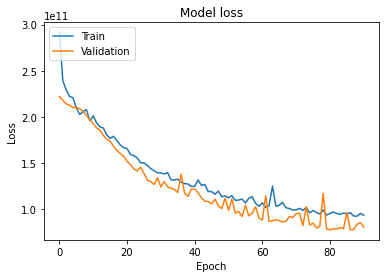

In [19]:
history = nn_grid_search_result.best_estimator_.model.history.history
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [20]:
nn_pred = nn_grid_search_model.predict(test_X)

#### Metrics for the neural networks model

In [21]:
print(MAPE(test_y, nn_pred))
print(MSE(test_y, nn_pred))
print(MAE(test_y, nn_pred))
print(r2_score(test_y, nn_pred))

0.27169860125910605
71589758039.73763
139074.5058115378
0.6774663091380595


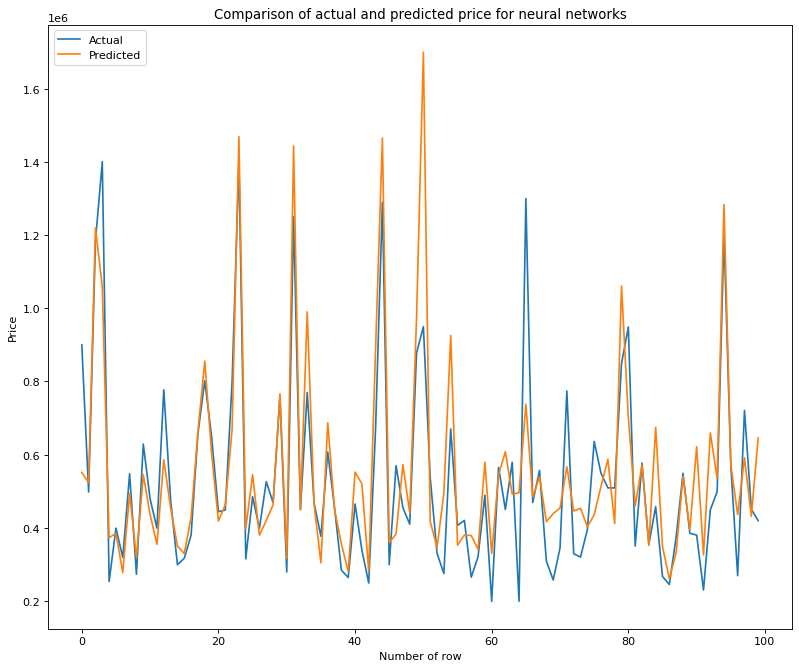

In [22]:
figure(figsize=(12, 10), dpi=80)
plt.plot(list(range(len(test_y[:100].values))), test_y[:100])
plt.plot(list(range(len(test_y[:100].values))), nn_pred[:100])
plt.title('Comparison of actual and predicted price for neural networks')
plt.ylabel('Price')
plt.xlabel('Number of row')
plt.legend(['Actual', 'Predicted'], loc='upper left')
plt.show()